In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

In [1]:
import pandas as pd

# Load the dataset
data = pd.read_csv('/kaggle/input/sleepheart-dataset-msc-project/Heart Attack Risk Analysis.csv')

In [2]:
# Check for missing values
data.isnull().sum()

Patient ID                         0
Age                                0
Sex                                0
Cholesterol                        0
Blood Pressure                     0
Heart Rate                         0
Diabetes                           0
Family History                     0
Smoking                            0
Obesity                            0
Alcohol Consumption                0
Exercise Hours Per Week            0
Diet                               0
Previous Heart Problems            0
Medication Use                     0
Stress Level                       0
Sedentary Hours Per Day            0
Income                             0
BMI                                0
Triglycerides                      0
Physical Activity Days Per Week    0
Sleep Hours Per Day                0
Country                            0
Continent                          0
Hemisphere                         0
Myocardial Infarction              0
Sleep Disturbances                 0
S

In [3]:
# Dropping rows with missing values
data = data.dropna()

In [4]:
# Select relevant columns
relevant_columns = ['Age', 'Sex', 'Sleep Hours Per Day', 'Sleep Disturbances', 'Sleep Efficiency',
                    'Myocardial Infarction', 'Sleep Onset Latency', 'WASO', 'Number of Awakenings']
data = data[relevant_columns]

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


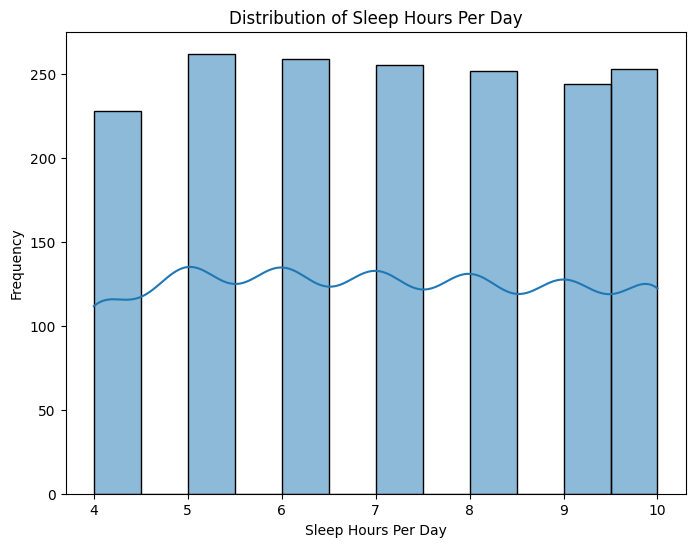

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot distribution of sleep hours
plt.figure(figsize=(8, 6))
sns.histplot(data['Sleep Hours Per Day'], kde=True)
plt.title('Distribution of Sleep Hours Per Day')
plt.xlabel('Sleep Hours Per Day')
plt.ylabel('Frequency')
plt.show()

In [6]:
# Plot correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Relevant Variables')
plt.show()

ValueError: could not convert string to float: 'Male'

<Figure size 1000x800 with 0 Axes>

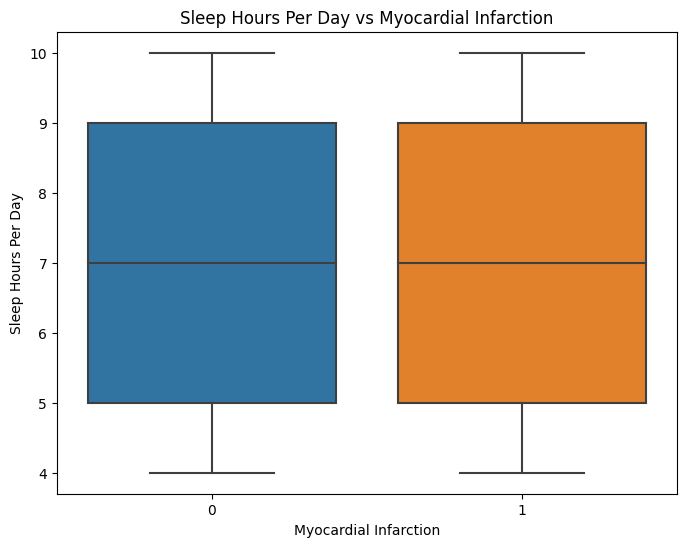

In [7]:
# Plotting the relationship between sleep duration and MI
# Plot (1) - Boxplot of Sleep Hours Per Day by Myocardial Infarction Status
plt.figure(figsize=(8, 6))
sns.boxplot(x='Myocardial Infarction', y='Sleep Hours Per Day', data=data)
plt.title('Sleep Hours Per Day vs Myocardial Infarction')
plt.xlabel('Myocardial Infarction')
plt.ylabel('Sleep Hours Per Day')
plt.show()

# By Soubhi SAAD

In [8]:
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler

# Prepare the data for logistic regression
X = data[['Sleep Hours Per Day', 'Sleep Disturbances', 'Sleep Efficiency', 'Sleep Onset Latency', 'WASO', 'Number of Awakenings']]
y = data['Myocardial Infarction']

# Standardize the predictors
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Add a constant to the model (intercept)
X_scaled = sm.add_constant(X_scaled)

# Fit the logistic regression model
logit_model = sm.Logit(y, X_scaled).fit()

# Display the summary of the model
logit_model.summary()

Optimization terminated successfully.
         Current function value: 0.681445
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                             Logit Regression Results                            
=================================================================================
Dep. Variable:     Myocardial Infarction   No. Observations:                 1753
Model:                             Logit   Df Residuals:                     1746
Method:                              MLE   Df Model:                            6
Date:                   Sat, 10 Aug 2024   Pseudo R-squ.:                0.001343
Time:                           17:16:08   Log-Likelihood:                -1194.6
converged:                          True   LL-Null:                       -1196.2
Covariance Type:               nonrobust   LLR p-value:                    0.7817
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2959      0.048      6.121      0.000       0.201       0.391
x1            -0.0200      0.048     -0.414      0.679      -0.115       0.075
x2            -0.1831      0.142     -1.288      0.198      -0.462       0.096
x3            -0.1218      0.091     -1.336      0.182      -0.301       0.057
x4             0.0316      0.066      0.482      0.630      -0.097       0.160
x5             0.0425      0.115      0.368      0.713      -0.184       0.269
x6             0.0399      0.054      0.742      0.458      -0.066       0.145
==============================================================================
"""

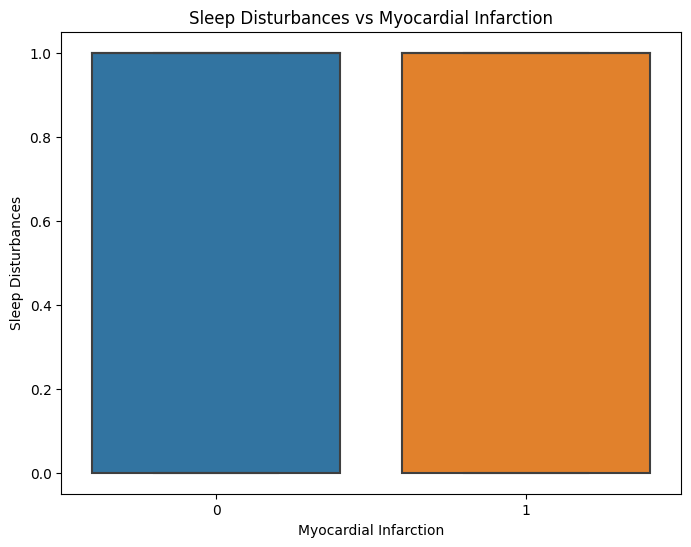

In [10]:
# Visualizing the relationship between Sleep Disturbances and MI
plt.figure(figsize=(8, 6))
sns.boxplot(x='Myocardial Infarction', y='Sleep Disturbances', data=data)
plt.title('Sleep Disturbances vs Myocardial Infarction')
plt.xlabel('Myocardial Infarction')
plt.ylabel('Sleep Disturbances')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


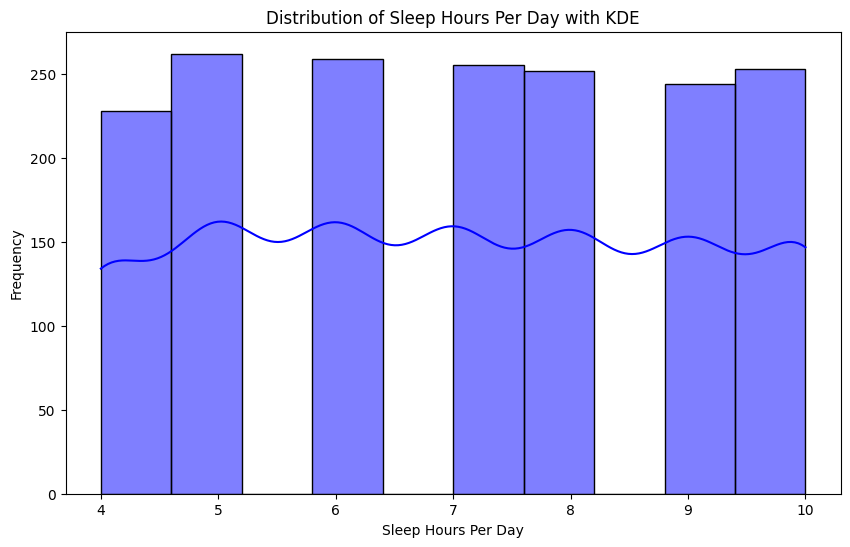

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(data['Sleep Hours Per Day'], kde=True, bins=10, color='blue', edgecolor='black')
plt.title('Distribution of Sleep Hours Per Day with KDE')
plt.xlabel('Sleep Hours Per Day')
plt.ylabel('Frequency')
plt.show()

#Soubhi SAAD 

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated a

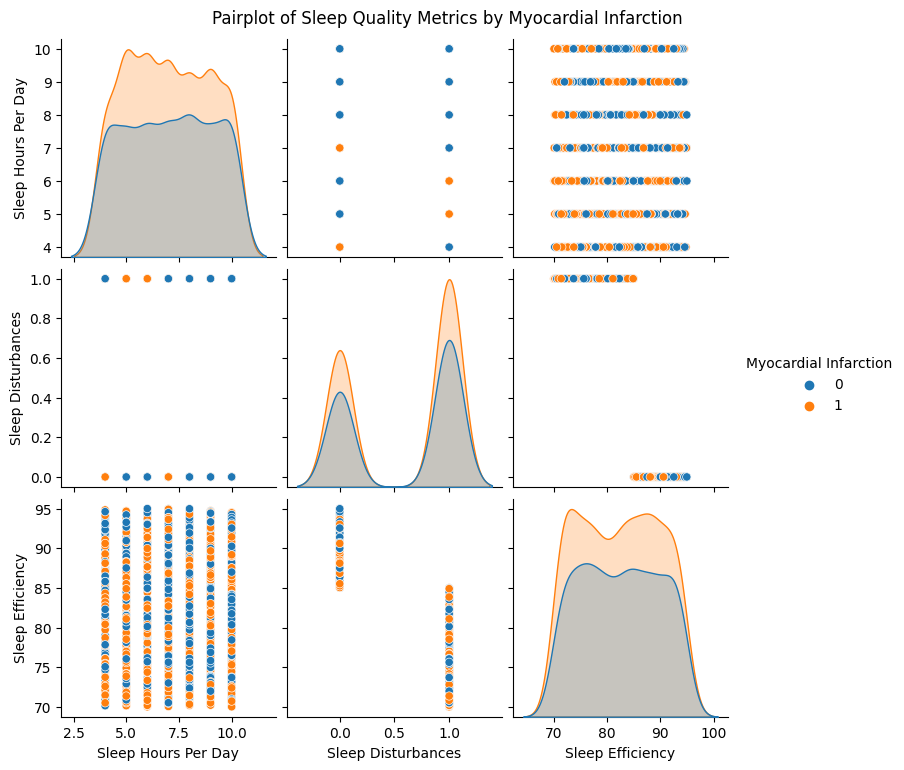

In [16]:
sns.pairplot(data, vars=['Sleep Hours Per Day', 'Sleep Disturbances', 'Sleep Efficiency'], hue='Myocardial Infarction')
plt.suptitle('Pairplot of Sleep Quality Metrics by Myocardial Infarction', y=1.02)
plt.show()

In [17]:
corr = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Sleep Quality Metrics and Myocardial Infarction')
plt.show()

ValueError: could not convert string to float: 'Male'

In [19]:
# Convert Sex to binary (assuming 'Male' and 'Female' are the categories)
data['Sex'] = data['Sex'].map({'Male': 0, 'Female': 1})

# Check if the conversion was successful
print(data['Sex'].head())

0    0
1    0
2    0
3    0
4    0
Name: Sex, dtype: int64


/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


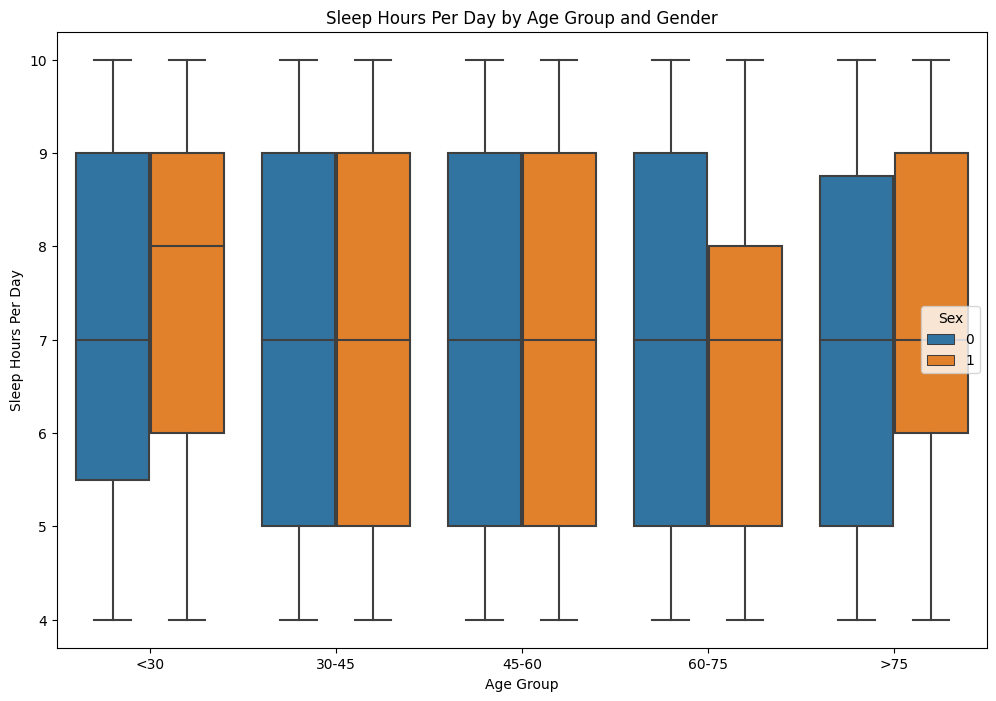

In [20]:
# Creating age groups
data['Age Group'] = pd.cut(data['Age'], bins=[0, 30, 45, 60, 75, 100], labels=['<30', '30-45', '45-60', '60-75', '>75'])

# Boxplot for Sleep Hours by Age Group and Gender
plt.figure(figsize=(12, 8))
sns.boxplot(x='Age Group', y='Sleep Hours Per Day', hue='Sex', data=data)
plt.title('Sleep Hours Per Day by Age Group and Gender')
plt.xlabel('Age Group')
plt.ylabel('Sleep Hours Per Day')
plt.show()

# Repeat for other sleep quality metrics (e.g., Sleep Disturbances, Sleep Efficiency)

/tmp/ipykernel_33/1522046511.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Age Group', y='Sleep Hours Per Day', hue='Sex', data=data, ci=None)
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


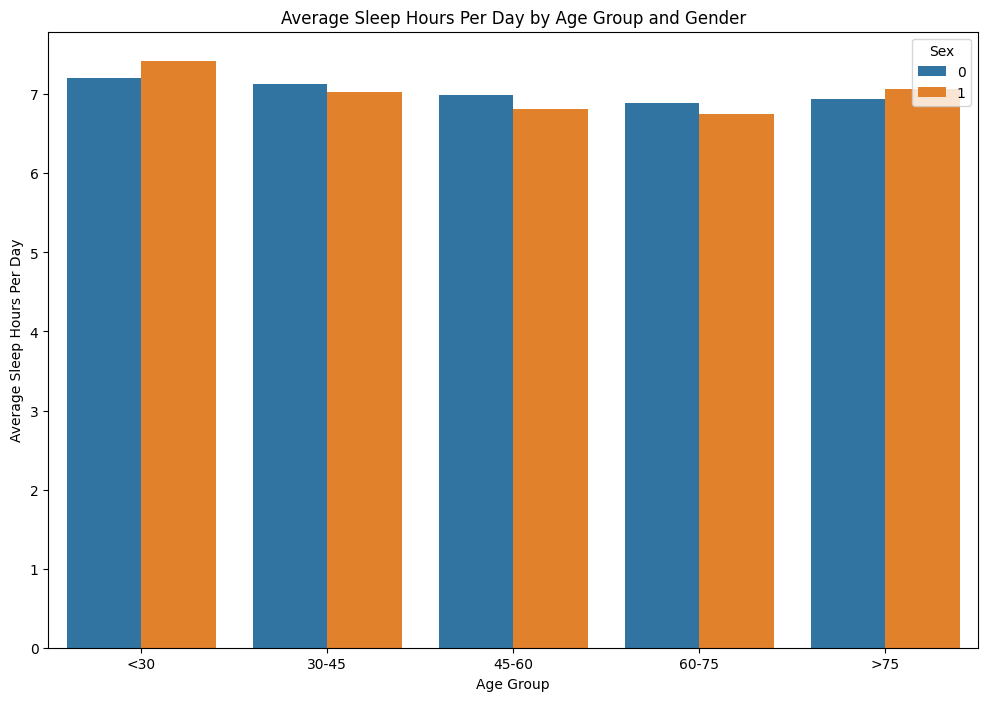

In [27]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Age Group', y='Sleep Hours Per Day', hue='Sex', data=data, ci=None)
plt.title('Average Sleep Hours Per Day by Age Group and Gender')
plt.xlabel('Age Group')
plt.ylabel('Average Sleep Hours Per Day')
plt.show()

#Soubhi SAAD

/tmp/ipykernel_33/2704845855.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Age Group', y='Sleep Disturbances', hue='Sex', data=data, ci=None)
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


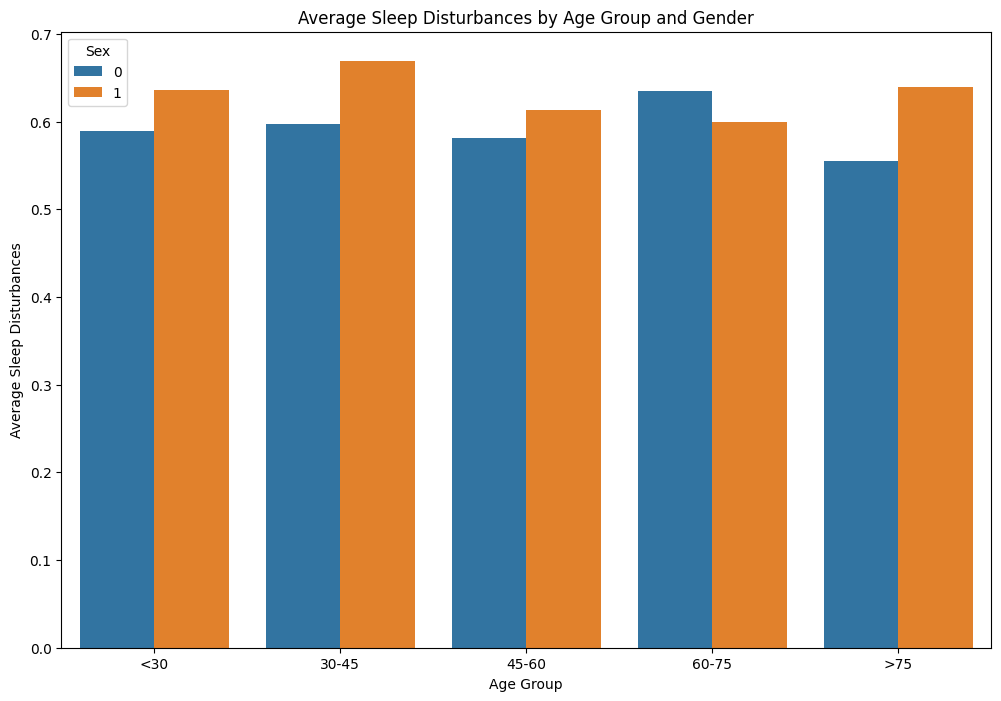

In [28]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Age Group', y='Sleep Disturbances', hue='Sex', data=data, ci=None)
plt.title('Average Sleep Disturbances by Age Group and Gender')
plt.xlabel('Age Group')
plt.ylabel('Average Sleep Disturbances')
plt.show()

# Soubhi SAAD

In [22]:
import statsmodels.api as sm

# Creating interaction terms
data['Sleep_Age_Interaction'] = data['Sleep Hours Per Day'] * data['Age']
data['Sleep_Sex_Interaction'] = data['Sleep Hours Per Day'] * data['Sex']

# Logistic regression model
X = data[['Sleep Hours Per Day', 'Sleep Disturbances', 'Age', 'Sex', 'Sleep_Age_Interaction', 'Sleep_Sex_Interaction']]
y = data['Myocardial Infarction']

X = sm.add_constant(X)
logit_model = sm.Logit(y, X).fit()
print(logit_model.summary())

Optimization terminated successfully.
         Current function value: 0.682032
         Iterations 4
                             Logit Regression Results                            
Dep. Variable:     Myocardial Infarction   No. Observations:                 1753
Model:                             Logit   Df Residuals:                     1746
Method:                              MLE   Df Model:                            6
Date:                   Sat, 10 Aug 2024   Pseudo R-squ.:               0.0004830
Time:                           18:27:18   Log-Likelihood:                -1195.6
converged:                          True   LL-Null:                       -1196.2
Covariance Type:               nonrobust   LLR p-value:                    0.9790
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.1731      0.517      0.335      0.

In [23]:
# Subgroup analysis for males
males = data[data['Sex'] == 0]
X_male = males[['Sleep Hours Per Day', 'Sleep Disturbances', 'Age']]
y_male = males['Myocardial Infarction']
logit_model_male = sm.Logit(y_male, sm.add_constant(X_male)).fit()
print('Male Subgroup:\n', logit_model_male.summary())

# Subgroup analysis for females
females = data[data['Sex'] == 1]
X_female = females[['Sleep Hours Per Day', 'Sleep Disturbances', 'Age']]
y_female = females['Myocardial Infarction']
logit_model_female = sm.Logit(y_female, sm.add_constant(X_female)).fit()
print('Female Subgroup:\n', logit_model_female.summary())

Optimization terminated successfully.
         Current function value: 0.682899
         Iterations 4
Male Subgroup:
                              Logit Regression Results                            
Dep. Variable:     Myocardial Infarction   No. Observations:                 1220
Model:                             Logit   Df Residuals:                     1216
Method:                              MLE   Df Model:                            3
Date:                   Sat, 10 Aug 2024   Pseudo R-squ.:                0.001077
Time:                           18:27:31   Log-Likelihood:                -833.14
converged:                          True   LL-Null:                       -834.04
Covariance Type:               nonrobust   LLR p-value:                    0.6155
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.4563      0.272      1.6

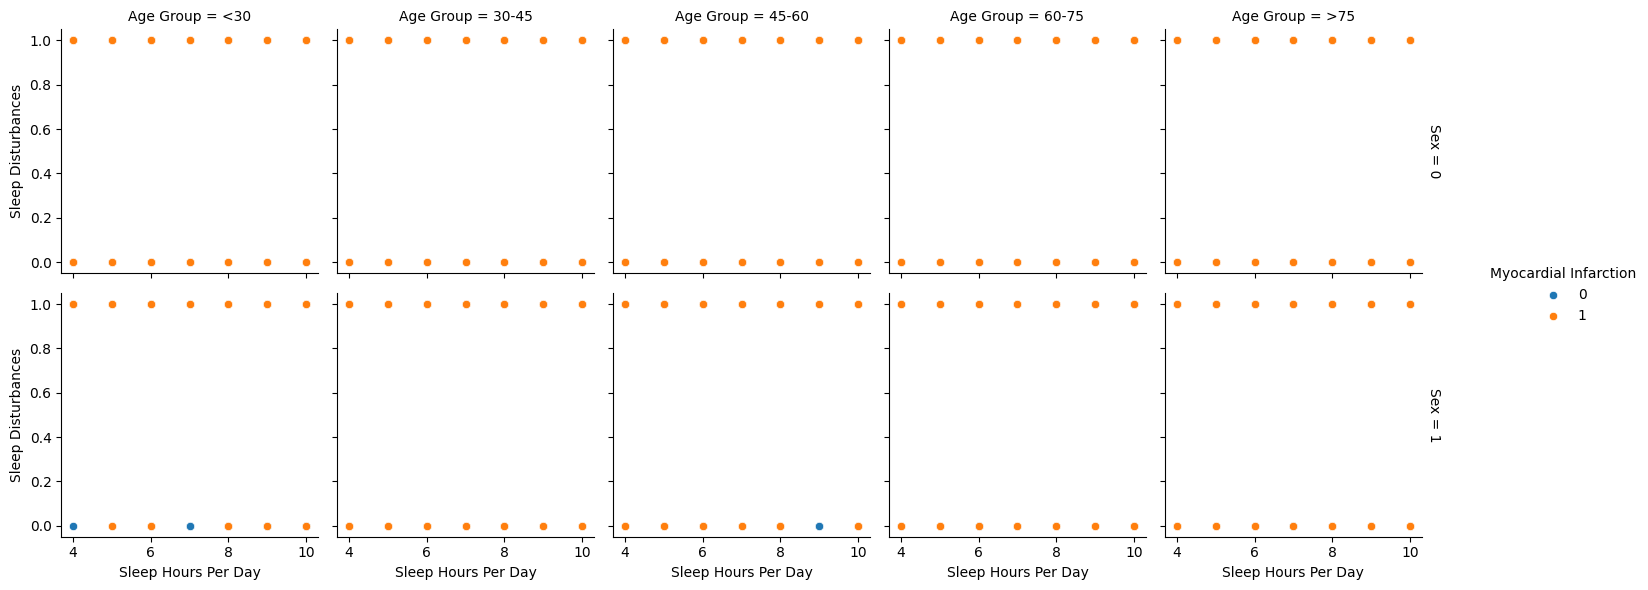

In [24]:
g = sns.FacetGrid(data, col='Age Group', row='Sex', hue='Myocardial Infarction', margin_titles=True)
g.map(sns.scatterplot, 'Sleep Hours Per Day', 'Sleep Disturbances')
g.add_legend()
plt.show()

PART 2********

In [5]:
import pandas as pd

# Load the dataset (Make sure to adjust the file path as needed)
file_path = '/kaggle/input/sleepheart-dataset-msc-project/TheOne Sleep Data.csv'
data = pd.read_csv(file_path)

# Selecting relevant columns for analysis
relevant_columns = [
    "Myocardial Infarction", "Sleep Hours Per Day", "Sleep Disturbances", 
    "Sleep Efficiency", "Sleep Onset Latency", "WASO", "Number of Awakenings"
]

# Filter the dataset to only include relevant columns
sleep_data = data[relevant_columns]

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


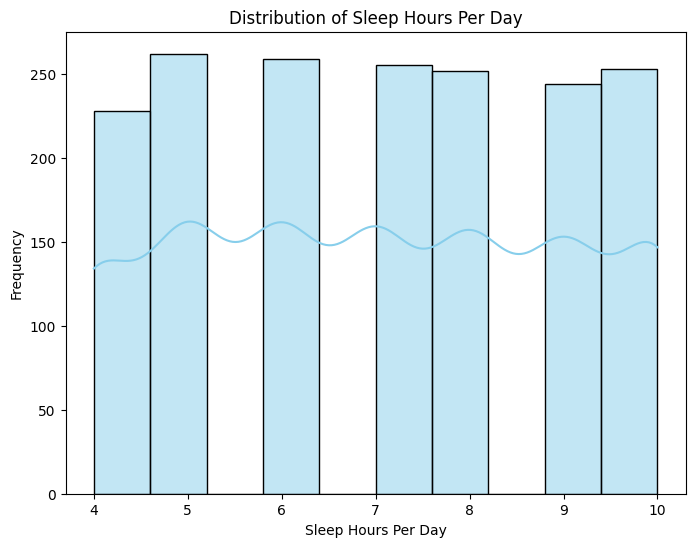

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot: Distribution of Sleep Hours Per Day
plt.figure(figsize=(8, 6))
sns.histplot(sleep_data['Sleep Hours Per Day'], bins=10, kde=True, color='skyblue')
plt.title('Distribution of Sleep Hours Per Day')
plt.xlabel('Sleep Hours Per Day')
plt.ylabel('Frequency')
plt.show()

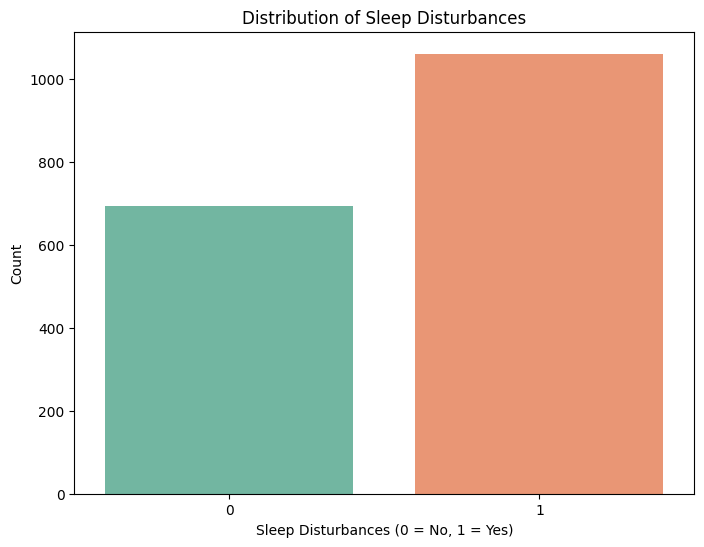

In [7]:
# Plot: Distribution of Sleep Disturbances
plt.figure(figsize=(8, 6))
sns.countplot(x=sleep_data['Sleep Disturbances'], palette='Set2')
plt.title('Distribution of Sleep Disturbances')
plt.xlabel('Sleep Disturbances (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


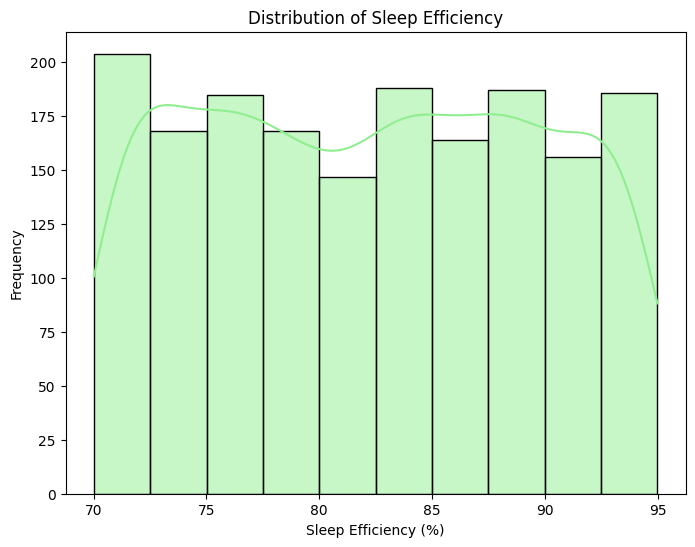

In [8]:
# Plot: Distribution of Sleep Efficiency
plt.figure(figsize=(8, 6))
sns.histplot(sleep_data['Sleep Efficiency'], bins=10, kde=True, color='lightgreen')
plt.title('Distribution of Sleep Efficiency')
plt.xlabel('Sleep Efficiency (%)')
plt.ylabel('Frequency')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


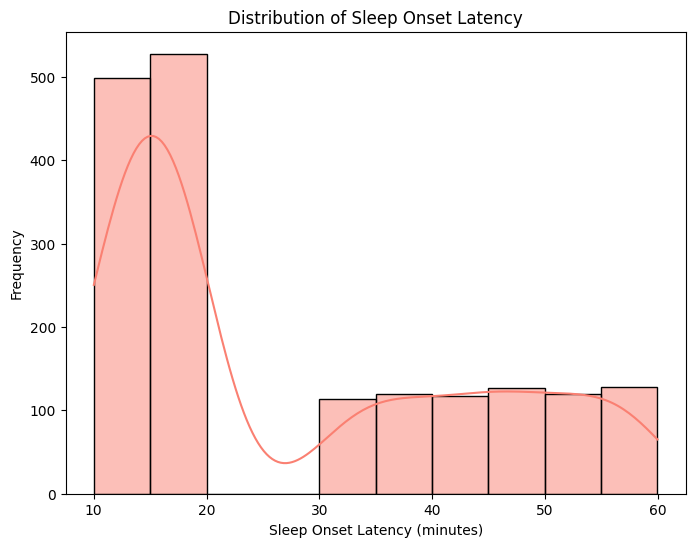

In [9]:
# Plot: Distribution of Sleep Onset Latency
plt.figure(figsize=(8, 6))
sns.histplot(sleep_data['Sleep Onset Latency'], bins=10, kde=True, color='salmon')
plt.title('Distribution of Sleep Onset Latency')
plt.xlabel('Sleep Onset Latency (minutes)')
plt.ylabel('Frequency')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


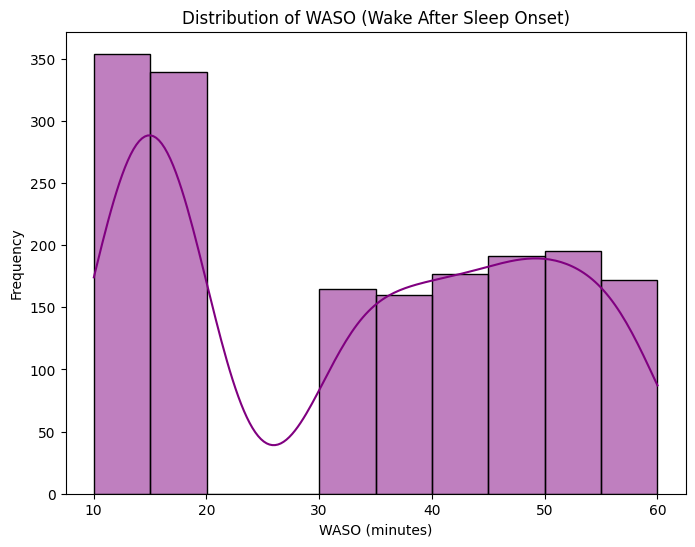

In [10]:
# Plot: Distribution of WASO (Wake After Sleep Onset)
plt.figure(figsize=(8, 6))
sns.histplot(sleep_data['WASO'], bins=10, kde=True, color='purple')
plt.title('Distribution of WASO (Wake After Sleep Onset)')
plt.xlabel('WASO (minutes)')
plt.ylabel('Frequency')
plt.show()

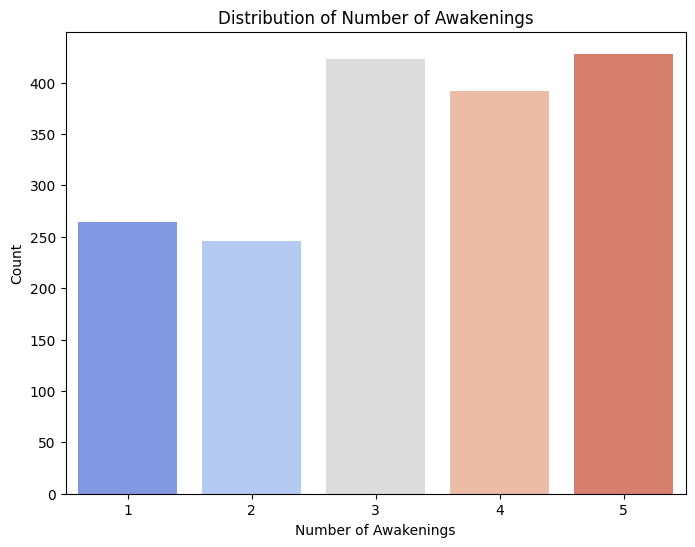

In [11]:
# Plot: Distribution of Number of Awakenings
plt.figure(figsize=(8, 6))
sns.countplot(x=sleep_data['Number of Awakenings'], palette='coolwarm')
plt.title('Distribution of Number of Awakenings')
plt.xlabel('Number of Awakenings')
plt.ylabel('Count')
plt.show()

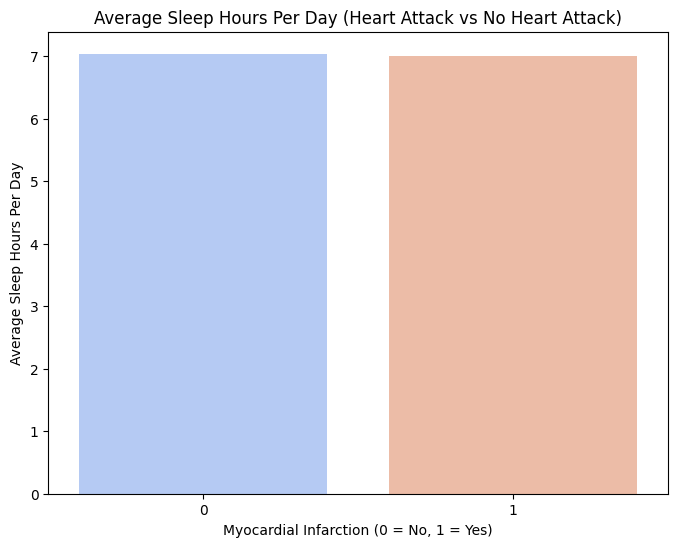

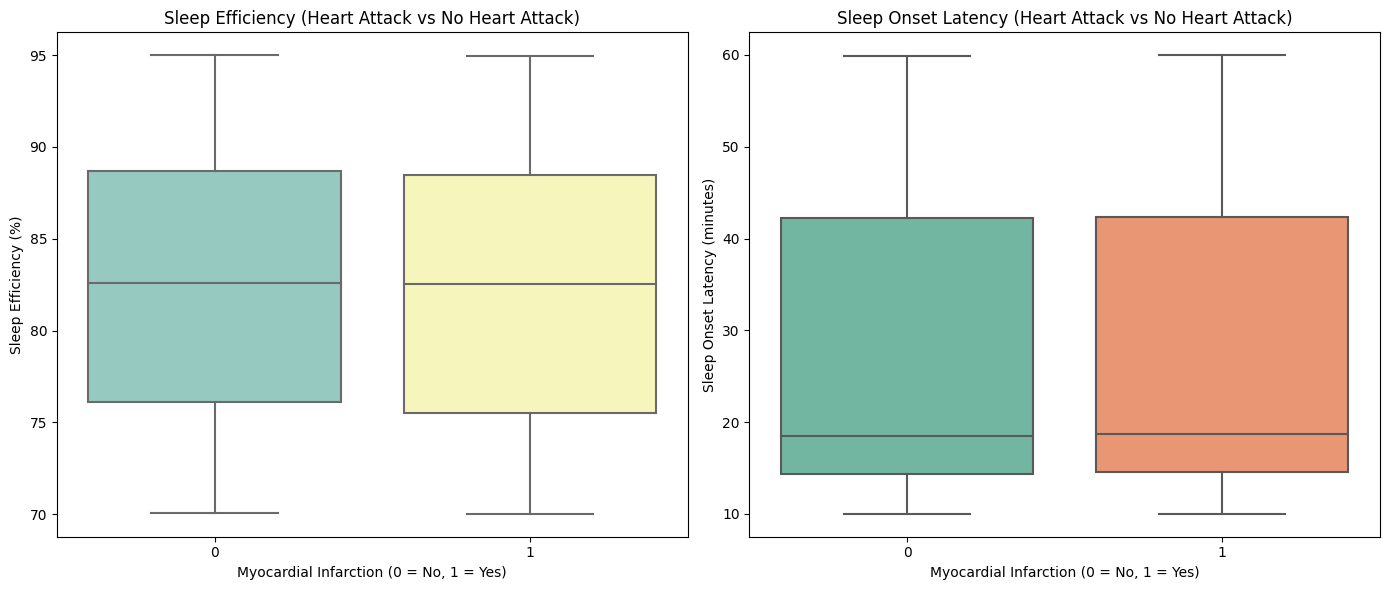

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'sleep_data' is already defined with the relevant columns

# First comparison: Average Sleep Hours between groups (Heart Attack vs No Heart Attack)
sleep_hours_heart_attack = sleep_data.groupby('Myocardial Infarction')['Sleep Hours Per Day'].mean().reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(x='Myocardial Infarction', y='Sleep Hours Per Day', data=sleep_hours_heart_attack, palette='coolwarm')
plt.title('Average Sleep Hours Per Day (Heart Attack vs No Heart Attack)')
plt.xlabel('Myocardial Infarction (0 = No, 1 = Yes)')
plt.ylabel('Average Sleep Hours Per Day')
plt.show()

# Second comparison: Sleep Efficiency and Sleep Onset Latency for Heart Attack vs No Heart Attack
plt.figure(figsize=(14, 6))

# Subplot for Sleep Efficiency
plt.subplot(1, 2, 1)
sns.boxplot(x='Myocardial Infarction', y='Sleep Efficiency', data=sleep_data, palette='Set3')
plt.title('Sleep Efficiency (Heart Attack vs No Heart Attack)')
plt.xlabel('Myocardial Infarction (0 = No, 1 = Yes)')
plt.ylabel('Sleep Efficiency (%)')

# Subplot for Sleep Onset Latency
plt.subplot(1, 2, 2)
sns.boxplot(x='Myocardial Infarction', y='Sleep Onset Latency', data=sleep_data, palette='Set2')
plt.title('Sleep Onset Latency (Heart Attack vs No Heart Attack)')
plt.xlabel('Myocardial Infarction (0 = No, 1 = Yes)')
plt.ylabel('Sleep Onset Latency (minutes)')

plt.tight_layout()
plt.show()

In [16]:
import pandas as pd

# Assuming `data` is the original DataFrame
# Categorizing Age into groups
data['Age Group'] = pd.cut(data['Age'], bins=[0, 30, 45, 60, 75, 100], labels=['<30', '30-45', '45-60', '60-75', '75+'])

# Grouping the data by Age Group, Gender, and Myocardial Infarction
grouped_data = data.groupby(['Age Group', 'Sex', 'Myocardial Infarction']).agg({
    'Sleep Hours Per Day': 'mean',
    'Sleep Disturbances': 'mean'
}).reset_index()

grouped_data['Sleep Disturbances'] *= 100  # Convert to percentage

/tmp/ipykernel_33/991425165.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(['Age Group', 'Sex', 'Myocardial Infarction']).agg({


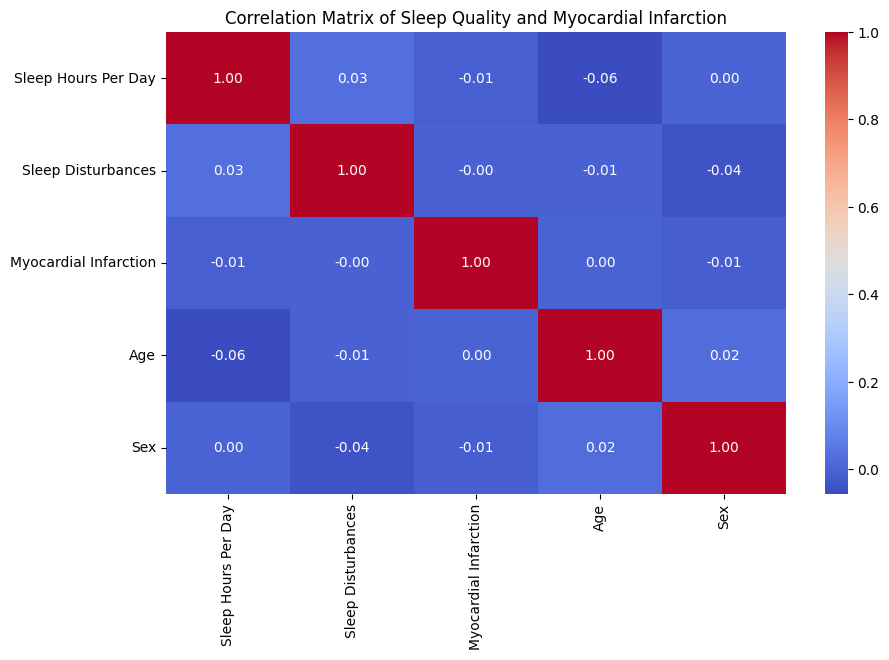

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation matrix for sleep duration, disturbances, and myocardial infarction
correlation_data = data[['Sleep Hours Per Day', 'Sleep Disturbances', 'Myocardial Infarction', 'Age', 'Sex']].copy()
correlation_data['Sleep Disturbances'] = correlation_data['Sleep Disturbances'].astype(float)
correlation_data['Sex'] = correlation_data['Sex'].map({'Male': 1, 'Female': 0})

correlation_matrix = correlation_data.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Sleep Quality and Myocardial Infarction')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


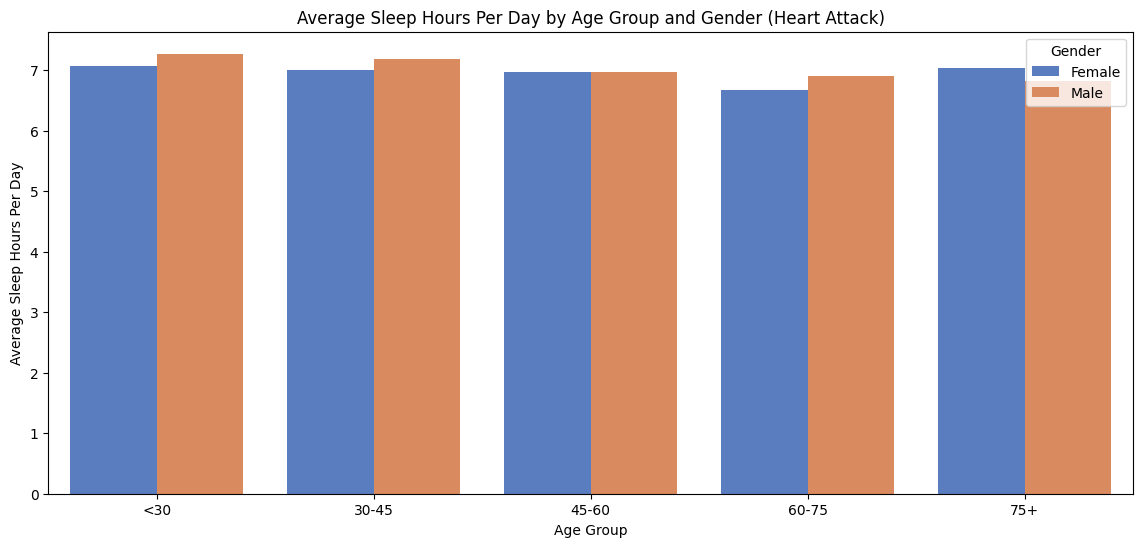

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


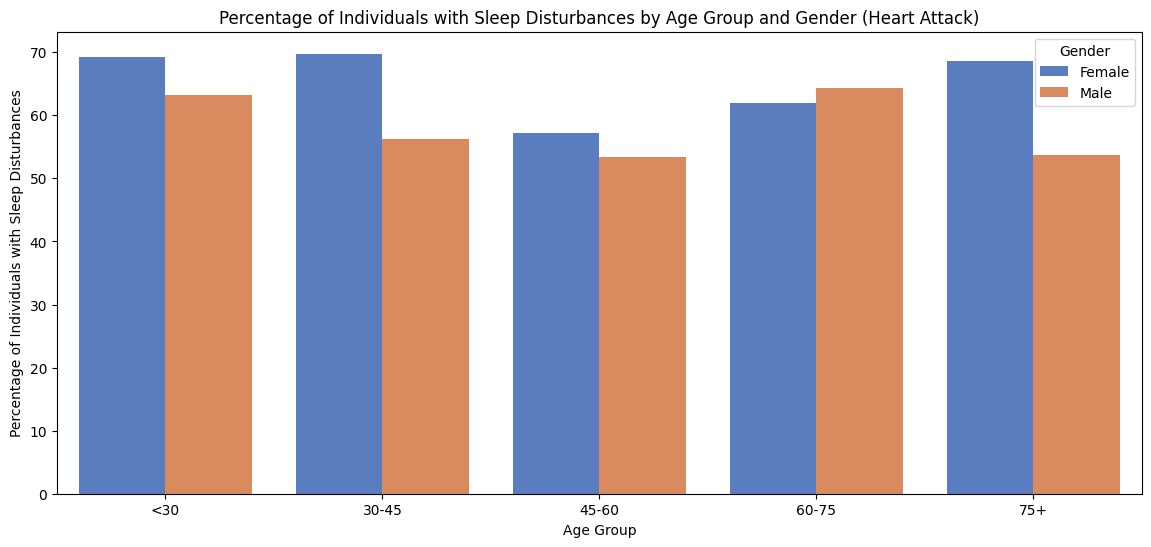

In [18]:
# Bar plot for Sleep Hours Per Day
plt.figure(figsize=(14, 6))
sns.barplot(x='Age Group', y='Sleep Hours Per Day', hue='Sex', data=grouped_data[grouped_data['Myocardial Infarction'] == 1], palette='muted')
plt.title('Average Sleep Hours Per Day by Age Group and Gender (Heart Attack)')
plt.ylabel('Average Sleep Hours Per Day')
plt.xlabel('Age Group')
plt.legend(title='Gender')
plt.show()

# Bar plot for Sleep Disturbances
plt.figure(figsize=(14, 6))
sns.barplot(x='Age Group', y='Sleep Disturbances', hue='Sex', data=grouped_data[grouped_data['Myocardial Infarction'] == 1], palette='muted')
plt.title('Percentage of Individuals with Sleep Disturbances by Age Group and Gender (Heart Attack)')
plt.ylabel('Percentage of Individuals with Sleep Disturbances')
plt.xlabel('Age Group')
plt.legend(title='Gender')
plt.show()

In [19]:
import pandas as pd

# Assuming `data` is the original DataFrame
# Categorizing Age into groups
data['Age Group'] = pd.cut(data['Age'], bins=[0, 30, 45, 60, 75, 100], labels=['<30', '30-45', '45-60', '60-75', '75+'])

# Grouping the data by Age Group, Gender, and Myocardial Infarction
grouped_data = data.groupby(['Age Group', 'Sex', 'Myocardial Infarction']).agg({
    'Sleep Hours Per Day': 'mean',
    'Sleep Disturbances': 'mean'
}).reset_index()

grouped_data['Sleep Disturbances'] *= 100  # Convert to percentage

/tmp/ipykernel_33/991425165.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(['Age Group', 'Sex', 'Myocardial Infarction']).agg({


/tmp/ipykernel_33/3019950042.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Age Group', y='Sleep Hours Per Day', hue='Sex', data=grouped_data,
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


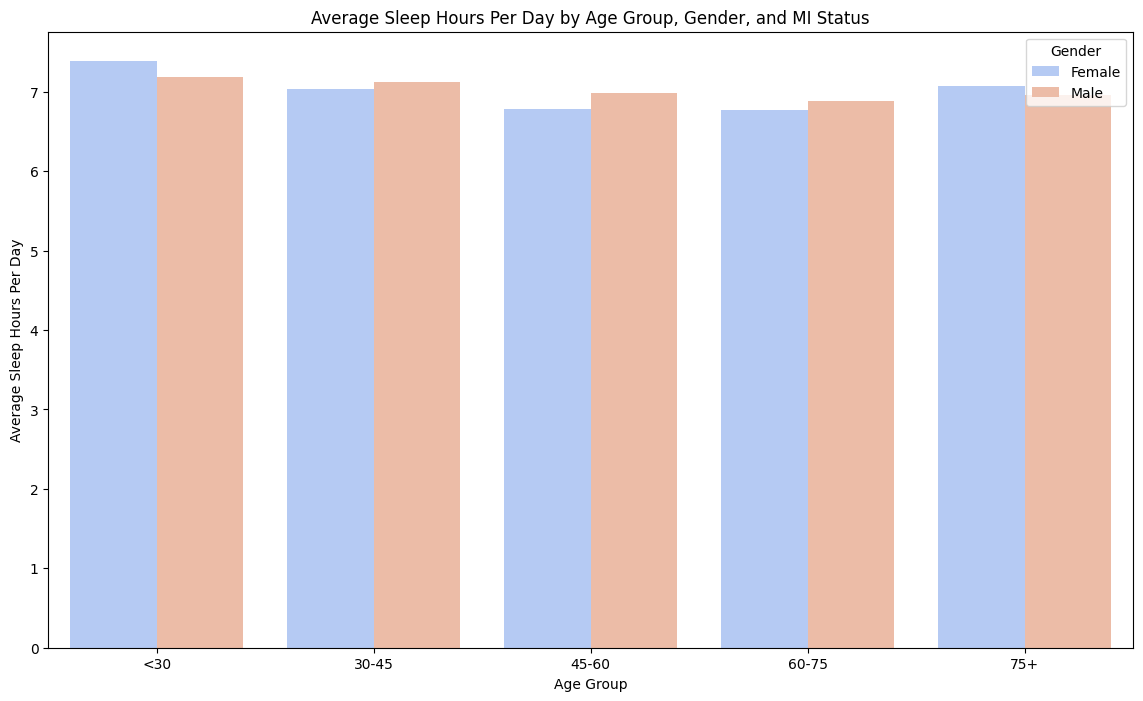

/tmp/ipykernel_33/3019950042.py:16: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Age Group', y='Sleep Disturbances', hue='Sex', data=grouped_data,
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


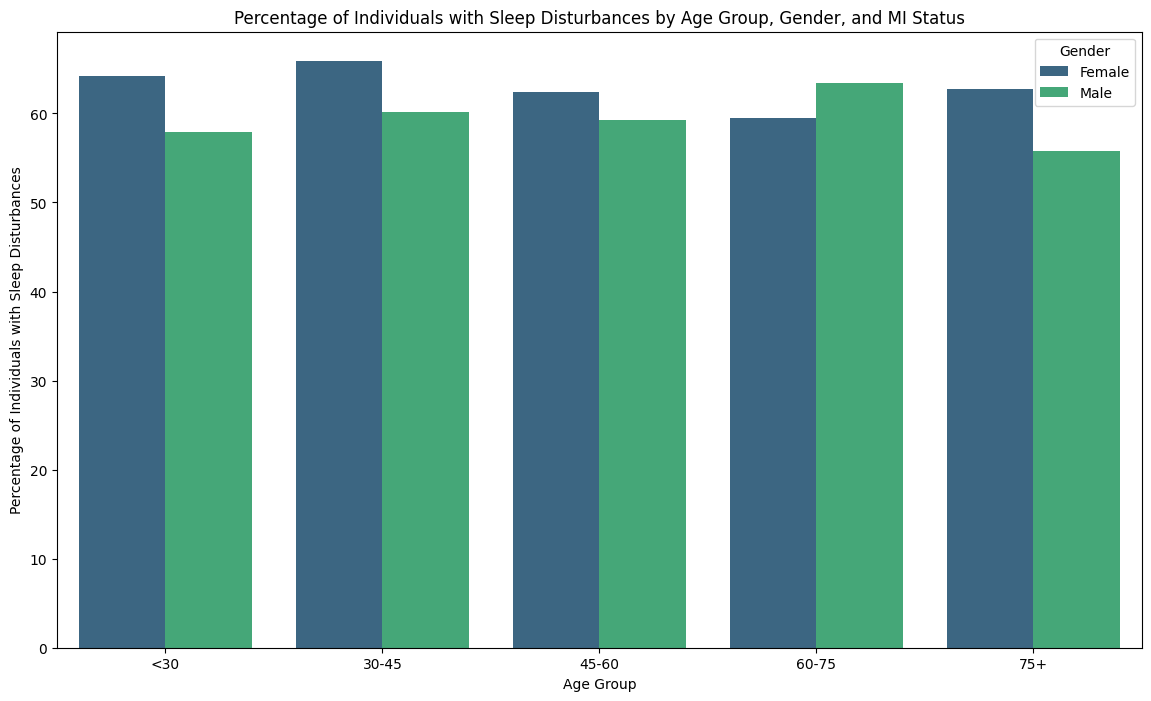

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot 1: Average Sleep Hours Per Day by Age Group, Gender, and MI Status
plt.figure(figsize=(14, 8))
sns.barplot(x='Age Group', y='Sleep Hours Per Day', hue='Sex', data=grouped_data, 
            palette='coolwarm', ci=None, dodge=True)
plt.title('Average Sleep Hours Per Day by Age Group, Gender, and MI Status')
plt.xlabel('Age Group')
plt.ylabel('Average Sleep Hours Per Day')
plt.legend(title='Gender')
plt.show()

# Plot 2: Percentage of Individuals with Sleep Disturbances by Age Group, Gender, and MI Status
plt.figure(figsize=(14, 8))
sns.barplot(x='Age Group', y='Sleep Disturbances', hue='Sex', data=grouped_data, 
            palette='viridis', ci=None, dodge=True)
plt.title('Percentage of Individuals with Sleep Disturbances by Age Group, Gender, and MI Status')
plt.xlabel('Age Group')
plt.ylabel('Percentage of Individuals with Sleep Disturbances')
plt.legend(title='Gender')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


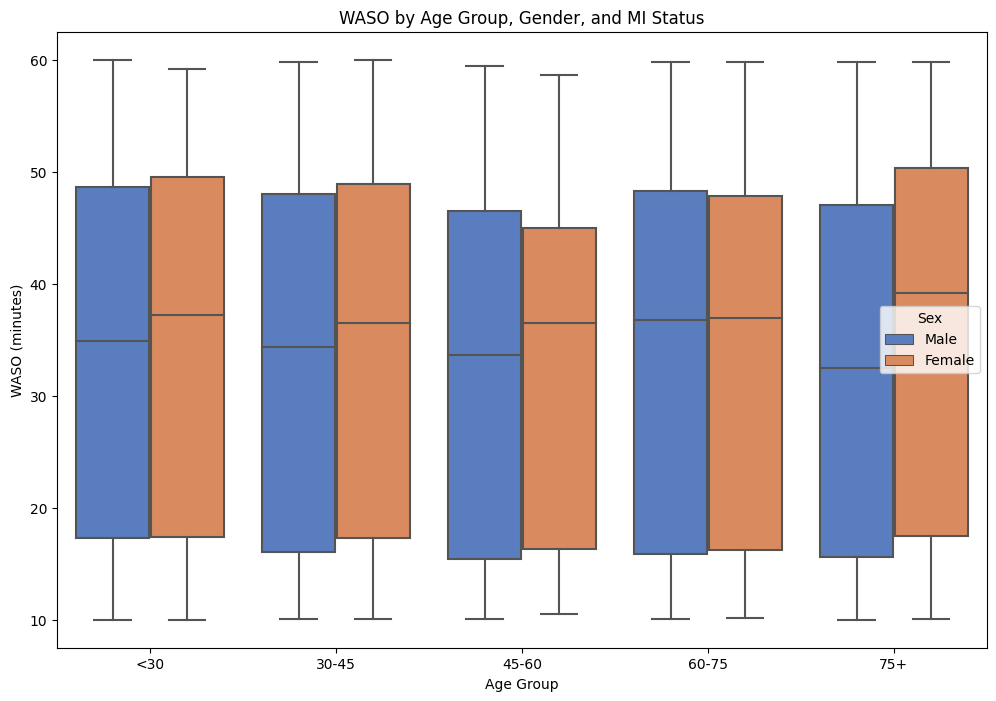

In [22]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Age Group', y='WASO', hue='Sex', data=data, palette='muted')
plt.title('WASO by Age Group, Gender, and MI Status')
plt.xlabel('Age Group')
plt.ylabel('WASO (minutes)')
plt.show()

/tmp/ipykernel_33/1985394983.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sleep_heart_data['Sex'] = sleep_data['Sex'].map({'Male': 1, 'Female': 0})
/tmp/ipykernel_33/1985394983.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sleep_heart_data['Age Group'] = pd.cut(sleep_heart_data['Age'], bins=bins, labels=labels)


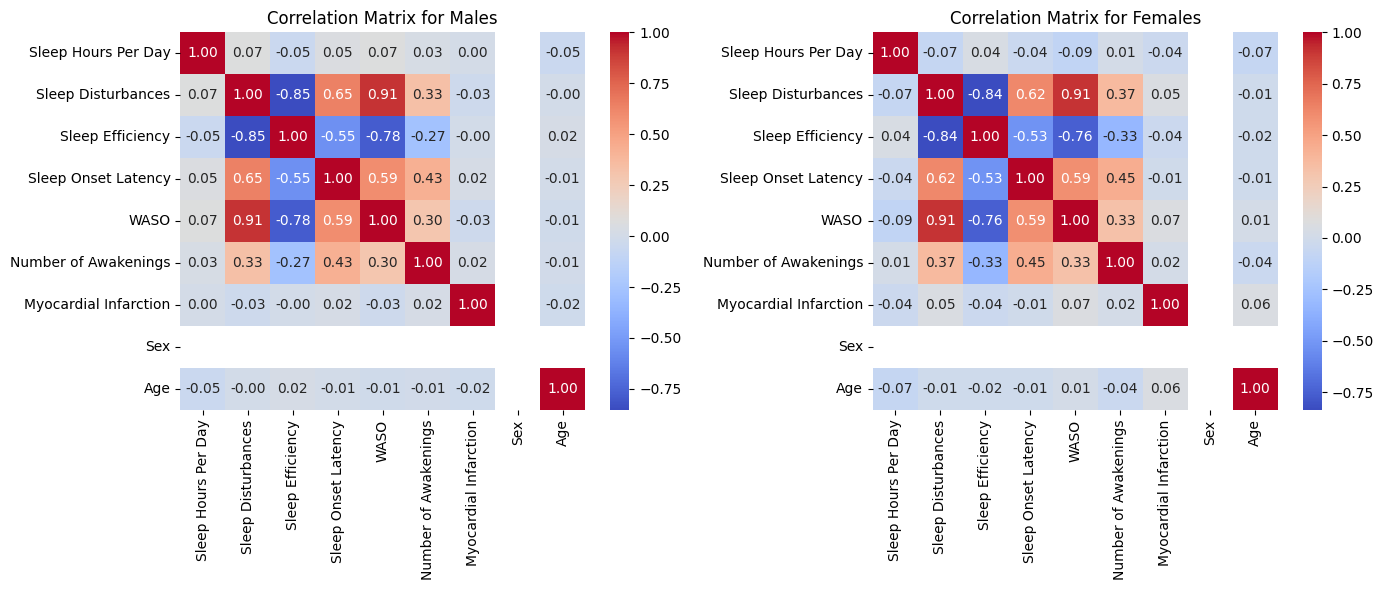

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#Soubhi SAAD

# Load the dataset
file_path = '/kaggle/input/sleepheart-dataset-msc-project/Heart Attack Risk Analysis.csv'
sleep_data = pd.read_csv(file_path)

# Selecting relevant columns
sleep_heart_data = sleep_data[['Sleep Hours Per Day', 'Sleep Disturbances', 'Sleep Efficiency',
                               'Sleep Onset Latency', 'WASO', 'Number of Awakenings', 
                               'Myocardial Infarction', 'Sex', 'Age']]

# Convert Sex to numeric for correlation (0 for Female, 1 for Male)
sleep_heart_data['Sex'] = sleep_data['Sex'].map({'Male': 1, 'Female': 0})

# Creating age groups
bins = [0, 40, 60, 100]
labels = ['Under 40', '40-60', 'Over 60']
sleep_heart_data['Age Group'] = pd.cut(sleep_heart_data['Age'], bins=bins, labels=labels)

# Splitting the data by sex
male_data = sleep_heart_data[sleep_heart_data['Sex'] == 1]
female_data = sleep_heart_data[sleep_heart_data['Sex'] == 0]

# Exclude non-numeric 'Age Group' column for correlation calculation
male_correlation = male_data.drop(columns=['Age Group']).corr()
female_correlation = female_data.drop(columns=['Age Group']).corr()

# Plotting the correlation matrices for males and females
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.heatmap(male_correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix for Males")

plt.subplot(1, 2, 2)
sns.heatmap(female_correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix for Females")

plt.tight_layout()
plt.show()

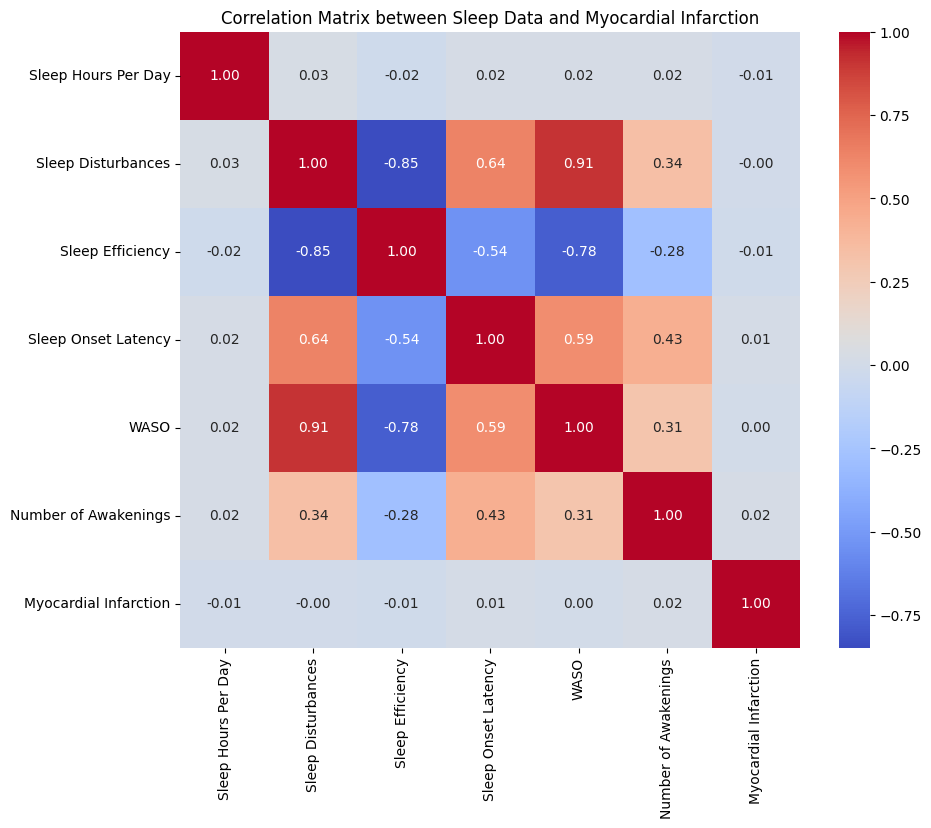

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selecting relevant columns
sleep_heart_data = sleep_data[['Sleep Hours Per Day', 'Sleep Disturbances', 'Sleep Efficiency',
                               'Sleep Onset Latency', 'WASO', 'Number of Awakenings', 
                               'Myocardial Infarction']]

# Calculate the correlation matrix
correlation_matrix = sleep_heart_data.corr()

# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix between Sleep Data and Myocardial Infarction")
plt.show()

# Soubhi SAAD

In [2]:
import pandas as pd

# Load your dataset
sleep_data = pd.read_csv('/kaggle/input/sleepheart-dataset-msc-project/TheOne Sleep Data.csv') 

# Create age groups and gender categories
sleep_data['Age Group'] = pd.cut(sleep_data['Age'], bins=[0, 30, 50, 70, 100], labels=['<30', '30-50', '50-70', '70+'])
sleep_data['Gender'] = sleep_data['Sex'].map({'Male': 'Male', 'Female': 'Female'})

# Initialize a dictionary to store the results
results = {}

# Sleep-related variables of interest
sleep_variables = ['Sleep Hours Per Day', 'Sleep Disturbances', 'Sleep Efficiency', 
                   'Sleep Onset Latency', 'WASO', 'Number of Awakenings']

# Loop through each combination of age group and gender
for age_group in sleep_data['Age Group'].unique():
    for gender in sleep_data['Gender'].unique():
        subset = sleep_data[(sleep_data['Age Group'] == age_group) & (sleep_data['Gender'] == gender)]
        if not subset.empty:
            correlation_matrix = subset[sleep_variables + ['Myocardial Infarction']].corr()
            correlations = correlation_matrix['Myocardial Infarction'].drop('Myocardial Infarction')
            results[(age_group, gender)] = correlations

# Convert the results dictionary to a DataFrame for easier comparison
correlation_df = pd.DataFrame(results).T

# Display the correlation results
correlation_df

Sleep Hours Per Day  Sleep Disturbances  Sleep Efficiency  \
50-70 Male          -5.489857e-02           -0.037544         -0.010877   
      Female         7.322455e-02            0.033105         -0.016095   
70+   Male          -2.397319e-17           -0.042916         -0.018720   
      Female        -4.711925e-02            0.084922         -0.035232   
30-50 Male           3.134323e-02           -0.083071          0.070563   
      Female        -1.333276e-02            0.012076         -0.062530   
<30   Male           4.446802e-02            0.106407         -0.089308   
      Female        -1.634375e-01            0.103753         -0.010243   

              Sleep Onset Latency      WASO  Number of Awakenings  
50-70 Male               0.006226 -0.020585              0.080142  
      Female             0.093486  0.068177             -0.032730  
70+   Male               0.023543 -0.030227              0.034352  
      Female            -0.072839  0.086805             -0.000963  
30-50 Male              -0.019838 -0.104006             -0.036898  
      Female            -0.040774  0.017025              0.136157  
<30   Male               0.099001  0.090830              0.007454  
      Female             0.006054  0.130191             -0.083000

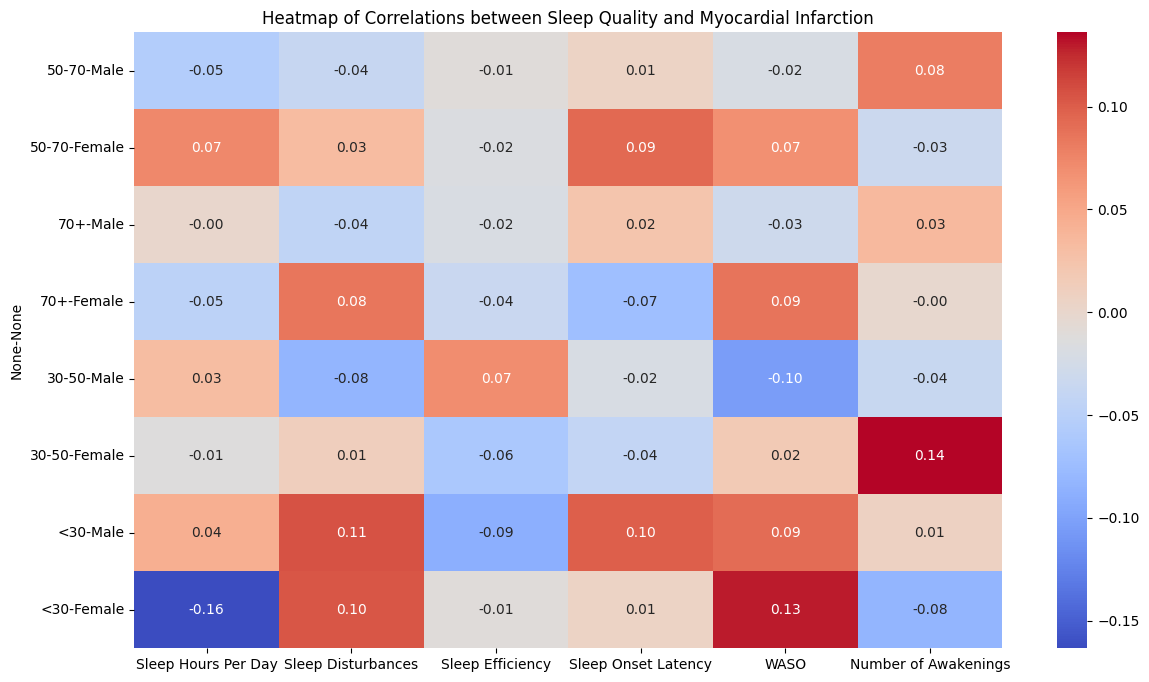

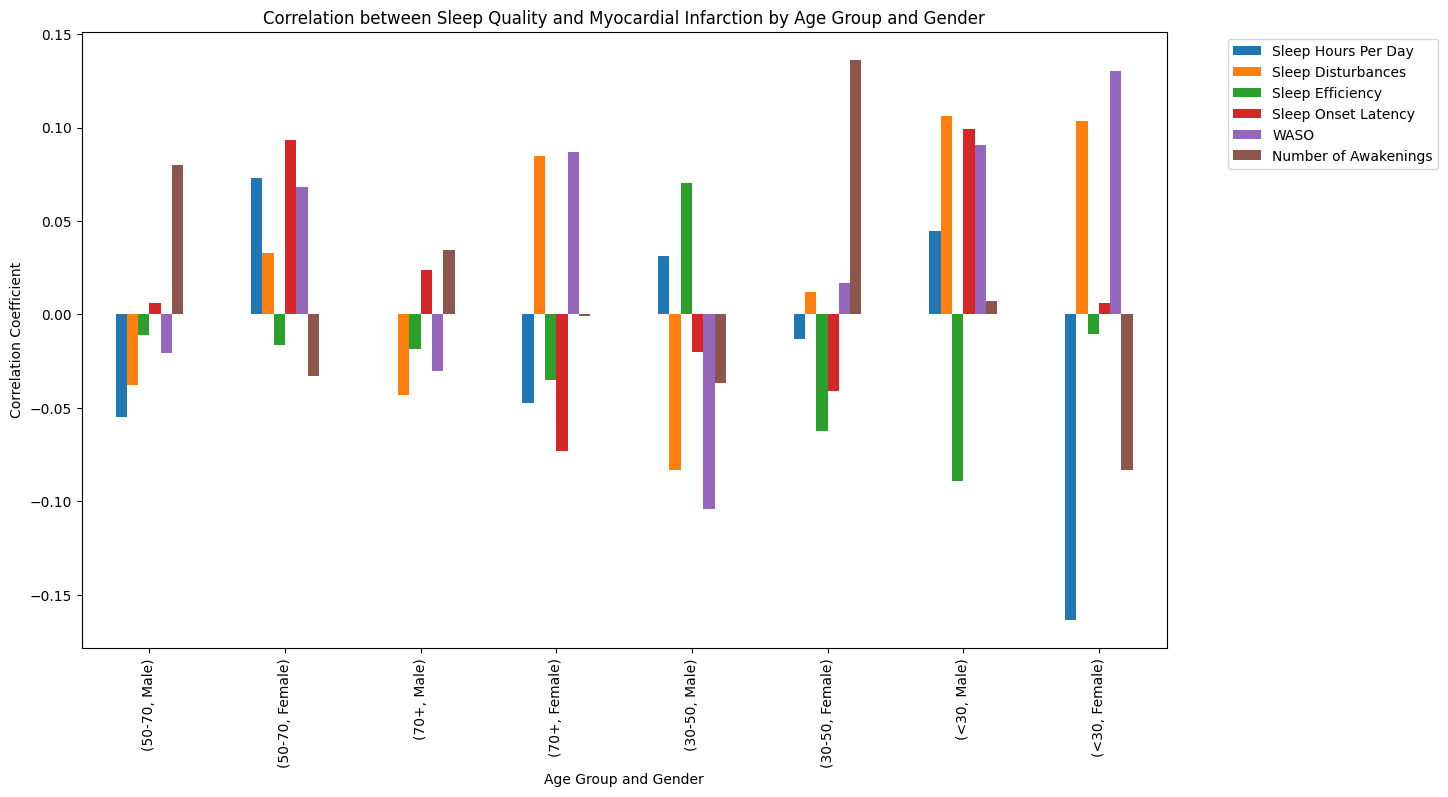

<Figure size 1200x800 with 0 Axes>

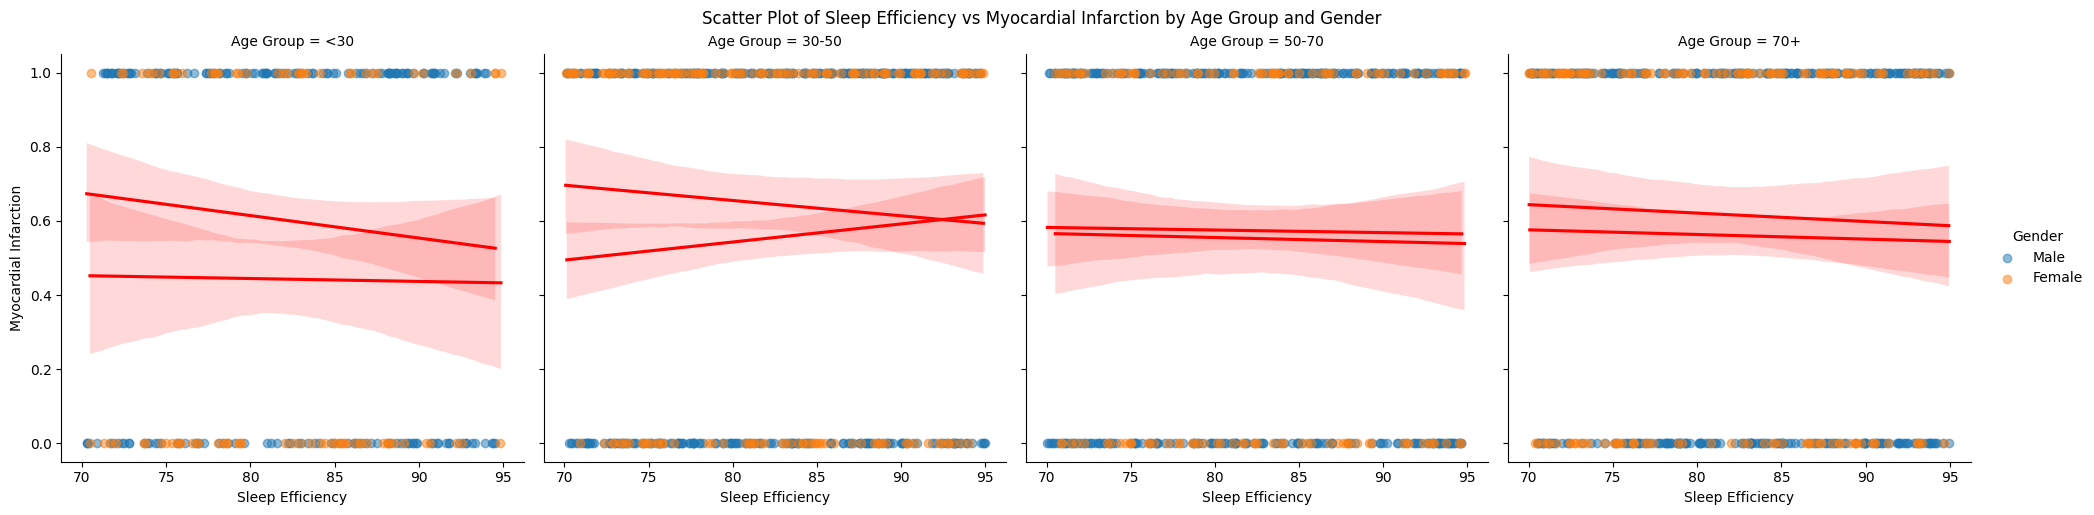

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot with regression line for one sleep variable (e.g., Sleep Efficiency)
plt.figure(figsize=(12, 8))
sns.lmplot(x='Sleep Efficiency', y='Myocardial Infarction', hue='Gender', col='Age Group', data=sleep_data, 
           scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.suptitle("Scatter Plot of Sleep Efficiency vs Myocardial Infarction by Age Group and Gender", y=1.02)
plt.show()

#Soubhi SAAD

In [5]:
import pandas as pd

# Assuming `sleep_data` is your DataFrame
# Create Age Group column
sleep_data['Age Group'] = pd.cut(sleep_data['Age'], bins=[0, 30, 50, 70, 100], labels=['<30', '30-50', '50-70', '70+'])

# Map Gender from Sex column
sleep_data['Gender'] = sleep_data['Sex'].map({'Male': 'Male', 'Female': 'Female'})

# Ensure the columns are created correctly
print(sleep_data[['Age Group', 'Gender']].head())

  Age Group Gender
0     50-70   Male
1       70+   Male
2     50-70   Male
3     30-50   Male
4     30-50   Male


<Figure size 1200x800 with 0 Axes>

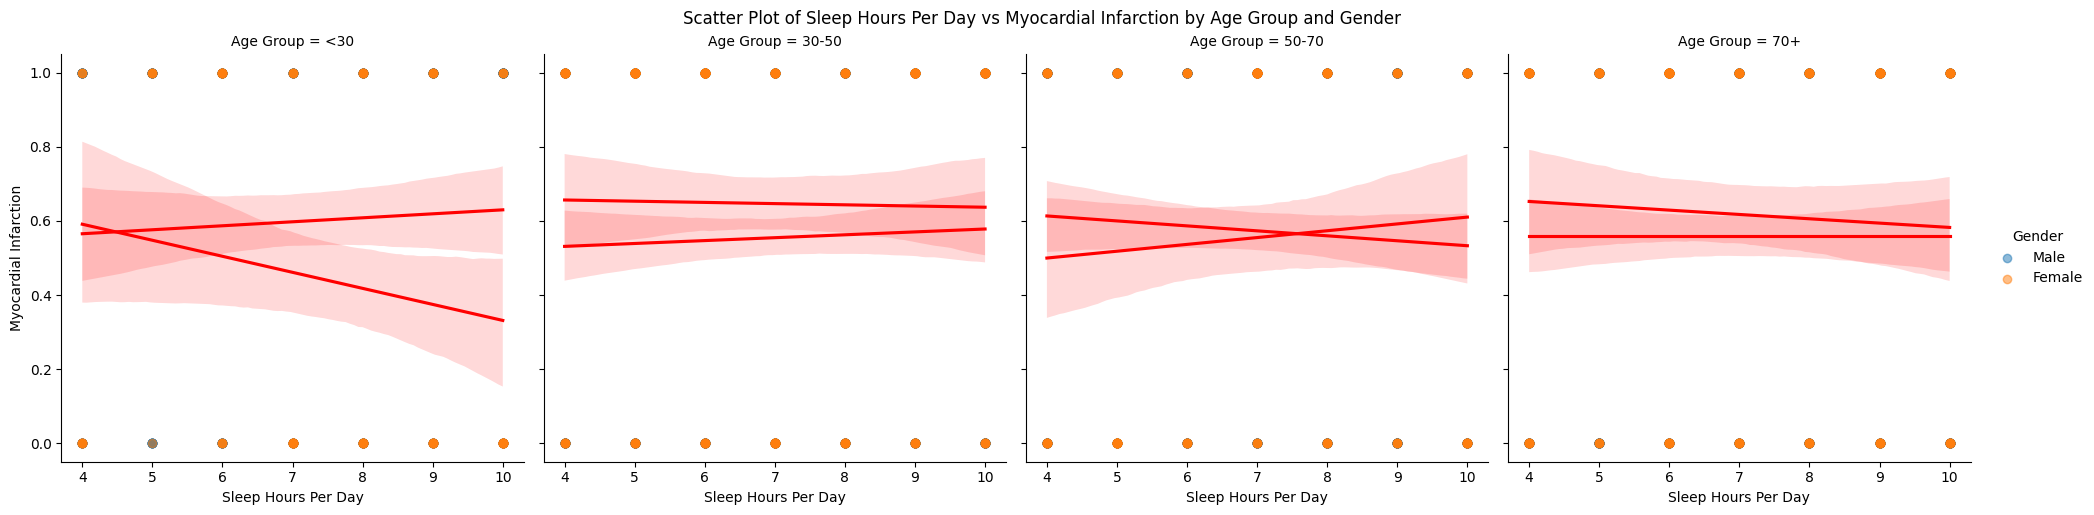

<Figure size 1200x800 with 0 Axes>

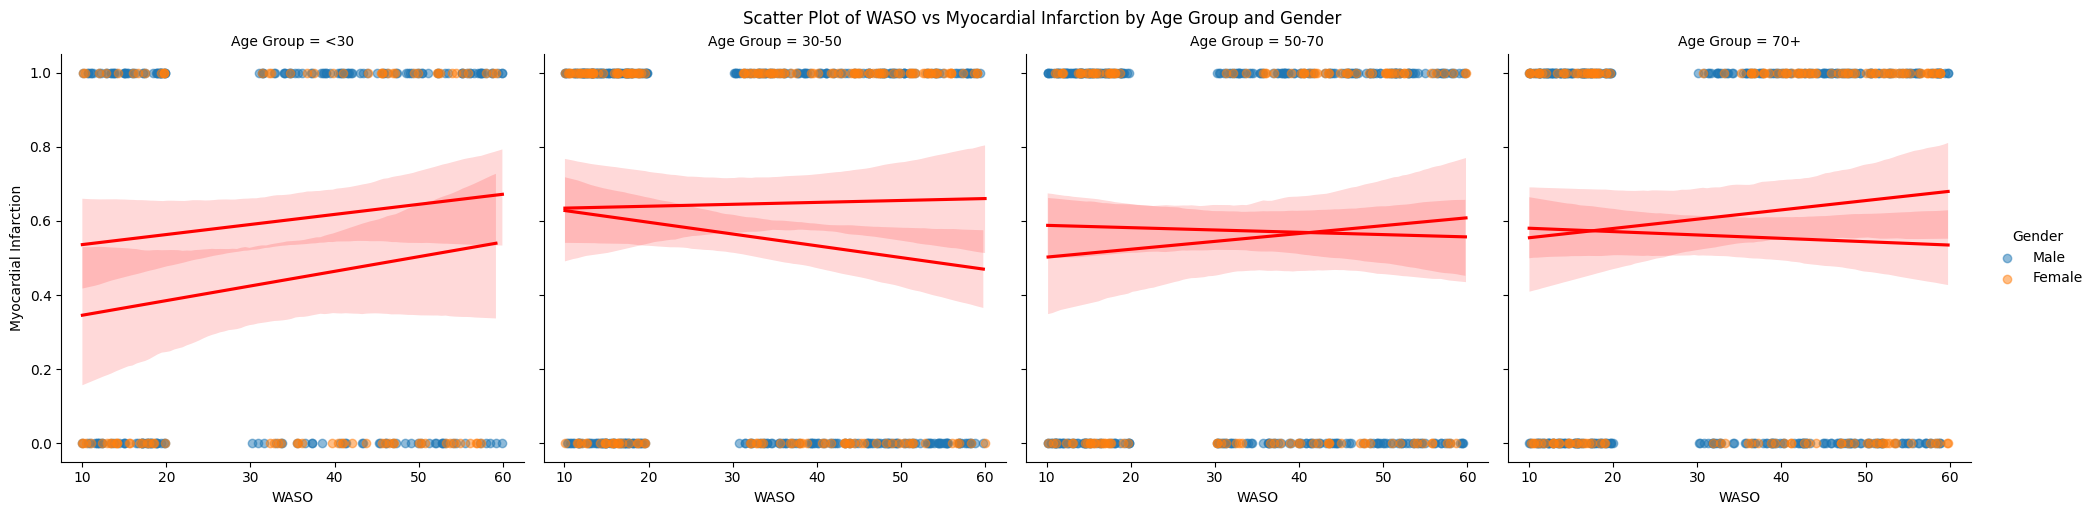

<Figure size 1200x800 with 0 Axes>

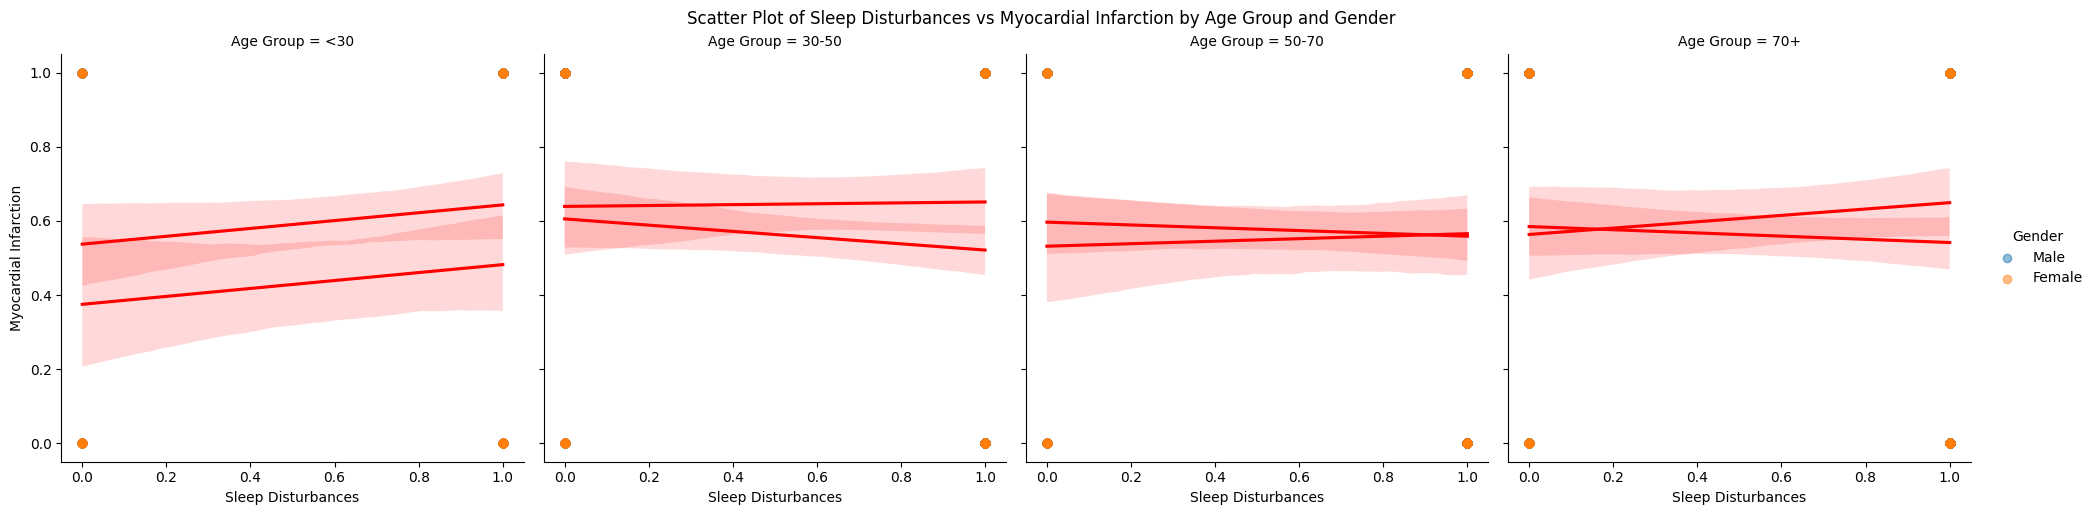

<Figure size 1200x800 with 0 Axes>

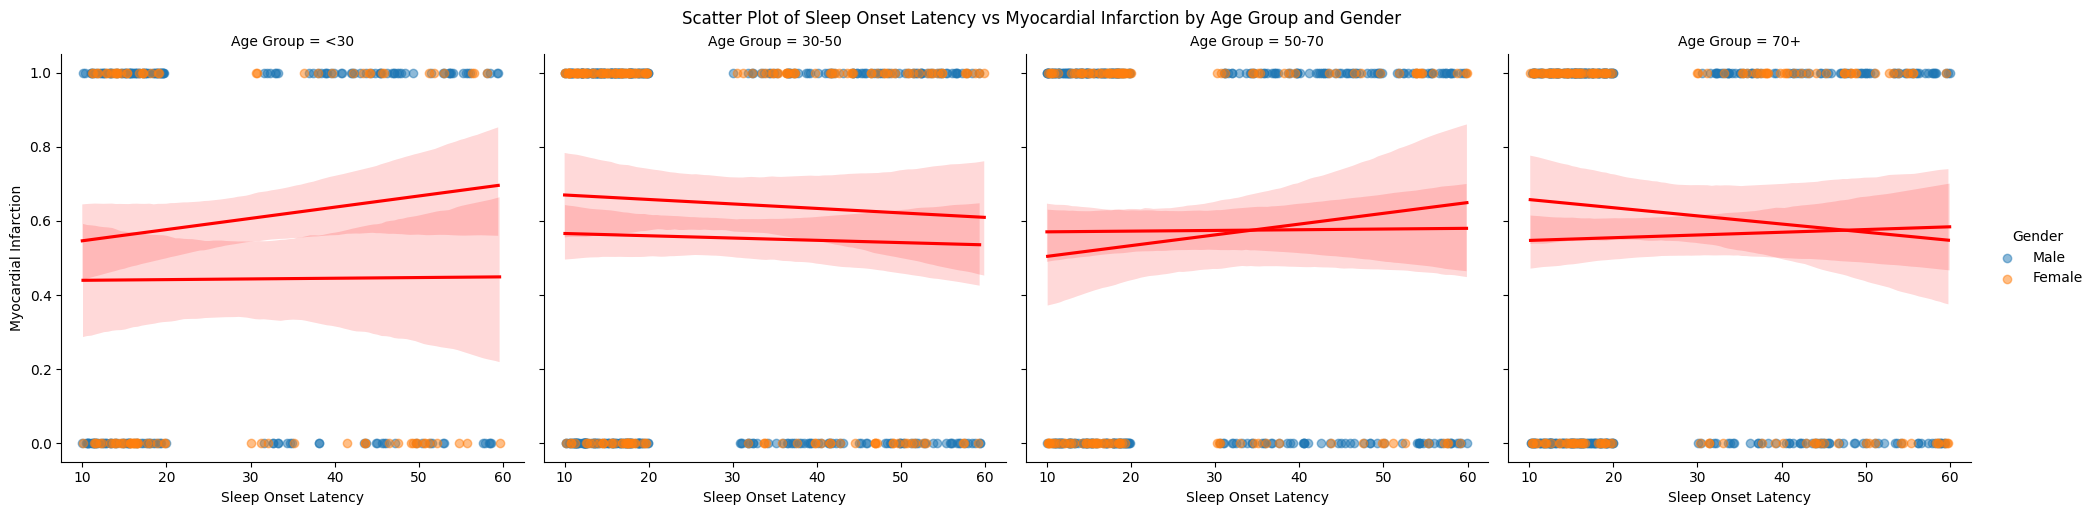

<Figure size 1200x800 with 0 Axes>

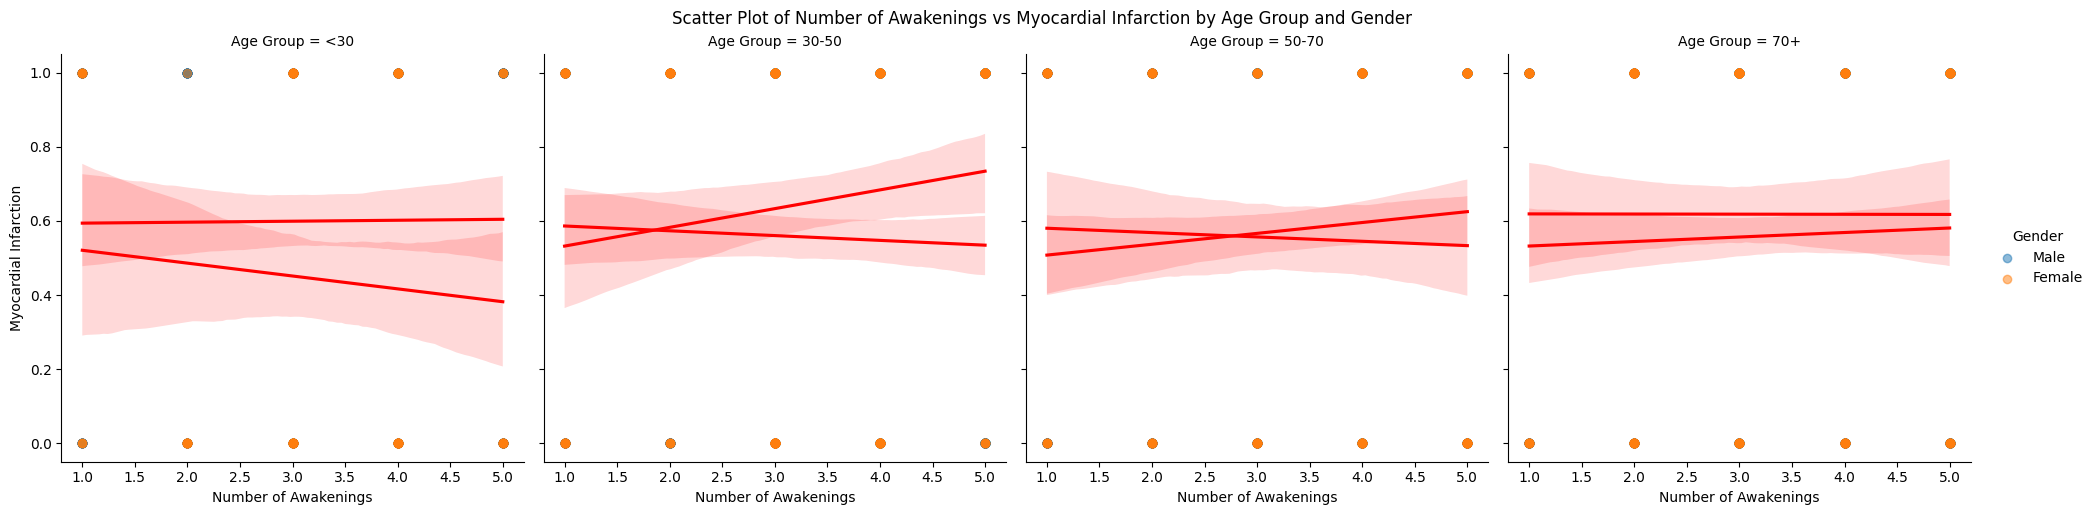

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of sleep variables to plot against Myocardial Infarction
sleep_vars = ['Sleep Hours Per Day', 'WASO', 'Sleep Disturbances', 'Sleep Onset Latency', 'Number of Awakenings']

# Loop to create scatter plots with regression lines for each sleep variable
for var in sleep_vars:
    plt.figure(figsize=(12, 8))
    sns.lmplot(x=var, y='Myocardial Infarction', hue='Gender', col='Age Group', data=sleep_data, 
               scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
    plt.suptitle(f"Scatter Plot of {var} vs Myocardial Infarction by Age Group and Gender", y=1.02)
    plt.show()

<Figure size 1200x800 with 0 Axes>

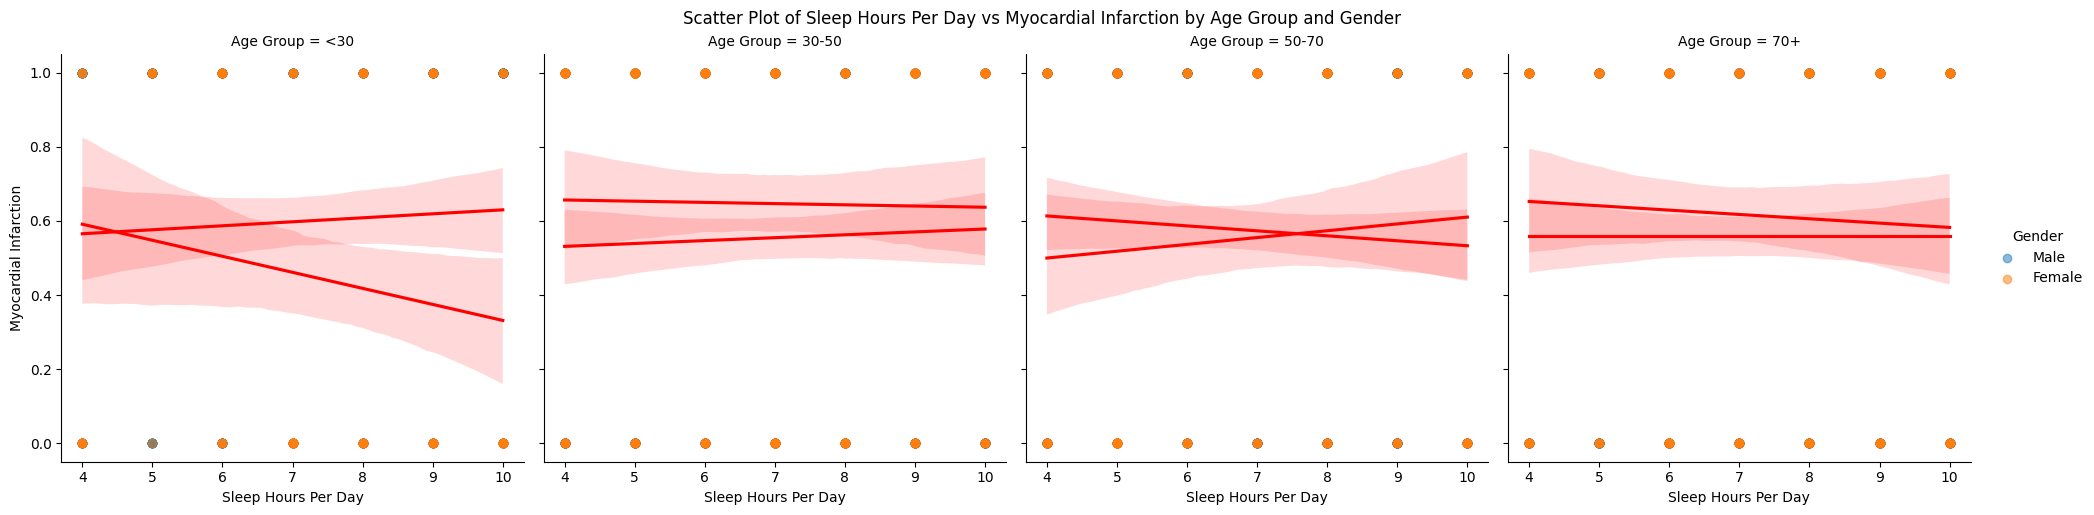

<Figure size 1200x800 with 0 Axes>

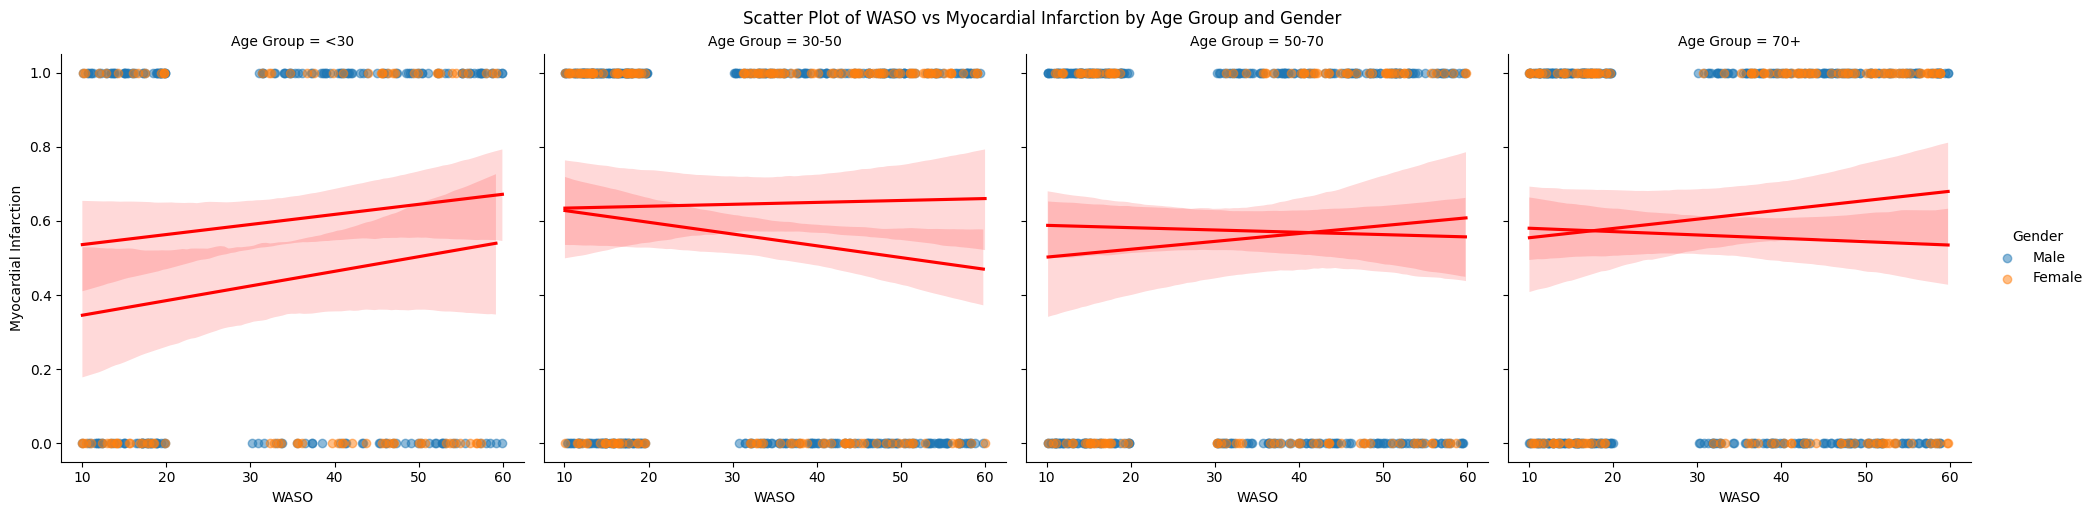

<Figure size 1200x800 with 0 Axes>

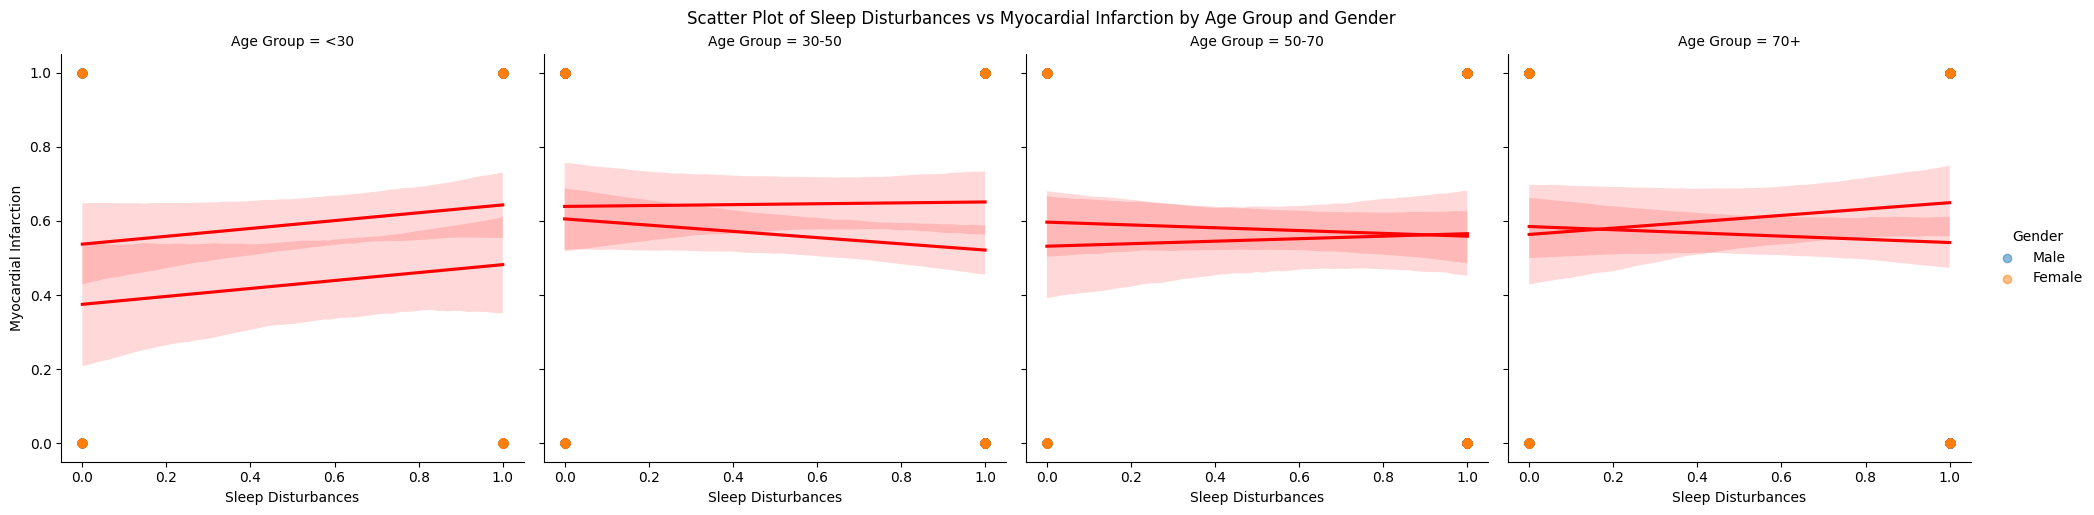

<Figure size 1200x800 with 0 Axes>

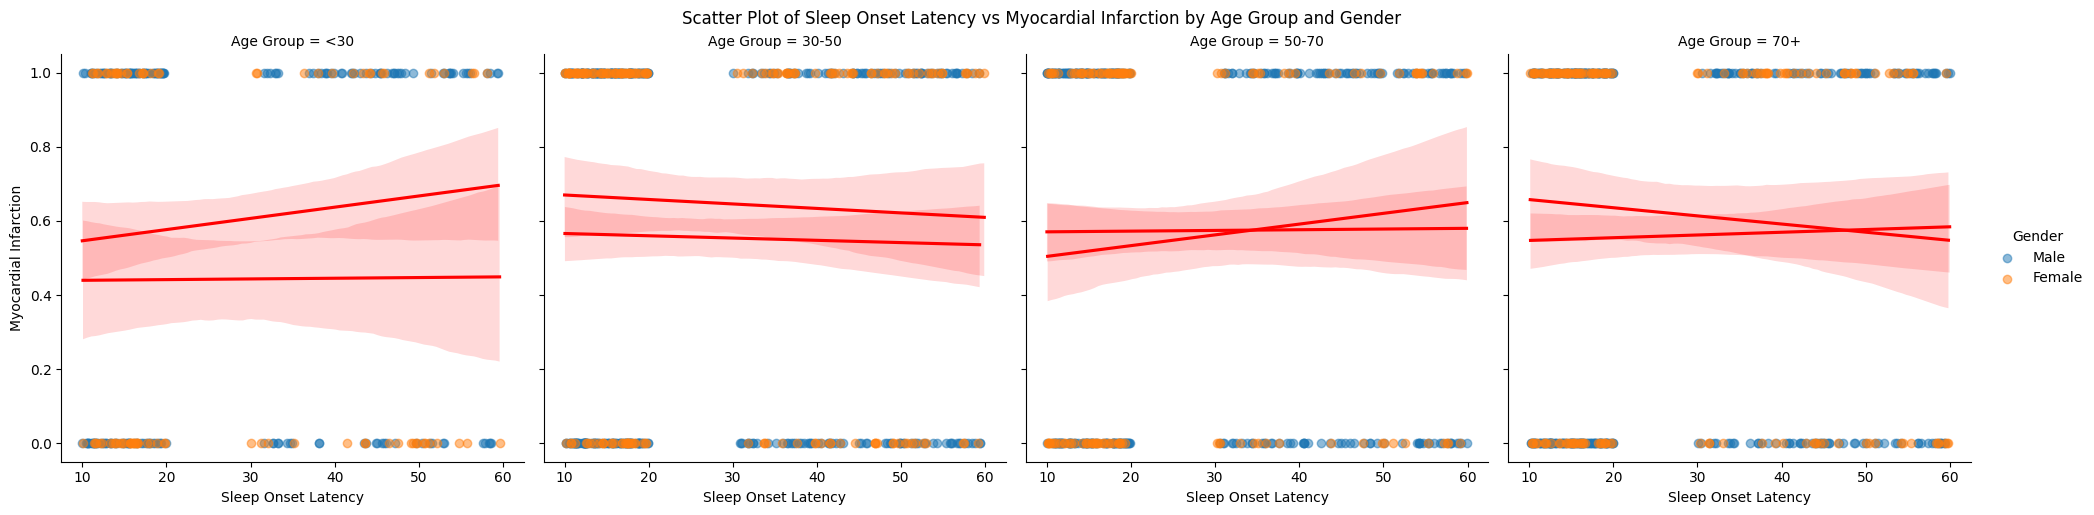

<Figure size 1200x800 with 0 Axes>

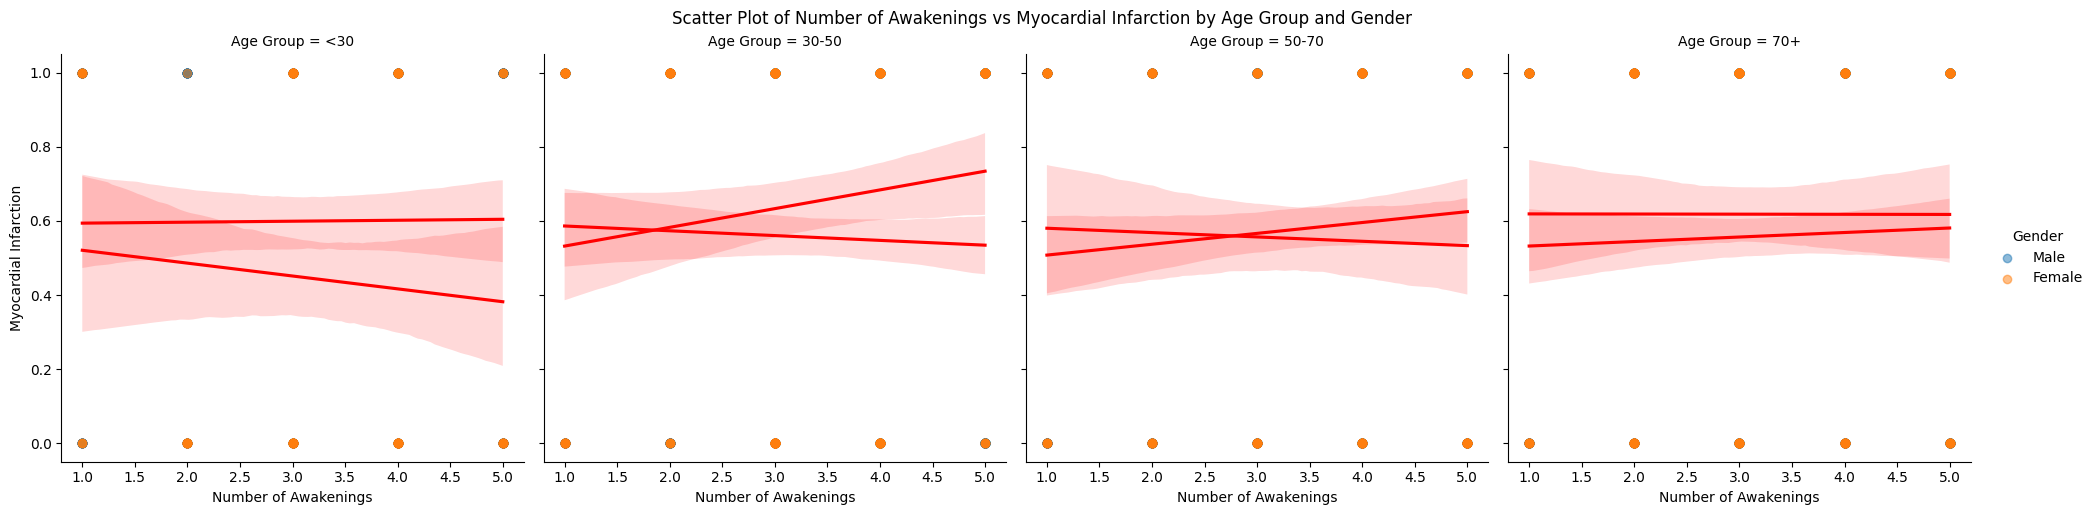

<Figure size 1200x800 with 0 Axes>

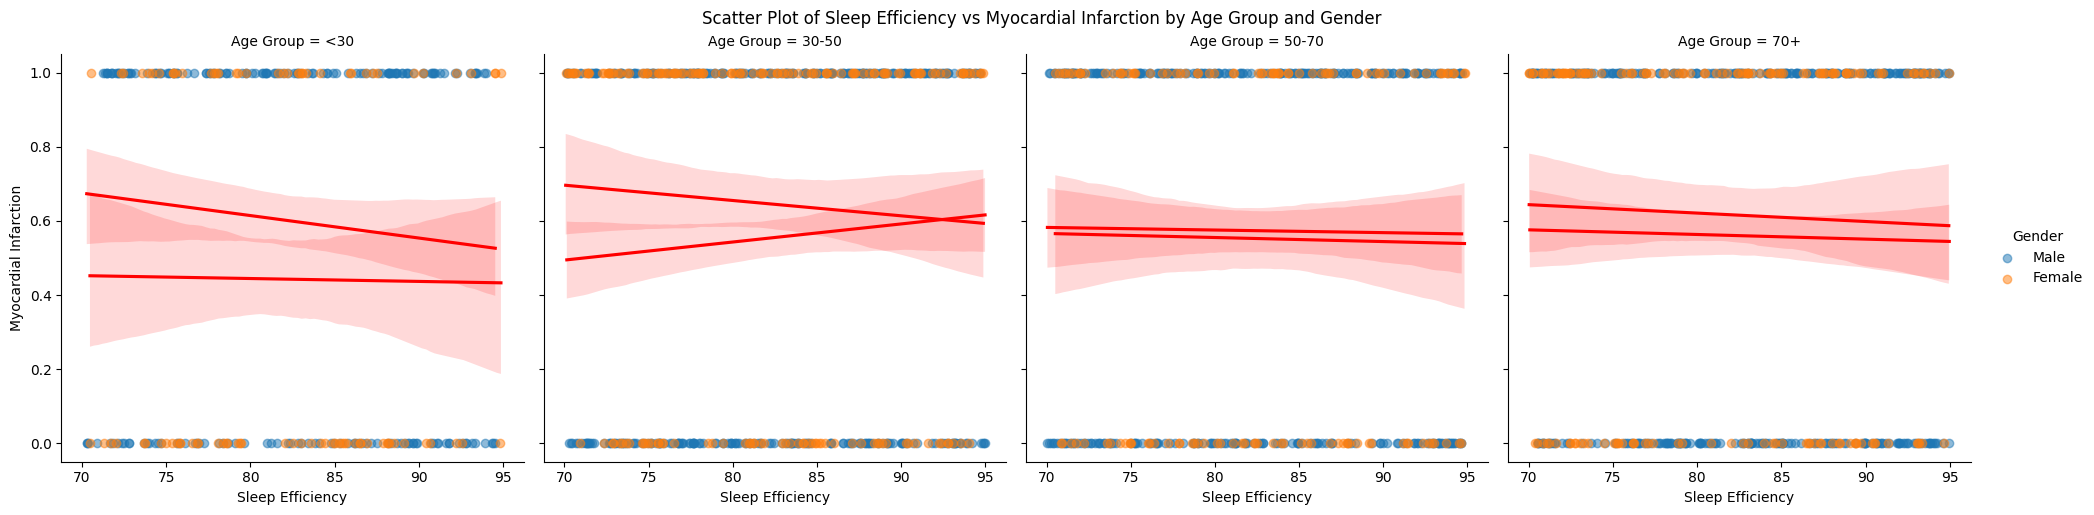

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of sleep variables to plot against Myocardial Infarction
sleep_vars = ['Sleep Hours Per Day', 'WASO', 'Sleep Disturbances', 'Sleep Onset Latency', 'Number of Awakenings', 'Sleep Efficiency']

# Loop to create scatter plots with regression lines for each sleep variable
for var in sleep_vars:
    plt.figure(figsize=(12, 8))
    sns.lmplot(x=var, y='Myocardial Infarction', hue='Gender', col='Age Group', data=sleep_data, 
               scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
    plt.suptitle(f"Scatter Plot of {var} vs Myocardial Infarction by Age Group and Gender", y=1.02)
    plt.show()

Sleep Hours Per Day: t-statistic = -0.40, p-value = 0.692


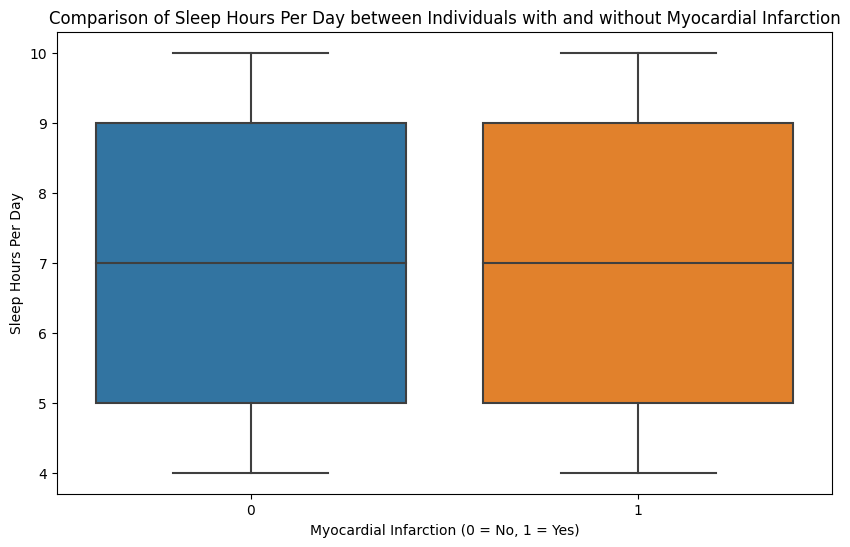

WASO: t-statistic = 0.02, p-value = 0.985


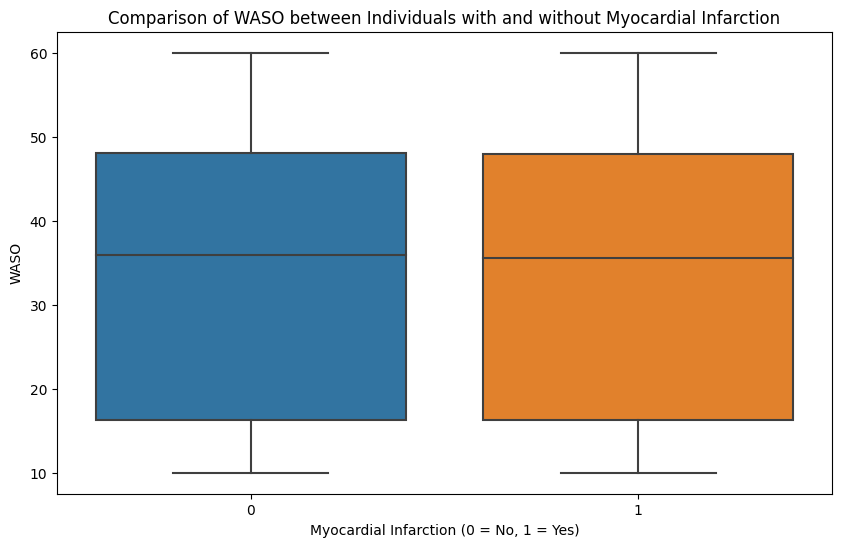

Sleep Disturbances: t-statistic = -0.17, p-value = 0.867


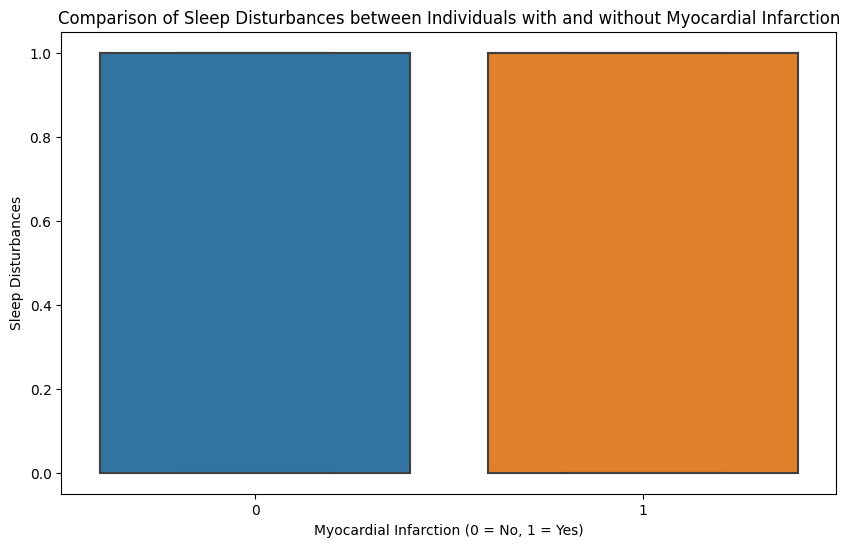

Sleep Onset Latency: t-statistic = 0.47, p-value = 0.635


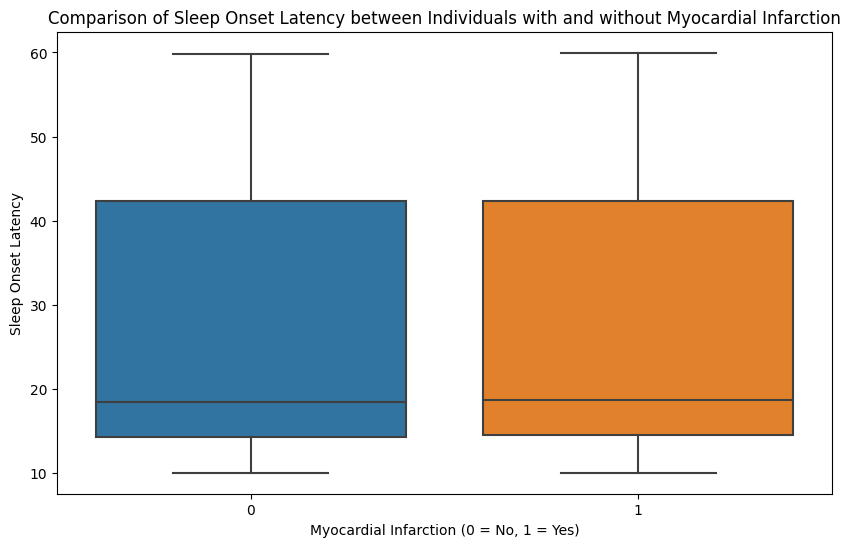

Number of Awakenings: t-statistic = 0.79, p-value = 0.432


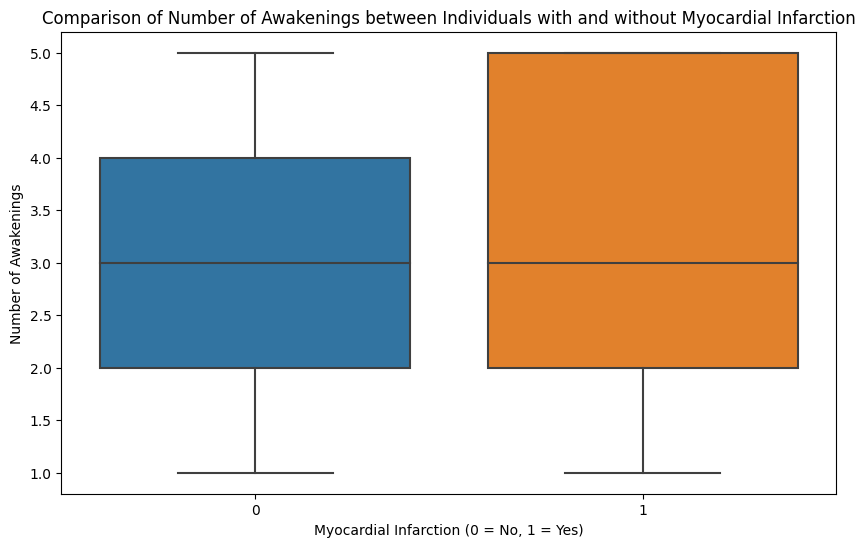

Sleep Efficiency: t-statistic = -0.57, p-value = 0.570


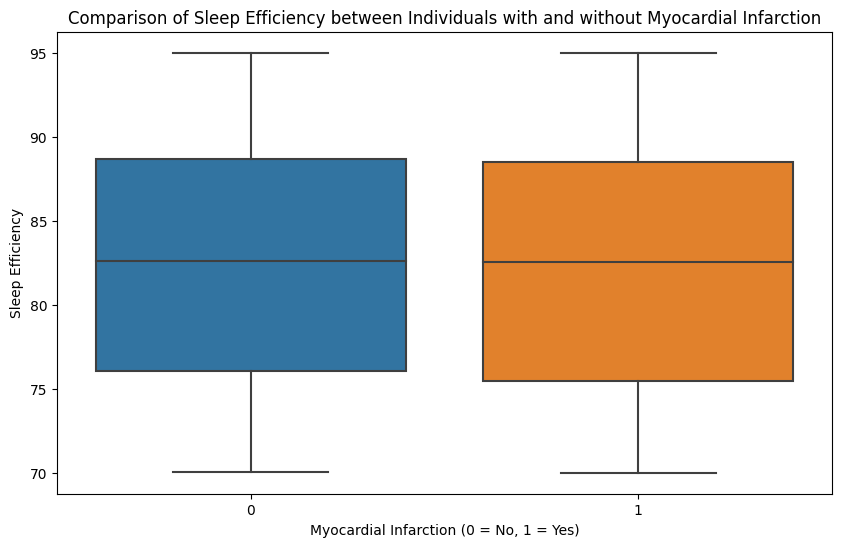

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

# Load your dataset
sleep_data = pd.read_csv('/kaggle/input/sleepheart-dataset-msc-project/TheOne Sleep Data.csv') 

# Create the two groups
group_1 = sleep_data[sleep_data['Myocardial Infarction'] == 1]
group_2 = sleep_data[sleep_data['Myocardial Infarction'] == 0]

# List of sleep variables to analyze
sleep_vars = ['Sleep Hours Per Day', 'WASO', 'Sleep Disturbances', 'Sleep Onset Latency', 'Number of Awakenings', 'Sleep Efficiency']

# Statistical comparison and visualization
for var in sleep_vars:
    # Perform a t-test to compare the means between the two groups
    t_stat, p_value = ttest_ind(group_1[var], group_2[var], equal_var=False)
    
    # Print the results of the t-test
    print(f"{var}: t-statistic = {t_stat:.2f}, p-value = {p_value:.3f}")
    
    # Plot the distributions of the sleep variable for both groups
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Myocardial Infarction', y=var, data=sleep_data)
    plt.title(f"Comparison of {var} between Individuals with and without Myocardial Infarction")
    plt.xlabel("Myocardial Infarction (0 = No, 1 = Yes)")
    plt.ylabel(var)
    plt.show()
    
# Soubhi SAAD

           Country  Myocardial Infarction
18   United States                     59
1        Australia                     58
9            Italy                     57
16        Thailand                     56
10           Japan                     54
3           Canada                     52
15           Spain                     52
2           Brazil                     50
17  United Kingdom                     50
5         Colombia                     49


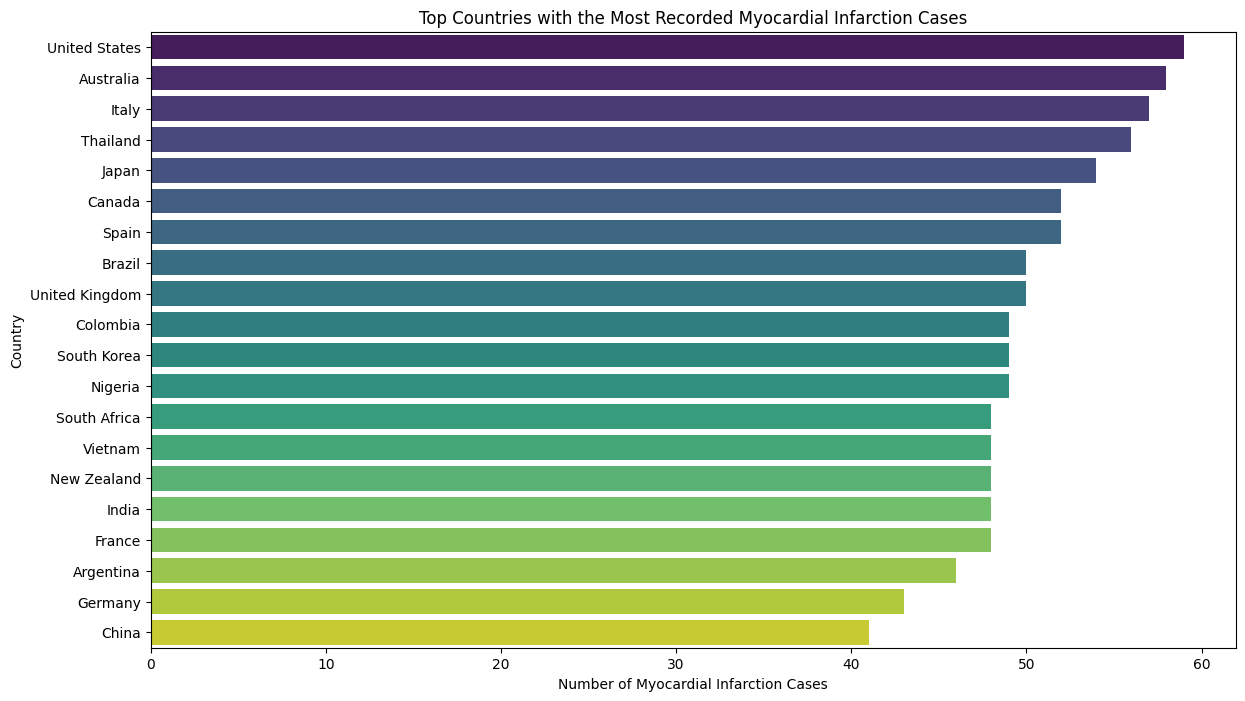

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset
sleep_data = pd.read_csv('/kaggle/input/sleepheart-dataset-msc-project/TheOne Sleep Data.csv')

# Group the data by Country and sum the Myocardial Infarction cases
country_mi_counts = sleep_data.groupby('Country')['Myocardial Infarction'].sum().reset_index()

# Sort the data by the number of MI cases in descending order
country_mi_counts = country_mi_counts.sort_values(by='Myocardial Infarction', ascending=False)

# Display the top countries with the most MI cases
print(country_mi_counts.head(10))

# Plot the data
plt.figure(figsize=(14, 8))
sns.barplot(x='Myocardial Infarction', y='Country', data=country_mi_counts, palette='viridis')
plt.title("Top Countries with the Most Recorded Myocardial Infarction Cases")
plt.xlabel("Number of Myocardial Infarction Cases")
plt.ylabel("Country")
plt.show()

#Soubhi SAAD

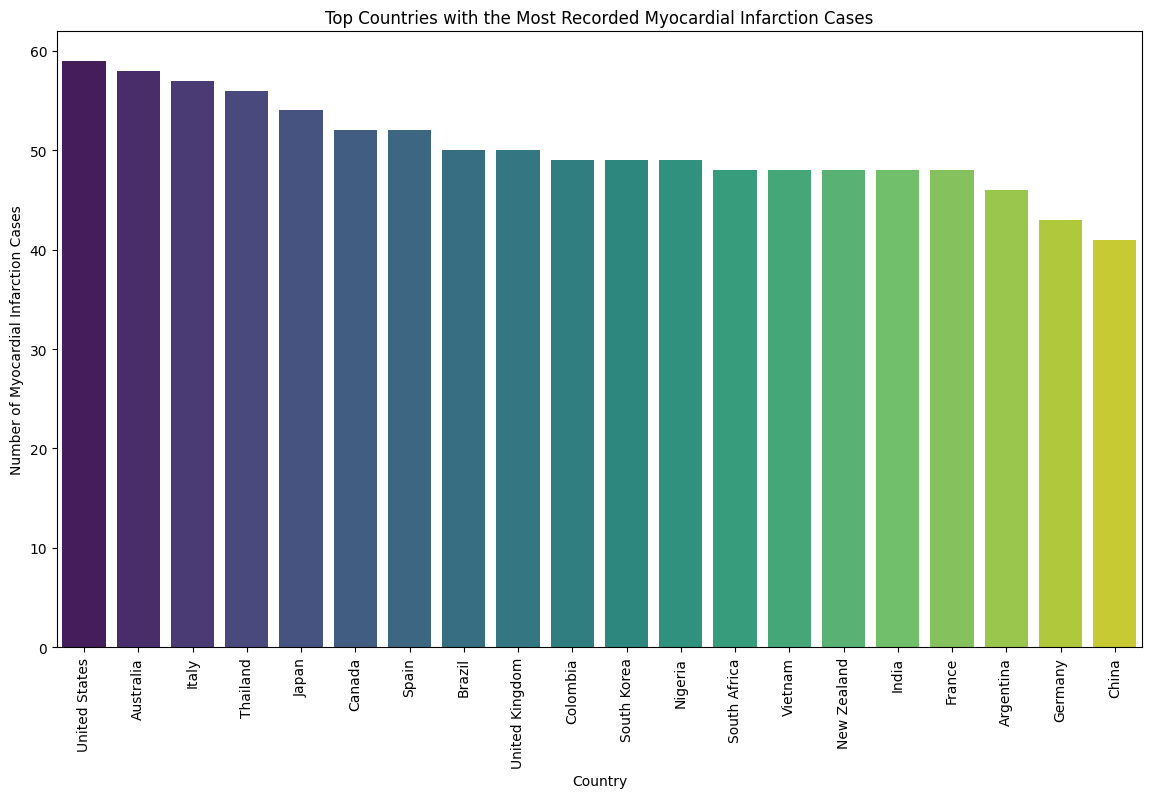

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the data with a vertical bar chart
plt.figure(figsize=(14, 8))
sns.barplot(x='Country', y='Myocardial Infarction', data=country_mi_counts, palette='viridis')
plt.title("Top Countries with the Most Recorded Myocardial Infarction Cases")
plt.xlabel("Country")
plt.ylabel("Number of Myocardial Infarction Cases")
plt.xticks(rotation=90)  # Rotate x labels for better readability
plt.show()

In [3]:
# Assuming your DataFrame is named 'sleep_data' and it has the columns 'Myocardial Infarction' and 'Smoking'
# Load your dataset

import pandas as pd

sleep_data = pd.read_csv('/kaggle/input/sleepheart-dataset-msc-project/TheOne Sleep Data.csv')

# Filter the dataset for individuals who had a myocardial infarction and who also smoke
mi_smokers = sleep_data[(sleep_data['Myocardial Infarction'] == 1) & (sleep_data['Smoking'] == 1)]

# Count the number of people who fall into this category
num_mi_smokers = mi_smokers.shape[0]

# Output the result
print(f"Number of people who had a Myocardial Infarction and smoke: {num_mi_smokers}")

Number of people who had a Myocardial Infarction and smoke: 912


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


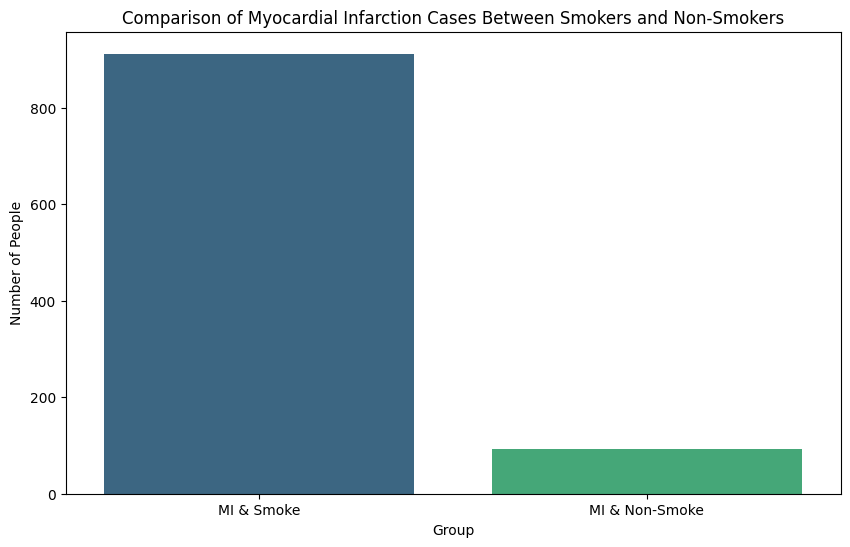

Number of people who had a Myocardial Infarction and smoke: 912
Number of people who had a Myocardial Infarction and do not smoke: 93


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the number of people who had a myocardial infarction but do not smoke
mi_non_smokers = sleep_data[(sleep_data['Myocardial Infarction'] == 1) & (sleep_data['Smoking'] == 0)]
num_mi_non_smokers = mi_non_smokers.shape[0]

# Data for plotting
categories = ['MI & Smoke', 'MI & Non-Smoke']
values = [912, num_mi_non_smokers]

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=categories, y=values, palette='viridis')
plt.title("Comparison of Myocardial Infarction Cases Between Smokers and Non-Smokers")
plt.ylabel("Number of People")
plt.xlabel("Group")
plt.show()

# Output the numbers for reference
print(f"Number of people who had a Myocardial Infarction and smoke: {912}")
print(f"Number of people who had a Myocardial Infarction and do not smoke: {num_mi_non_smokers}")

#Soubhi SAAD

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


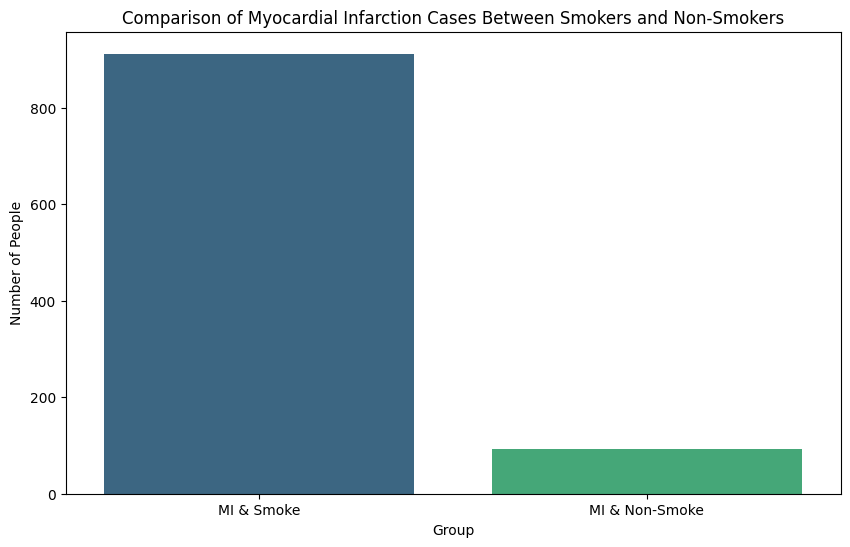

Number of people who had a Myocardial Infarction and smoke: 912
Number of people who had a Myocardial Infarction and do not smoke: 93


In [7]:
# Calculate the number of people who had a myocardial infarction and smoke
num_mi_smokers = sleep_data[(sleep_data['Myocardial Infarction'] == 1) & (sleep_data['Smoking'] == 1)].shape[0]

# Calculate the number of people who had a myocardial infarction but do not smoke
num_mi_non_smokers = sleep_data[(sleep_data['Myocardial Infarction'] == 1) & (sleep_data['Smoking'] == 0)].shape[0]

# Data for plotting
categories = ['MI & Smoke', 'MI & Non-Smoke']
values = [num_mi_smokers, num_mi_non_smokers]

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=categories, y=values, palette='viridis')
plt.title("Comparison of Myocardial Infarction Cases Between Smokers and Non-Smokers")
plt.ylabel("Number of People")
plt.xlabel("Group")
plt.show()

# Output the numbers for reference
print(f"Number of people who had a Myocardial Infarction and smoke: {num_mi_smokers}")
print(f"Number of people who had a Myocardial Infarction and do not smoke: {num_mi_non_smokers}")

In [8]:
# Get the distribution of stress levels for individuals with and without myocardial infarction
stress_mi = sleep_data[sleep_data['Myocardial Infarction'] == 1]['Stress Level']
stress_no_mi = sleep_data[sleep_data['Myocardial Infarction'] == 0]['Stress Level']

# Summary statistics
stress_mi.describe(), stress_no_mi.describe()

(count    1005.000000
 mean        5.560199
 std         2.817067
 min         1.000000
 25%         3.000000
 50%         6.000000
 75%         8.000000
 max        10.000000
 Name: Stress Level, dtype: float64,
 count    748.000000
 mean       5.516043
 std        2.931801
 min        1.000000
 25%        3.000000
 50%        6.000000
 75%        8.000000
 max       10.000000
 Name: Stress Level, dtype: float64)

In [9]:
from scipy.stats import ttest_ind

# Perform a t-test to compare stress levels between those with and without MI
t_stat, p_value = ttest_ind(stress_mi, stress_no_mi, equal_var=False)

print(f"T-Statistic: {t_stat:.2f}")
print(f"P-Value: {p_value:.3f}")

T-Statistic: 0.32
P-Value: 0.751


In [10]:
# Calculate the correlation between stress level and myocardial infarction
correlation = sleep_data['Stress Level'].corr(sleep_data['Myocardial Infarction'])

print(f"Correlation between Stress Level and Myocardial Infarction: {correlation:.2f}")

Correlation between Stress Level and Myocardial Infarction: 0.01


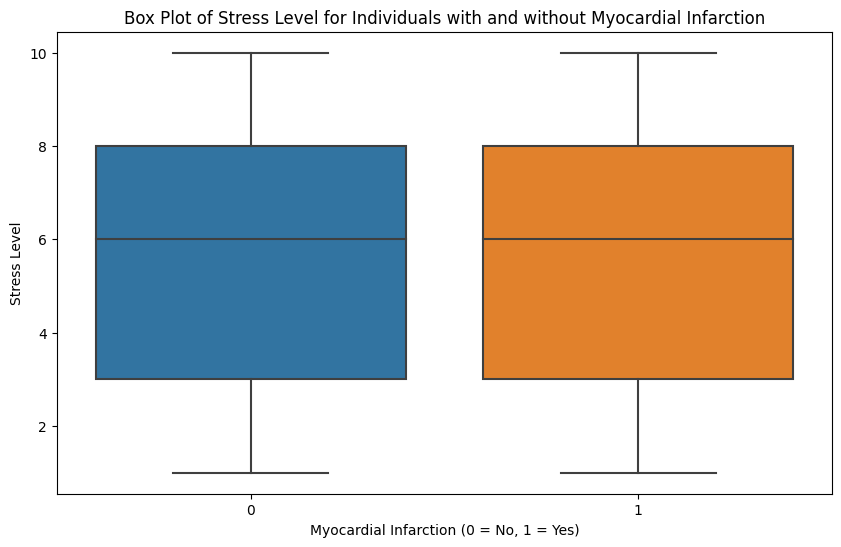

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Box plot of stress levels for individuals with and without MI
plt.figure(figsize=(10, 6))
sns.boxplot(x='Myocardial Infarction', y='Stress Level', data=sleep_data)
plt.title("Box Plot of Stress Level for Individuals with and without Myocardial Infarction")
plt.xlabel("Myocardial Infarction (0 = No, 1 = Yes)")
plt.ylabel("Stress Level")
plt.show()

In [13]:
# Descriptive statistics for individuals with and without myocardial infarction
mi_group = sleep_data[sleep_data['Myocardial Infarction'] == 1]
no_mi_group = sleep_data[sleep_data['Myocardial Infarction'] == 0]

# Summary statistics for BMI, Sleep Hours Per Day, Sleep Efficiency, Age
mi_summary = mi_group[['BMI', 'Sleep Hours Per Day', 'Sleep Efficiency', 'Age']].describe()
no_mi_summary = no_mi_group[['BMI', 'Sleep Hours Per Day', 'Sleep Efficiency', 'Age']].describe()

mi_summary, no_mi_summary

(               BMI  Sleep Hours Per Day  Sleep Efficiency          Age
 count  1005.000000          1005.000000       1005.000000  1005.000000
 mean     28.765488             7.001990         82.226405    54.502488
 std       6.380059             1.943934          7.379096    20.739545
 min      18.036077             4.000000         70.013730    18.000000
 25%      22.939036             5.000000         75.498403    36.000000
 50%      28.718921             7.000000         82.550715    54.000000
 75%      34.373021             9.000000         88.490511    73.000000
 max      39.997211            10.000000         94.960677    90.000000,
               BMI  Sleep Hours Per Day  Sleep Efficiency         Age
 count  748.000000           748.000000        748.000000  748.000000
 mean    29.180206             7.040107         82.427817   54.491979
 std      6.205778             2.026860          7.298057   21.521041
 min     18.004211             4.000000         70.045382   18.000000
 

In [14]:
# Correlation matrix
correlation_matrix = sleep_data[['BMI', 'Sleep Hours Per Day', 'Sleep Efficiency', 'Age', 'Myocardial Infarction']].corr()

correlation_matrix

BMI  Sleep Hours Per Day  Sleep Efficiency  \
BMI                    1.000000            -0.028553          0.003112   
Sleep Hours Per Day   -0.028553             1.000000         -0.023735   
Sleep Efficiency       0.003112            -0.023735          1.000000   
Age                    0.010984            -0.056661          0.009726   
Myocardial Infarction -0.032527            -0.009528         -0.013570   

                            Age  Myocardial Infarction  
BMI                    0.010984              -0.032527  
Sleep Hours Per Day   -0.056661              -0.009528  
Sleep Efficiency       0.009726              -0.013570  
Age                    1.000000               0.000247  
Myocardial Infarction  0.000247               1.000000

In [18]:
# Print the column names in your dataset
print(sleep_data.columns)

Index(['Patient ID', 'Age', 'Sex', 'Cholesterol', 'Blood Pressure',
       'Heart Rate', 'Diabetes', 'Family History', 'Smoking', 'Obesity',
       'Alcohol Consumption', 'Exercise Hours Per Week', 'Diet',
       'Previous Heart Problems', 'Medication Use', 'Stress Level',
       'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides',
       'Physical Activity Days Per Week', 'Sleep Hours Per Day', 'Country',
       'Continent', 'Hemisphere', 'Myocardial Infarction',
       'Sleep Disturbances', 'Sleep Efficiency', 'Sleep Onset Latency', 'WASO',
       'Number of Awakenings'],
      dtype='object')


In [20]:
# Convert categorical variables to numeric form using pd.get_dummies()
X = sleep_data[['BMI', 'Sleep Hours Per Day', 'Sleep Efficiency', 'Age', 'Sex']]  # Adjust column names as necessary
X = pd.get_dummies(X, drop_first=True)  # Convert categorical variables to dummy variables

# Ensure that all columns in X are numeric
X = X.apply(pd.to_numeric, errors='coerce')

# Check for any remaining non-numeric values
print(X.dtypes)

BMI                    float64
Sleep Hours Per Day      int64
Sleep Efficiency       float64
Age                      int64
Sex_Male                  bool
dtype: object


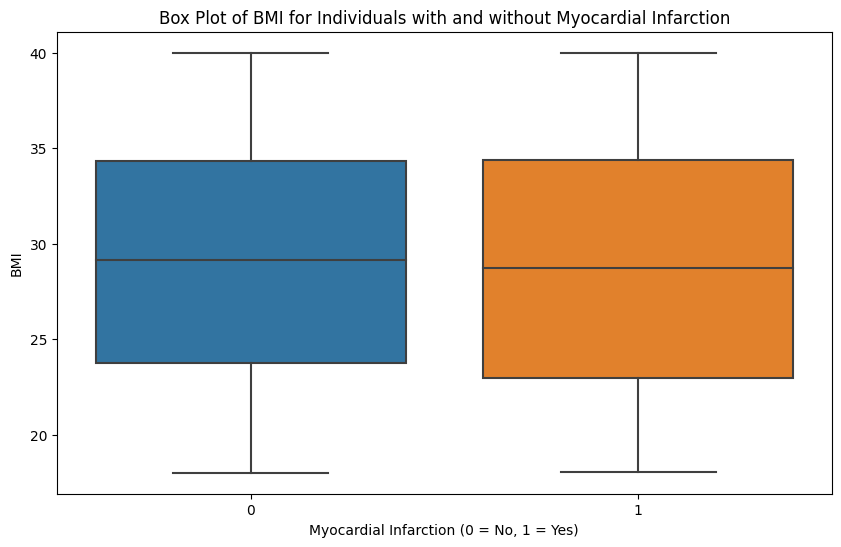

In [16]:
# Box plot of BMI for individuals with and without MI
plt.figure(figsize=(10, 6))
sns.boxplot(x='Myocardial Infarction', y='BMI', data=sleep_data)
plt.title("Box Plot of BMI for Individuals with and without Myocardial Infarction")
plt.xlabel("Myocardial Infarction (0 = No, 1 = Yes)")
plt.ylabel("BMI")
plt.show()

In [29]:
import statsmodels.api as sm
import pandas as pd

# Load the dataset
sleep_data = pd.read_csv('/kaggle/input/sleepheart-dataset-msc-project/TheOne Sleep Data.csv')  # Replace with the correct path to your file

# Define the independent variables
X = sleep_data[['Sleep Hours Per Day', 'Sleep Efficiency', 'Sleep Disturbances', 'WASO', 'Number of Awakenings', 'Age', 'Sex']]
X = pd.get_dummies(X, drop_first=True)  # Convert categorical variables to dummy variables

# Interaction terms: Sleep Efficiency * Age and Sleep Efficiency * Sex
X['SleepEfficiency_Age'] = X['Sleep Efficiency'] * X['Age']
X['SleepEfficiency_Sex'] = X['Sleep Efficiency'] * X['Sex_Male']

# Add a constant (intercept) to the model
X = sm.add_constant(X)

# Dependent variable
y = sleep_data['Myocardial Infarction']

# Convert X and y to numpy arrays to ensure proper data types
X_array = X.values
y_array = y.values

# Fit the logistic regression model using the numpy arrays
logit_model = sm.Logit(y_array, X_array)
result = logit_model.fit()

# Display the results
print(result.summary())

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [32]:
from sklearn.preprocessing import StandardScaler

# Standardize the sleep variables
scaler = StandardScaler()
sleep_data[['Sleep Hours Per Day', 'Sleep Efficiency', 'Sleep Disturbances', 'WASO', 'Number of Awakenings']] = scaler.fit_transform(
    sleep_data[['Sleep Hours Per Day', 'Sleep Efficiency', 'Sleep Disturbances', 'WASO', 'Number of Awakenings']])

# Create a composite sleep quality index (average of the standardized values)
sleep_data['Composite Sleep Quality Index'] = sleep_data[
    ['Sleep Hours Per Day', 'Sleep Efficiency', 'Sleep Disturbances', 'WASO', 'Number of Awakenings']].mean(axis=1)

# Correlate this index with myocardial infarction
correlation = sleep_data['Composite Sleep Quality Index'].corr(sleep_data['Myocardial Infarction'])
print(f"Correlation between Composite Sleep Quality Index and Myocardial Infarction: {correlation:.2f}")

Correlation between Composite Sleep Quality Index and Myocardial Infarction: -0.00


In [33]:
from sklearn.cluster import KMeans

# Select sleep quality variables for clustering
sleep_variables = sleep_data[['Sleep Hours Per Day', 'Sleep Efficiency', 'Sleep Disturbances', 'WASO', 'Number of Awakenings']]

# Perform KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
sleep_data['Sleep Cluster'] = kmeans.fit_predict(sleep_variables)

# Analyze the distribution of myocardial infarction across clusters
cluster_mi_counts = sleep_data.groupby('Sleep Cluster')['Myocardial Infarction'].mean()
print(cluster_mi_counts)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Sleep Cluster
0    0.560345
1    0.580537
2    0.575758
Name: Myocardial Infarction, dtype: float64


In [34]:
# Group data by country and calculate the correlation between sleep quality and MI for each country
country_correlations = sleep_data.groupby('Country').apply(
    lambda df: df['Composite Sleep Quality Index'].corr(df['Myocardial Infarction']))

print(country_correlations)

Country
Argentina         0.209680
Australia         0.014327
Brazil            0.197145
Canada           -0.040575
China             0.016706
Colombia         -0.051253
France           -0.159742
Germany          -0.085198
India            -0.000013
Italy            -0.048226
Japan             0.018874
New Zealand       0.051385
Nigeria          -0.306172
South Africa     -0.044061
South Korea       0.186757
Spain            -0.033786
Thailand         -0.185920
United Kingdom   -0.129153
United States     0.152064
Vietnam           0.112945
dtype: float64


/tmp/ipykernel_33/2614742392.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  country_correlations = sleep_data.groupby('Country').apply(


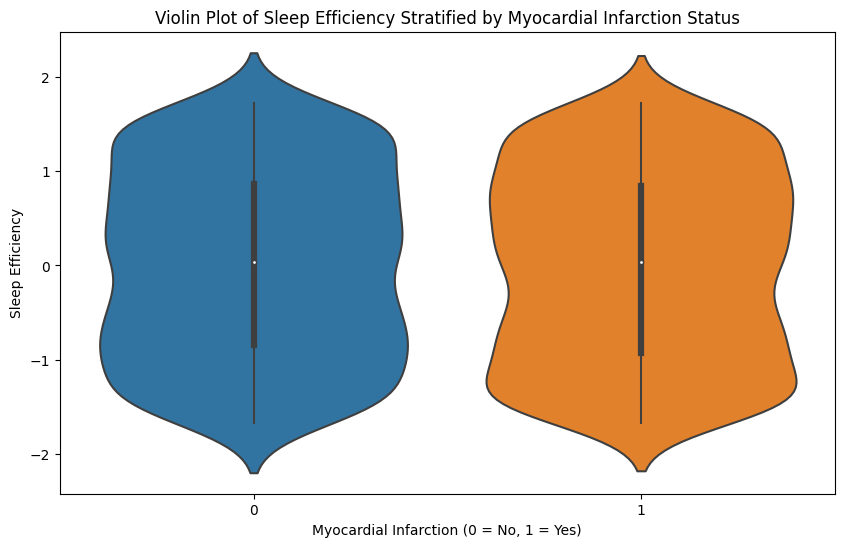

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# Violin plot of sleep efficiency stratified by MI status
plt.figure(figsize=(10, 6))
sns.violinplot(x='Myocardial Infarction', y='Sleep Efficiency', data=sleep_data)
plt.title('Violin Plot of Sleep Efficiency Stratified by Myocardial Infarction Status')
plt.xlabel('Myocardial Infarction (0 = No, 1 = Yes)')
plt.ylabel('Sleep Efficiency')
plt.show()

**ADDITIONAL ANAYSIS**

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00       212
           1       0.60      1.00      0.75       314

    accuracy                           0.60       526
   macro avg       0.30      0.50      0.37       526
weighted avg       0.36      0.60      0.45       526

ROC AUC Score: 0.5253575291431318


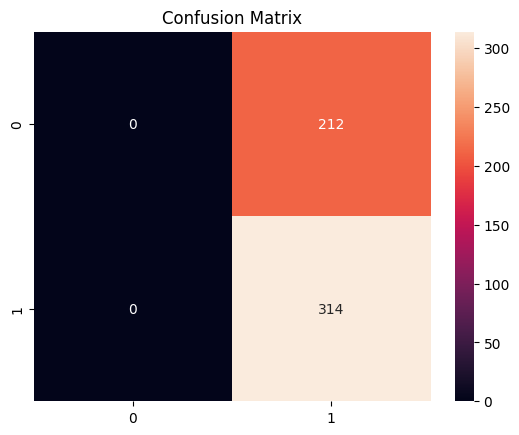

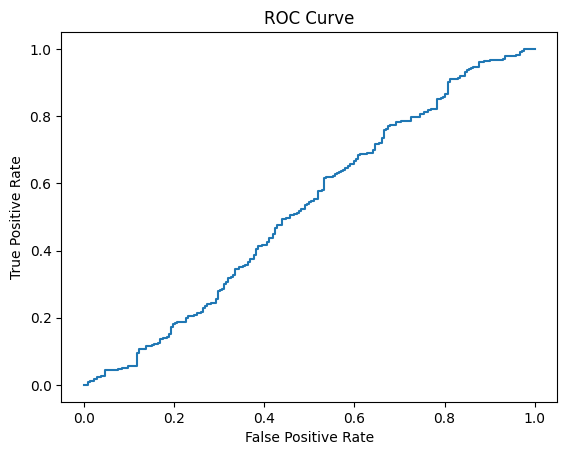

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, confusion_matrix
import matplotlib.pyplot as plt

# Load the dataset (replace 'your_dataset.csv' with the correct file path)
data = pd.read_csv('/kaggle/input/sleepheart-dataset-msc-project/TheOne Sleep Data.csv')

# Feature selection (you can adjust this based on your variables of interest)
X = data[['Sleep Efficiency', 'Sleep Hours Per Day', 'Sleep Disturbances', 'Age', 'Sex']]
y = data['Myocardial Infarction']

# One-hot encoding for categorical variables
X = pd.get_dummies(X, drop_first=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Logistic Regression Model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Model evaluation
print(classification_report(y_test, y_pred))
print('ROC AUC Score:', roc_auc_score(y_test, y_pred_proba))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d")
plt.title('Confusion Matrix')
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

[[107 117]
 [155 147]]
              precision    recall  f1-score   support

           0       0.41      0.48      0.44       224
           1       0.56      0.49      0.52       302

    accuracy                           0.48       526
   macro avg       0.48      0.48      0.48       526
weighted avg       0.49      0.48      0.49       526



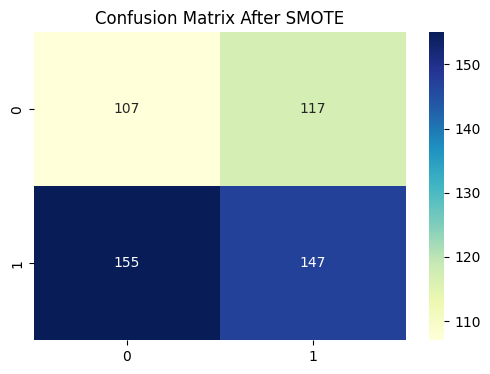

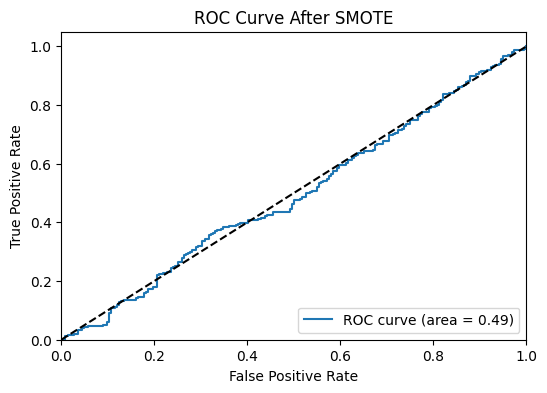

ROC AUC Score: 0.494


In [22]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset (replace 'your_dataset.csv' with the correct file path)
sleep_data = pd.read_csv('/kaggle/input/sleepheart-dataset-msc-project/TheOne Sleep Data.csv')

# Split the data into training and testing sets
X = sleep_data[['Sleep Hours Per Day', 'Sleep Efficiency', 'Sleep Disturbances', 'WASO', 'Number of Awakenings', 'Age', 'Sex']]
y = sleep_data['Myocardial Infarction']

# Convert categorical variables to dummy variables
X = pd.get_dummies(X, drop_first=True)

# Split into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Apply SMOTE to the training set
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

# Train a logistic regression model on the SMOTE-balanced data
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train_sm, y_train_sm)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="YlGnBu")
plt.title("Confusion Matrix After SMOTE")
plt.show()

# Plot ROC Curve
y_pred_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve After SMOTE')
plt.legend(loc="lower right")
plt.show()


print(f"ROC AUC Score: {roc_auc:.3f}")

In [24]:
# Descriptive statistics for Alcohol Consumption in individuals with and without myocardial infarction
mi_group = sleep_data[sleep_data['Myocardial Infarction'] == 1]['Alcohol Consumption']
no_mi_group = sleep_data[sleep_data['Myocardial Infarction'] == 0]['Alcohol Consumption']

# Summary statistics
mi_summary = mi_group.describe()
no_mi_summary = no_mi_group.describe()

mi_summary, no_mi_summary

(count    1005.000000
 mean        0.599005
 std         0.490344
 min         0.000000
 25%         0.000000
 50%         1.000000
 75%         1.000000
 max         1.000000
 Name: Alcohol Consumption, dtype: float64,
 count    748.000000
 mean       0.617647
 std        0.486287
 min        0.000000
 25%        0.000000
 50%        1.000000
 75%        1.000000
 max        1.000000
 Name: Alcohol Consumption, dtype: float64)

In [26]:
from scipy.stats import ttest_ind

# Perform a t-test to compare alcohol consumption between those with and without MI
t_stat, p_value = ttest_ind(mi_group, no_mi_group, equal_var=False)

print(f"T-Statistic: {t_stat:.2f}")
print(f"P-Value: {p_value:.3f}")

T-Statistic: -0.79
P-Value: 0.429


In [27]:
# Calculate the correlation between alcohol consumption and myocardial infarction
correlation = sleep_data['Alcohol Consumption'].corr(sleep_data['Myocardial Infarction'])

print(f"Correlation between Alcohol Consumption and Myocardial Infarction: {correlation:.2f}")

Correlation between Alcohol Consumption and Myocardial Infarction: -0.02


In [29]:
# Logistic regression model to see the effect of Alcohol Consumption on MI
X = sleep_data[['Alcohol Consumption', 'Age', 'Sex', 'Sleep Hours Per Day', 'Sleep Efficiency', 'Sleep Disturbances']]
X = pd.get_dummies(X, drop_first=True)  # Convert categorical variables to dummy variables
y = sleep_data['Myocardial Infarction']

# Add a constant to the model (intercept)
X = sm.add_constant(X)

# Fit the logistic regression model
logit_model = sm.Logit(y, X)
result = logit_model.fit()

# Summary of the logistic regression model
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.681533
         Iterations 4
                             Logit Regression Results                            
Dep. Variable:     Myocardial Infarction   No. Observations:                 1753
Model:                             Logit   Df Residuals:                     1746
Method:                              MLE   Df Model:                            6
Date:                   Tue, 13 Aug 2024   Pseudo R-squ.:                0.001215
Time:                           19:07:17   Log-Likelihood:                -1194.7
converged:                          True   LL-Null:                       -1196.2
Covariance Type:               nonrobust   LLR p-value:                    0.8205
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   1.9597      1.145      1.712      0.087   

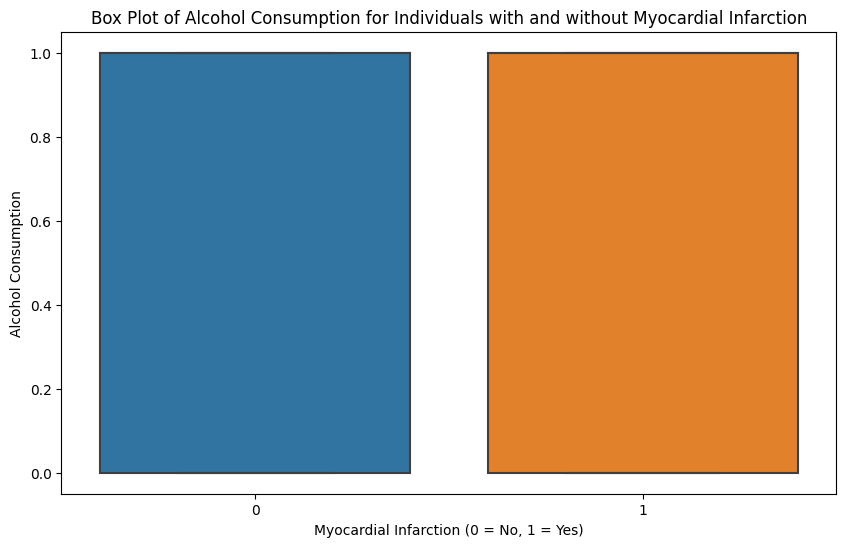

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Box plot of Alcohol Consumption for individuals with and without MI
plt.figure(figsize=(10, 6))
sns.boxplot(x='Myocardial Infarction', y='Alcohol Consumption', data=sleep_data)
plt.title("Box Plot of Alcohol Consumption for Individuals with and without Myocardial Infarction")
plt.xlabel("Myocardial Infarction (0 = No, 1 = Yes)")
plt.ylabel("Alcohol Consumption")
plt.show()

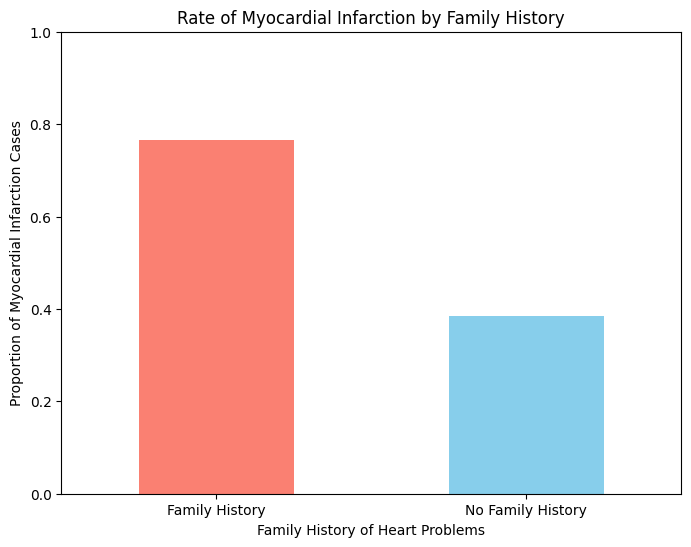

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the provided CSV file
file_path = '/kaggle/input/sleepheart-dataset-msc-project/Heart Attack Risk Analysis.csv'
data = pd.read_csv(file_path)

# Calculate the rate of MI among those with and without a family history
family_history_group = data.groupby('Family History')['Myocardial Infarction'].mean()

# Reorder the series to show 'Family History' first
family_history_group = family_history_group.sort_index(ascending=False)

# Plotting the results
plt.figure(figsize=(8, 6))
family_history_group.plot(kind='bar', color=['salmon', 'skyblue'])

plt.title('Rate of Myocardial Infarction by Family History')
plt.xlabel('Family History of Heart Problems')
plt.ylabel('Proportion of Myocardial Infarction Cases')
plt.xticks(ticks=[0, 1], labels=['Family History', 'No Family History'], rotation=0)
plt.ylim(0, 1)

# Display the plot
plt.show()

#Soubhi SAAD

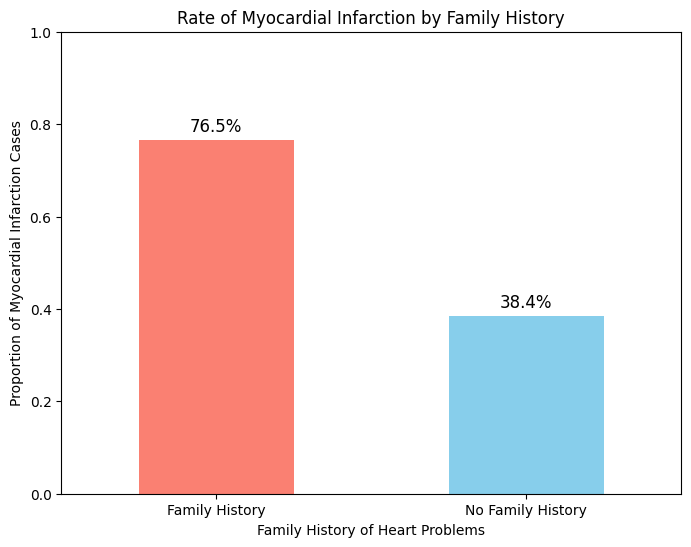

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the provided CSV file
file_path = '/kaggle/input/sleepheart-dataset-msc-project/Heart Attack Risk Analysis.csv'
data = pd.read_csv(file_path)

# Calculate the rate of MI among those with and without a family history
family_history_group = data.groupby('Family History')['Myocardial Infarction'].mean()

# Reorder the series to show 'Family History' first
family_history_group = family_history_group.sort_index(ascending=False)

# Plotting the results
plt.figure(figsize=(8, 6))
bars = family_history_group.plot(kind='bar', color=['salmon', 'skyblue'])

# Adding data labels to the bars
for index, value in enumerate(family_history_group):
    plt.text(index, value + 0.02, f'{value:.1%}', ha='center', fontsize=12)

plt.title('Rate of Myocardial Infarction by Family History')
plt.xlabel('Family History of Heart Problems')
plt.ylabel('Proportion of Myocardial Infarction Cases')
plt.xticks(ticks=[0, 1], labels=['Family History', 'No Family History'], rotation=0)
plt.ylim(0, 1)

# Display the plot
plt.show()

#Soubhi SAAD

/tmp/ipykernel_33/4219957090.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group = data.groupby('Age Group')['Myocardial Infarction'].mean()


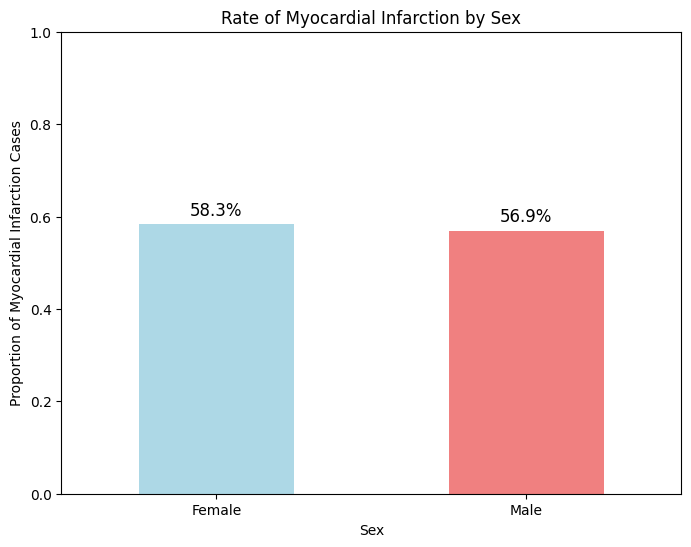

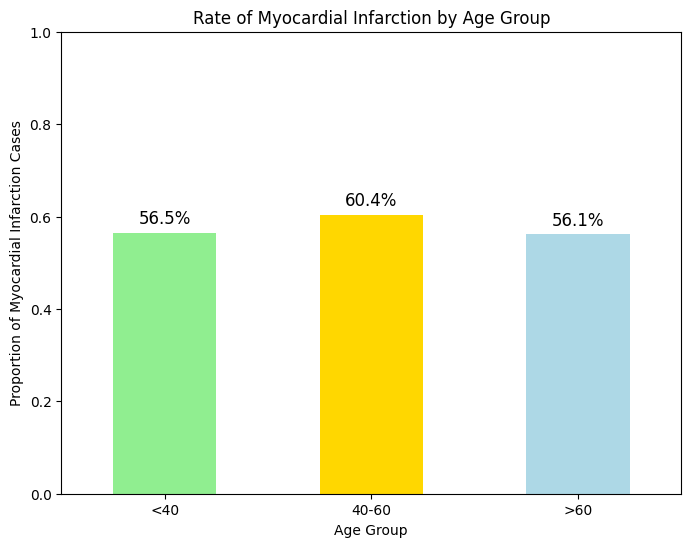

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the provided CSV file
file_path = '/kaggle/input/sleepheart-dataset-msc-project/Heart Attack Risk Analysis.csv'
data = pd.read_csv(file_path)

# First, we'll categorize age into groups for better comparison
# Define age groups (e.g., <40, 40-60, >60)
bins = [0, 40, 60, 100]
labels = ['<40', '40-60', '>60']
data['Age Group'] = pd.cut(data['Age'], bins=bins, labels=labels, right=False)

# Calculate the rate of MI by sex
sex_group = data.groupby('Sex')['Myocardial Infarction'].mean()

# Calculate the rate of MI by age group
age_group = data.groupby('Age Group')['Myocardial Infarction'].mean()

# Plotting the MI rate by sex
plt.figure(figsize=(8, 6))
sex_group.plot(kind='bar', color=['lightblue', 'lightcoral'])
for index, value in enumerate(sex_group):
    plt.text(index, value + 0.02, f'{value:.1%}', ha='center', fontsize=12)
plt.title('Rate of Myocardial Infarction by Sex')
plt.xlabel('Sex')
plt.ylabel('Proportion of Myocardial Infarction Cases')
plt.xticks(rotation=0)
plt.ylim(0, 1)
plt.show()

# Plotting the MI rate by age group
plt.figure(figsize=(8, 6))
age_group.plot(kind='bar', color=['lightgreen', 'gold', 'lightblue'])
for index, value in enumerate(age_group):
    plt.text(index, value + 0.02, f'{value:.1%}', ha='center', fontsize=12)
plt.title('Rate of Myocardial Infarction by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Proportion of Myocardial Infarction Cases')
plt.xticks(rotation=0)
plt.ylim(0, 1)
plt.show()

#Soubhi SAAD

/tmp/ipykernel_33/144410800.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  facet_data = data.groupby(['Sex', 'Age Group', 'Sleep Category'])['Myocardial Infarction'].mean().reset_index()
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future de

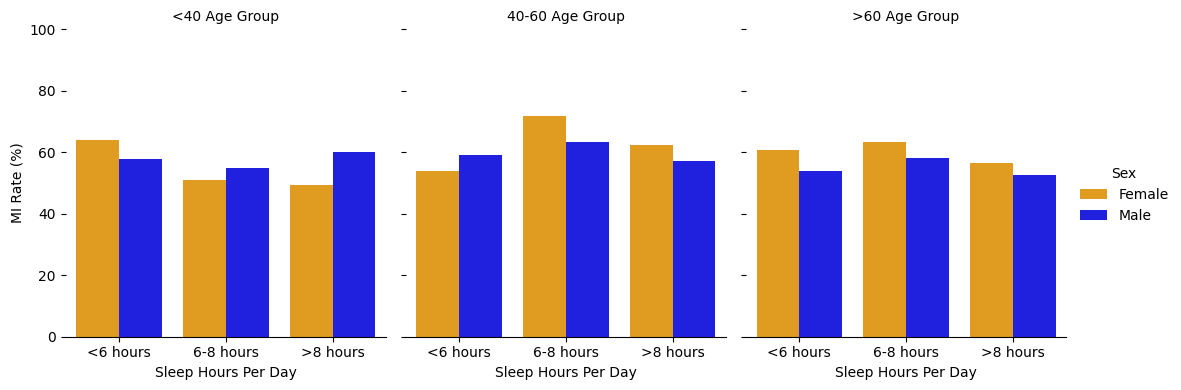

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data from the provided CSV file
file_path = '/kaggle/input/sleepheart-dataset-msc-project/Heart Attack Risk Analysis.csv' 
data = pd.read_csv(file_path)

# Recreate the Age Group column
bins_age = [0, 40, 60, 100]
labels_age = ['<40', '40-60', '>60']
data['Age Group'] = pd.cut(data['Age'], bins=bins_age, labels=labels_age, right=False)

# Categorize Sleep Hours
bins_sleep = [0, 6, 8, 12]
labels_sleep = ['<6 hours', '6-8 hours', '>8 hours']
data['Sleep Category'] = pd.cut(data['Sleep Hours Per Day'], bins=bins_sleep, labels=labels_sleep, right=False)

# Prepare the data for plotting
facet_data = data.groupby(['Sex', 'Age Group', 'Sleep Category'])['Myocardial Infarction'].mean().reset_index()
facet_data['Myocardial Infarction'] = facet_data['Myocardial Infarction'] * 100  # Convert to percentage

# Create a Facet Grid Plot with specified colors
g = sns.catplot(
    data=facet_data, kind="bar",
    x="Sleep Category", y="Myocardial Infarction",
    hue="Sex", col="Age Group",
    ci=None, palette={'Male': 'blue', 'Female': 'orange'}, height=4, aspect=0.9
)
g.set_axis_labels("Sleep Hours Per Day", "MI Rate (%)")
g.set_titles("{col_name} Age Group")
g.set(ylim=(0, 100))
g.despine(left=True)

# Show the plot
plt.show()

#Soubhi SAAD

/tmp/ipykernel_33/30130533.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cholesterol_facet_data = data.groupby(['Sex', 'Age Group', 'Cholesterol Category'])['Myocardial Infarction'].mean().reset_index()
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to ad

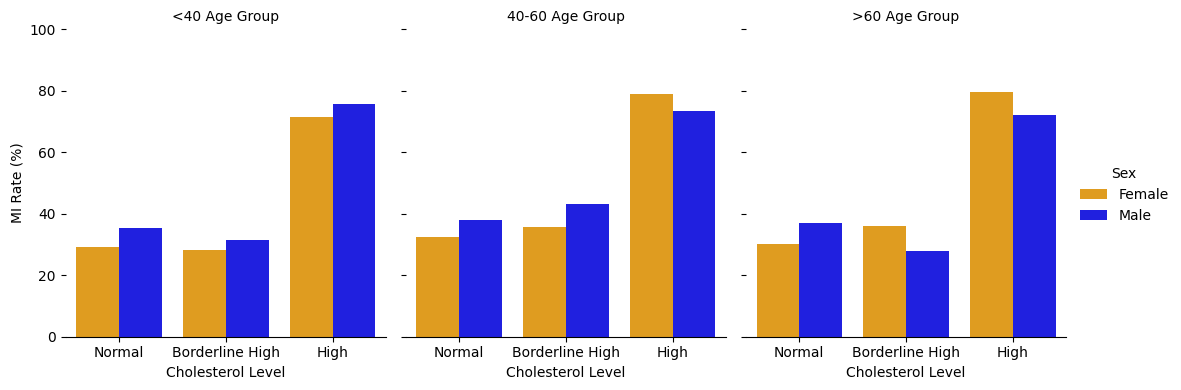

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data from the provided CSV file
file_path = '/kaggle/input/sleepheart-dataset-msc-project/Heart Attack Risk Analysis.csv' 
data = pd.read_csv(file_path)

# Recreate the Age Group column
bins_age = [0, 40, 60, 100]
labels_age = ['<40', '40-60', '>60']
data['Age Group'] = pd.cut(data['Age'], bins=bins_age, labels=labels_age, right=False)

# Step 1: Categorize Cholesterol Levels
# Assuming general categories: <200 mg/dL (Normal), 200-239 mg/dL (Borderline High), >=240 mg/dL (High)
bins_cholesterol = [0, 200, 240, data['Cholesterol'].max()]
labels_cholesterol = ['Normal', 'Borderline High', 'High']
data['Cholesterol Category'] = pd.cut(data['Cholesterol'], bins=bins_cholesterol, labels=labels_cholesterol, right=False)

# Step 2: Prepare the data for plotting
cholesterol_facet_data = data.groupby(['Sex', 'Age Group', 'Cholesterol Category'])['Myocardial Infarction'].mean().reset_index()
cholesterol_facet_data['Myocardial Infarction'] = cholesterol_facet_data['Myocardial Infarction'] * 100  # Convert to percentage

# Step 3: Create a Facet Grid Plot
g = sns.catplot(
    data=cholesterol_facet_data, kind="bar",
    x="Cholesterol Category", y="Myocardial Infarction",
    hue="Sex", col="Age Group",
    ci=None, palette={'Male': 'blue', 'Female': 'orange'}, height=4, aspect=0.9
)
g.set_axis_labels("Cholesterol Level", "MI Rate (%)")
g.set_titles("{col_name} Age Group")
g.set(ylim=(0, 100))
g.despine(left=True)

# Show the plot
plt.show()

#Soubhi SAAD

In [1]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Load the dataset
file_path = '/kaggle/input/sleepheart-dataset-msc-project/TheOne Sleep Data.csv'  # Replace with your file path
data = pd.read_csv(file_path)

# Rename columns to simplify variable names
data = data.rename(columns={'Myocardial Infarction': 'Myocardial_Infarction',
                            'Sleep Hours Per Day': 'Sleep_Hours_Per_Day'})

# Create the interaction term
data['SleepHours_Age'] = data['Sleep_Hours_Per_Day'] * data['Age']

# Run the logistic regression model with interaction term
model = smf.logit('Myocardial_Infarction ~ Sleep_Hours_Per_Day + Age + C(Sex) + BMI + SleepHours_Age', data=data).fit()

# Display the summary of the model
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.681675
         Iterations 4
                             Logit Regression Results                            
Dep. Variable:     Myocardial_Infarction   No. Observations:                 1753
Model:                             Logit   Df Residuals:                     1747
Method:                              MLE   Df Model:                            5
Date:                   Wed, 14 Aug 2024   Pseudo R-squ.:                0.001007
Time:                           00:38:59   Log-Likelihood:                -1195.0
converged:                          True   LL-Null:                       -1196.2
Covariance Type:               nonrobust   LLR p-value:                    0.7903
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               0.6073      0.552      1.100      0.271   

Optimization terminated successfully.
         Current function value: 0.681675
         Iterations 4


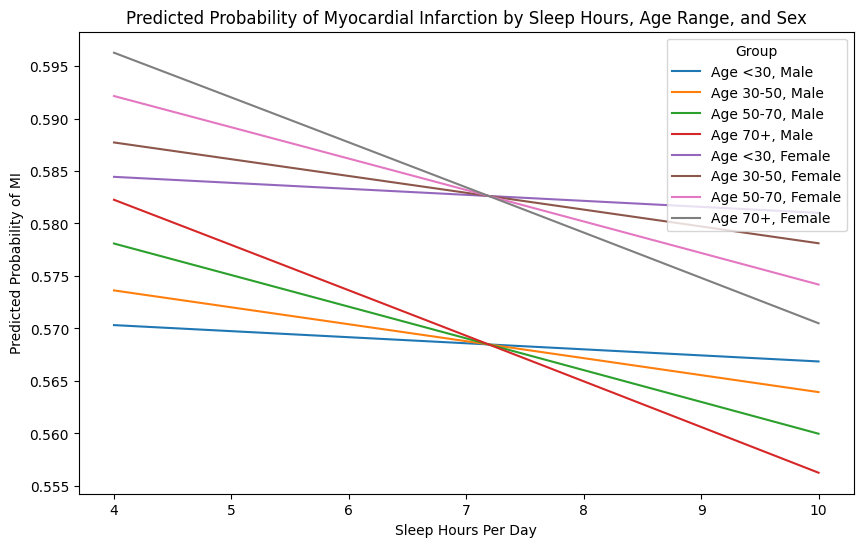

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Load the dataset
file_path = '/kaggle/input/sleepheart-dataset-msc-project/TheOne Sleep Data.csv'  # Replace with your file path
data = pd.read_csv(file_path)

# Rename columns to simplify variable names
data = data.rename(columns={'Myocardial Infarction': 'Myocardial_Infarction',
                            'Sleep Hours Per Day': 'Sleep_Hours_Per_Day'})

# Create the interaction term
data['SleepHours_Age'] = data['Sleep_Hours_Per_Day'] * data['Age']

# Run the logistic regression model with interaction term
model = smf.logit('Myocardial_Infarction ~ Sleep_Hours_Per_Day + Age + C(Sex) + BMI + SleepHours_Age', data=data).fit()

# Define age ranges
age_bins = [0, 30, 50, 70, data['Age'].max()]
age_labels = ['<30', '30-50', '50-70', '70+']
data['Age_Range'] = pd.cut(data['Age'], bins=age_bins, labels=age_labels, right=False)

# Create a plot
plt.figure(figsize=(10, 6))

# Loop through each age range and plot the predicted probability of MI for both males and females
for sex in ['Male', 'Female']:
    for age_label in age_labels:
        # Filter the data for the specific age range
        age_range_data = data[data['Age_Range'] == age_label]
        
        # Prepare the data for prediction
        prediction_data = pd.DataFrame({
            'Sleep_Hours_Per_Day': np.linspace(data['Sleep_Hours_Per_Day'].min(), data['Sleep_Hours_Per_Day'].max(), 100),
            'Age': age_range_data['Age'].mean(),  # Use the mean age of the range for prediction
            'Sex': sex,
            'BMI': data['BMI'].mean(),
            'SleepHours_Age': np.linspace(data['Sleep_Hours_Per_Day'].min(), data['Sleep_Hours_Per_Day'].max(), 100) * age_range_data['Age'].mean()
        })

        # Predict the probability of MI
        prediction_data['Predicted_MI_Probability'] = model.predict(prediction_data)

        # Plot the results
        plt.plot(prediction_data['Sleep_Hours_Per_Day'], prediction_data['Predicted_MI_Probability'], 
                 label=f'Age {age_label}, {sex}')

# Add labels and title
plt.xlabel('Sleep Hours Per Day')
plt.ylabel('Predicted Probability of MI')
plt.title('Predicted Probability of Myocardial Infarction by Sleep Hours, Age Range, and Sex')
plt.legend(title='Group')
plt.show()

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Ensure that plots display inline in Jupyter Notebooks and set retina display
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# Load the dataset
file_path = '/kaggle/input/sleepheart-dataset-msc-project/TheOne Sleep Data.csv'  # Replace with your file path
data = pd.read_csv(file_path)

# Rename columns to simplify variable names
data = data.rename(columns={'Myocardial Infarction': 'Myocardial_Infarction',
                            'Sleep Hours Per Day': 'Sleep_Hours_Per_Day'})

# Create the interaction term
data['SleepHours_Age'] = data['Sleep_Hours_Per_Day'] * data['Age']

# Run the logistic regression model with interaction term
model = smf.logit('Myocardial_Infarction ~ Sleep_Hours_Per_Day + Age + C(Sex) + BMI + SleepHours_Age', data=data).fit()

# Define age ranges
age_bins = [0, 30, 50, 70, data['Age'].max()]
age_labels = ['<30', '30-50', '50-70', '70+']
data['Age_Range'] = pd.cut(data['Age'], bins=age_bins, labels=age_labels, right=False)

# Create a larger plot with adjusted legend placement
plt.figure(figsize=(12, 8))

# Loop through each age range and plot the predicted probability of MI for both males and females
for sex in ['Male', 'Female']:
    for age_label in age_labels:
        # Filter the data for the specific age range
        age_range_data = data[data['Age_Range'] == age_label]
        
        # Prepare the data for prediction
        prediction_data = pd.DataFrame({
            'Sleep_Hours_Per_Day': np.linspace(data['Sleep_Hours_Per_Day'].min(), data['Sleep_Hours_Per_Day'].max(), 100),
            'Age': age_range_data['Age'].mean(),  # Use the mean age of the range for prediction
            'Sex': sex,
            'BMI': data['BMI'].mean(),
            'SleepHours_Age': np.linspace(data['Sleep_Hours_Per_Day'].min(), data['Sleep_Hours_Per_Day'].max(), 100) * age_range_data['Age'].mean()
        })

        # Predict the probability of MI
        prediction_data['Predicted_MI_Probability'] = model.predict(prediction_data)

        # Plot the results
        plt.plot(prediction_data['Sleep_Hours_Per_Day'], prediction_data['Predicted_MI_Probability'], 
                 label=f'Age {age_label}, {sex}')

# Add labels and title
plt.xlabel('Sleep Hours Per Day')
plt.ylabel('Predicted Probability of MI')
plt.title('Predicted Probability of Myocardial Infarction by Sleep Hours, Age Range, and Sex')
plt.legend(title='Group', bbox_to_anchor=(1.05, 1), loc='upper left')

# Save the plot as an image file
plt.savefig('predicted_mi_probability.png')

# Show the plot
plt.show()

# Display the saved image to ensure it's visible
from IPython.display import Image
Image('predicted_mi_probability.png')

Optimization terminated successfully.
         Current function value: 0.681675
         Iterations 4


Female, Age >60, Sleep Duration -> t-statistic: -0.47, p-value: 0.636
Female, Age 40-60, Sleep Duration -> t-statistic: 0.80, p-value: 0.425
Female, Age <40, Sleep Duration -> t-statistic: -1.36, p-value: 0.176
Female, Age >60, Sleep Disturbances -> t-statistic: 1.23, p-value: 0.219
Female, Age 40-60, Sleep Disturbances -> t-statistic: -0.34, p-value: 0.733
Female, Age <40, Sleep Disturbances -> t-statistic: 1.12, p-value: 0.263


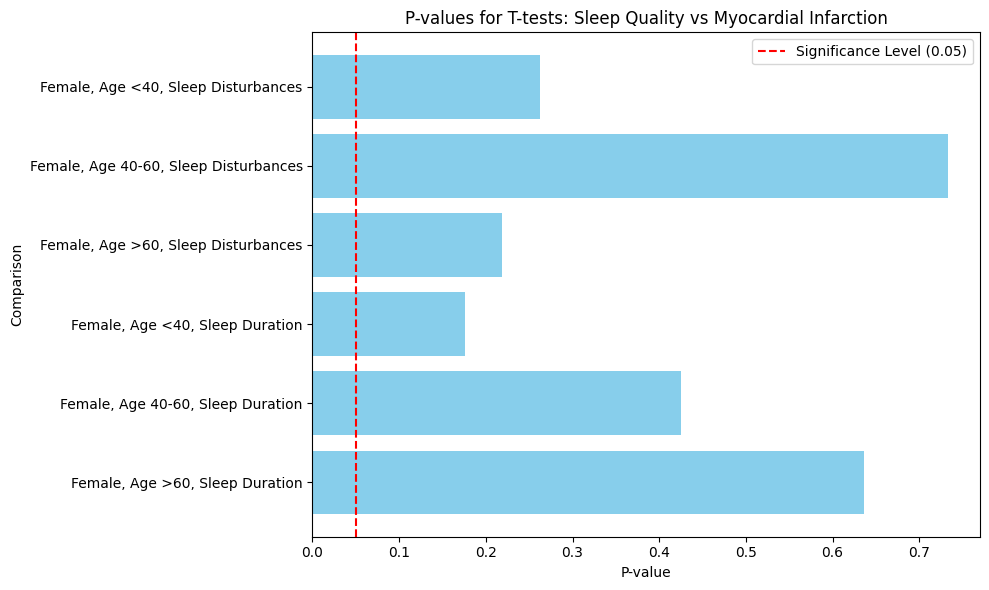

In [3]:
import pandas as pd
from scipy import stats

# Load the dataset
file_path = '/kaggle/input/sleepheart-dataset-msc-project/Heart Attack Risk Analysis.csv'
df = pd.read_csv(file_path)

# Clean and preprocess the data
# Assuming 'Myocardial Infarction' is a binary variable where 1 = Yes, 0 = No
# Assuming 'Sex' is coded as 0 = Male, 1 = Female

# Segmenting the data by gender and then by age groups
df['Age Group'] = pd.cut(df['Age'], bins=[0, 40, 60, 100], labels=['<40', '40-60', '>60'])

# Performing t-tests on sleep duration and sleep disturbances across MI status, gender, and age group

results = {}

# Sleep Duration vs MI Status
for gender in df['Sex'].unique():
    gender_label = 'Male' if gender == 0 else 'Female'
    for age_group in df['Age Group'].unique():
        if pd.isna(age_group):
            continue
        group_data = df[(df['Sex'] == gender) & (df['Age Group'] == age_group)]
        mi_group = group_data[group_data['Myocardial Infarction'] == 1]['Sleep Hours Per Day']
        no_mi_group = group_data[group_data['Myocardial Infarction'] == 0]['Sleep Hours Per Day']
        
        t_stat, p_value = stats.ttest_ind(mi_group.dropna(), no_mi_group.dropna(), equal_var=False)
        
        results[f'{gender_label}, Age {age_group}, Sleep Duration'] = (t_stat, p_value)

# Sleep Disturbances vs MI Status
for gender in df['Sex'].unique():
    gender_label = 'Male' if gender == 0 else 'Female'
    for age_group in df['Age Group'].unique():
        if pd.isna(age_group):
            continue
        group_data = df[(df['Sex'] == gender) & (df['Age Group'] == age_group)]
        mi_group = group_data[group_data['Myocardial Infarction'] == 1]['Sleep Disturbances']
        no_mi_group = group_data[group_data['Myocardial Infarction'] == 0]['Sleep Disturbances']
        
        t_stat, p_value = stats.ttest_ind(mi_group.dropna(), no_mi_group.dropna(), equal_var=False)
        
        results[f'{gender_label}, Age {age_group}, Sleep Disturbances'] = (t_stat, p_value)

# Output the results
for key, (t_stat, p_value) in results.items():
    print(f"{key} -> t-statistic: {t_stat:.2f}, p-value: {p_value:.3f}")
    
import matplotlib.pyplot as plt

# Extracting data for plotting
labels = list(results.keys())
t_stats = [result[0] for result in results.values()]
p_values = [result[1] for result in results.values()]

# Plotting the p-values
plt.figure(figsize=(10, 6))
plt.barh(labels, p_values, color='skyblue')
plt.axvline(x=0.05, color='red', linestyle='--', label='Significance Level (0.05)')
plt.xlabel('P-value')
plt.ylabel('Comparison')
plt.title('P-values for T-tests: Sleep Quality vs Myocardial Infarction')
plt.legend()
plt.tight_layout()
plt.show()

# Soubhi SAAD

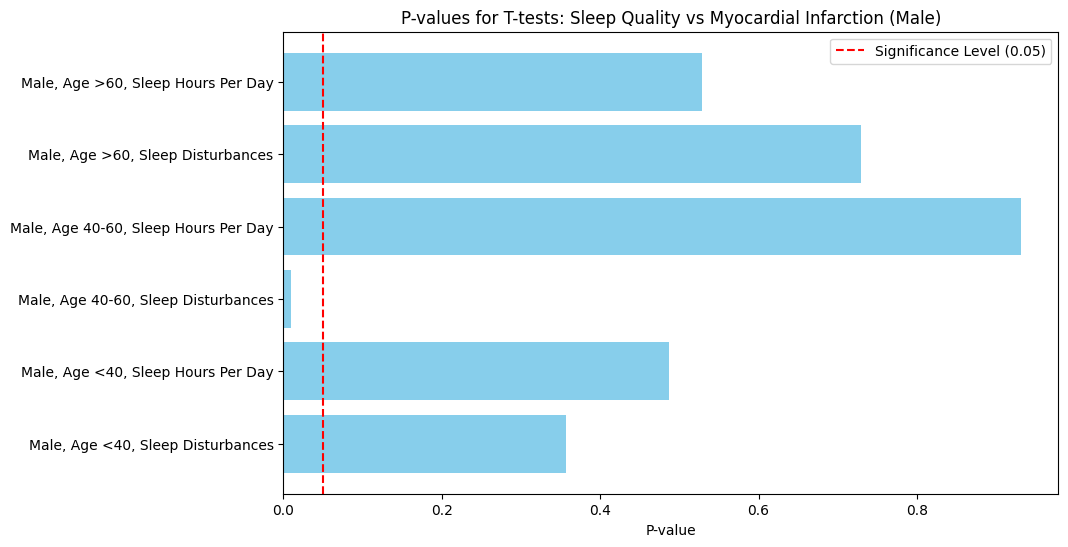

In [6]:
import pandas as pd
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('/kaggle/input/sleepheart-dataset-msc-project/TheOne Sleep Data.csv')

# Define age groups
age_groups = [
    ('<40', data['Age'] < 40),
    ('40-60', (data['Age'] >= 40) & (data['Age'] <= 60)),
    ('>60', data['Age'] > 60)
]

# Store results
results = []

# Perform t-tests for Sleep Disturbances and Sleep Duration for males
for age_label, age_condition in age_groups:
    for variable in ['Sleep Disturbances', 'Sleep Hours Per Day']:
        male_with_mi = data[(data['Sex'] == 'Male') & age_condition & (data['Myocardial Infarction'] == 1)][variable].dropna()
        male_without_mi = data[(data['Sex'] == 'Male') & age_condition & (data['Myocardial Infarction'] == 0)][variable].dropna()

        t_stat, p_value = ttest_ind(male_with_mi, male_without_mi, equal_var=False)
        results.append((f'Male, Age {age_label}, {variable}', p_value))

# Create a DataFrame for the results
results_df = pd.DataFrame(results, columns=['Comparison', 'P-value'])

# Plot the p-values
plt.figure(figsize=(10, 6))
plt.barh(results_df['Comparison'], results_df['P-value'], color='skyblue')
plt.axvline(x=0.05, color='red', linestyle='--', label='Significance Level (0.05)')
plt.xlabel('P-value')
plt.title('P-values for T-tests: Sleep Quality vs Myocardial Infarction (Male)')
plt.legend()
plt.show()

Comparison: Male, Age <40, Sleep Disturbances
T-statistic: 0.922, P-value: 0.357
--------------------------------------------------
Comparison: Male, Age <40, Sleep Hours Per Day
T-statistic: 0.695, P-value: 0.487
--------------------------------------------------
Comparison: Male, Age 40-60, Sleep Disturbances
T-statistic: -2.595, P-value: 0.010
--------------------------------------------------
Comparison: Male, Age 40-60, Sleep Hours Per Day
T-statistic: 0.085, P-value: 0.932
--------------------------------------------------
Comparison: Male, Age >60, Sleep Disturbances
T-statistic: -0.347, P-value: 0.729
--------------------------------------------------
Comparison: Male, Age >60, Sleep Hours Per Day
T-statistic: -0.631, P-value: 0.529
--------------------------------------------------


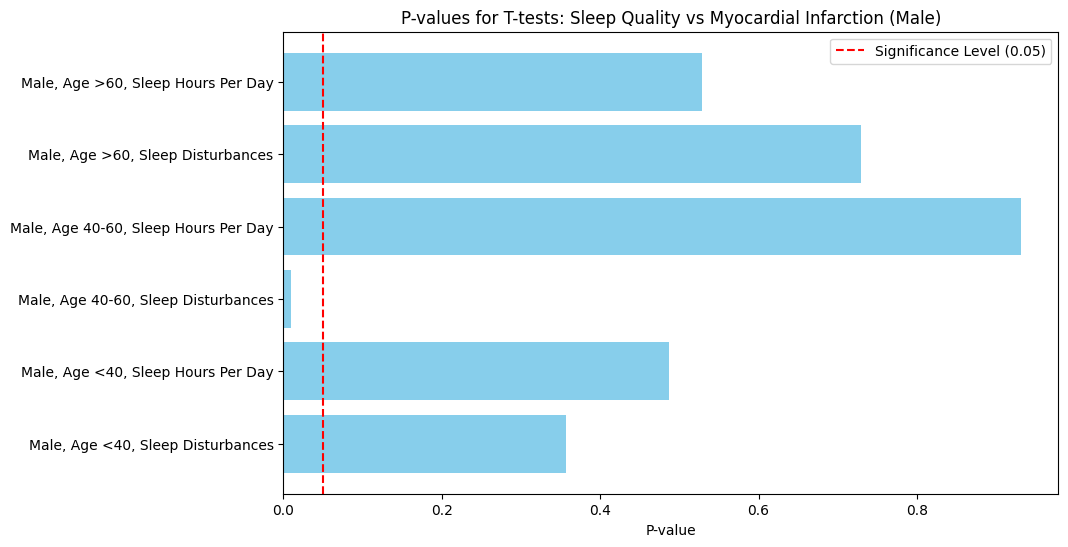

In [7]:
import pandas as pd
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('/kaggle/input/sleepheart-dataset-msc-project/Heart Attack Risk Analysis.csv')

# Define age groups
age_groups = [
    ('<40', data['Age'] < 40),
    ('40-60', (data['Age'] >= 40) & (data['Age'] <= 60)),
    ('>60', data['Age'] > 60)
]

# Store results
results = []

# Perform t-tests for Sleep Disturbances and Sleep Duration for males
for age_label, age_condition in age_groups:
    for variable in ['Sleep Disturbances', 'Sleep Hours Per Day']:
        male_with_mi = data[(data['Sex'] == 'Male') & age_condition & (data['Myocardial Infarction'] == 1)][variable].dropna()
        male_without_mi = data[(data['Sex'] == 'Male') & age_condition & (data['Myocardial Infarction'] == 0)][variable].dropna()

        t_stat, p_value = ttest_ind(male_with_mi, male_without_mi, equal_var=False)
        results.append((f'Male, Age {age_label}, {variable}', p_value, t_stat))

# Create a DataFrame for the results
results_df = pd.DataFrame(results, columns=['Comparison', 'P-value', 'T-statistic'])

# Display the results in text
for index, row in results_df.iterrows():
    comparison = row['Comparison']
    p_value = row['P-value']
    t_statistic = row['T-statistic']
    print(f"Comparison: {comparison}\nT-statistic: {t_statistic:.3f}, P-value: {p_value:.3f}\n{'-'*50}")

# Plot the p-values
plt.figure(figsize=(10, 6))
plt.barh(results_df['Comparison'], results_df['P-value'], color='skyblue')
plt.axvline(x=0.05, color='red', linestyle='--', label='Significance Level (0.05)')
plt.xlabel('P-value')
plt.title('P-values for T-tests: Sleep Quality vs Myocardial Infarction (Male)')
plt.legend()
plt.show()

In [20]:
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
data = pd.read_csv("/kaggle/input/sleepheart-dataset-msc-project/Heart Attack Risk Analysis.csv")

# Create dummy variables for categorical data
data['Sex'] = data['Sex'].map({'Male': 1, 'Female': 0})  # Assuming 'Male' is 1 and 'Female' is 0

# Select relevant columns for the logistic regression
X = data[['Sleep Hours Per Day', 'Sleep Disturbances', 'Age', 'Sex', 'Smoking', 'BMI']]
y = data['Myocardial Infarction']

# Add a constant to the independent variables (required for statsmodels)
X = sm.add_constant(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

logit_model = sm.Logit(y_train, X_train)
result = logit_model.fit()

# Print the summary
print(result.summary())

#Soubhi SAAD

Optimization terminated successfully.
         Current function value: 0.683563
         Iterations 4
                             Logit Regression Results                            
Dep. Variable:     Myocardial Infarction   No. Observations:                 1227
Model:                             Logit   Df Residuals:                     1220
Method:                              MLE   Df Model:                            6
Date:                   Thu, 29 Aug 2024   Pseudo R-squ.:                0.002312
Time:                           18:25:33   Log-Likelihood:                -838.73
converged:                          True   LL-Null:                       -840.68
Covariance Type:               nonrobust   LLR p-value:                    0.6919
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.3535      0.403      0.877      0.380   

In [6]:
logit_model = sm.Logit(y_train, X_train)
result = logit_model.fit()

# Print the summary
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.683563
         Iterations 4
                             Logit Regression Results                            
Dep. Variable:     Myocardial Infarction   No. Observations:                 1227
Model:                             Logit   Df Residuals:                     1220
Method:                              MLE   Df Model:                            6
Date:                   Thu, 29 Aug 2024   Pseudo R-squ.:                0.002312
Time:                           17:56:21   Log-Likelihood:                -838.73
converged:                          True   LL-Null:                       -840.68
Covariance Type:               nonrobust   LLR p-value:                    0.6919
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.3535      0.403      0.877      0.380   

[[  0 212]
 [  0 314]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       212
           1       0.60      1.00      0.75       314

    accuracy                           0.60       526
   macro avg       0.30      0.50      0.37       526
weighted avg       0.36      0.60      0.45       526



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


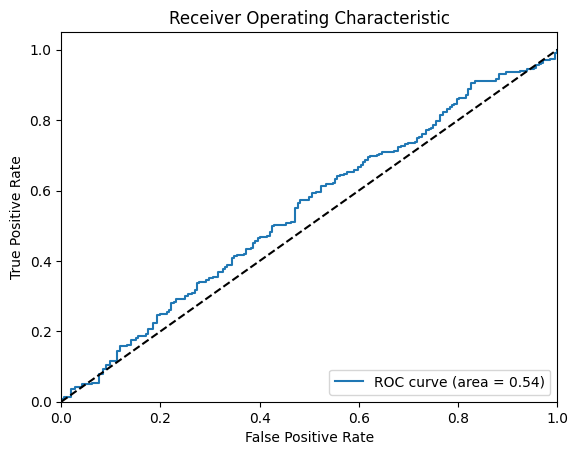

In [7]:
# Predict on the test set
y_pred = result.predict(X_test)
y_pred_binary = [1 if x > 0.5 else 0 for x in y_pred]

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_binary)
print(conf_matrix)

# Classification report
print(classification_report(y_test, y_pred_binary))

# ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [8]:
import pandas as pd
import statsmodels.api as sm
import numpy as np  # Add this import
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns



odds_ratios = pd.DataFrame({
    'Variable': X.columns,
    'Odds Ratio': result.params.apply(lambda x: np.exp(x))
})
print(odds_ratios)

                                Variable  Odds Ratio
const                              const    1.424060
Sleep Hours Per Day  Sleep Hours Per Day    0.999152
Sleep Disturbances    Sleep Disturbances    0.966057
Age                                  Age    0.996965
Sex                                  Sex    0.807779
Smoking                          Smoking    1.536795
BMI                                  BMI    0.995045


In [9]:
# Add interaction term
data['Sleep_Gender_Interaction'] = data['Sleep Hours Per Day'] * data['Sex']

# Re-fit the model with the interaction term
X_interact = data[['Sleep Hours Per Day', 'Sex', 'Sleep_Gender_Interaction', 'Age', 'Smoking', 'BMI']]
X_interact = sm.add_constant(X_interact)
logit_model_interact = sm.Logit(y, X_interact)
result_interact = logit_model_interact.fit()

# Print the summary
print(result_interact.summary())

Optimization terminated successfully.
         Current function value: 0.680321
         Iterations 4
                             Logit Regression Results                            
Dep. Variable:     Myocardial Infarction   No. Observations:                 1753
Model:                             Logit   Df Residuals:                     1746
Method:                              MLE   Df Model:                            6
Date:                   Thu, 29 Aug 2024   Pseudo R-squ.:                0.002991
Time:                           13:45:52   Log-Likelihood:                -1192.6
converged:                          True   LL-Null:                       -1196.2
Covariance Type:               nonrobust   LLR p-value:                    0.3068
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.7019      0.435      1.61

Random Forest - Classification Report:
              precision    recall  f1-score   support

           0       0.38      0.37      0.38       212
           1       0.58      0.59      0.59       314

    accuracy                           0.50       526
   macro avg       0.48      0.48      0.48       526
weighted avg       0.50      0.50      0.50       526

Random Forest - ROC AUC Score: 0.4837234106477587


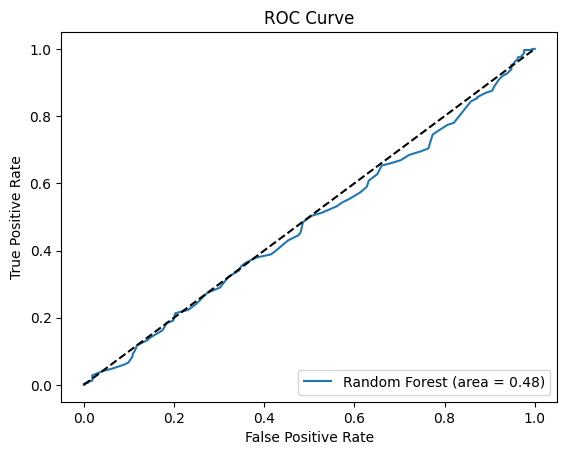

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, accuracy_score

# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf_model.predict(X_test)
y_pred_prob_rf = rf_model.predict_proba(X_test)[:, 1]

# Evaluate the model
print("Random Forest - Classification Report:")
print(classification_report(y_test, y_pred_rf))

print("Random Forest - ROC AUC Score:", roc_auc_score(y_test, y_pred_prob_rf))

# Plot ROC curve
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_prob_rf)
plt.plot(fpr_rf, tpr_rf, label='Random Forest (area = %0.2f)' % roc_auc_score(y_test, y_pred_prob_rf))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

XGBoost - Classification Report:
              precision    recall  f1-score   support

           0       0.40      0.37      0.39       212
           1       0.60      0.63      0.62       314

    accuracy                           0.53       526
   macro avg       0.50      0.50      0.50       526
weighted avg       0.52      0.53      0.52       526

XGBoost - ROC AUC Score: 0.5176961903617354


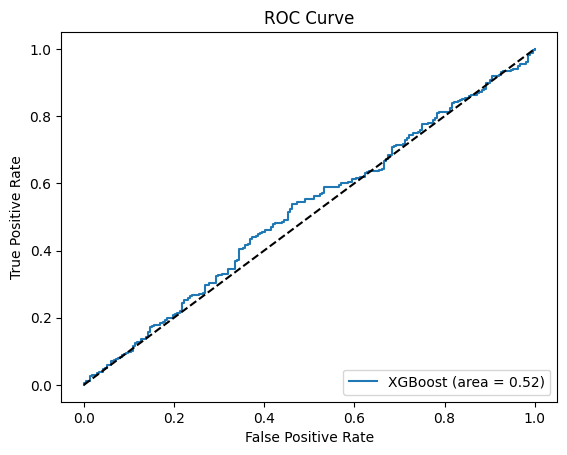

In [10]:
import xgboost as xgb
from sklearn.metrics import classification_report, roc_auc_score, roc_curve

# Initialize and train the XGBoost model
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

# Predict on the test set
y_pred_xgb = xgb_model.predict(X_test)
y_pred_prob_xgb = xgb_model.predict_proba(X_test)[:, 1]

# Evaluate the model
print("XGBoost - Classification Report:")
print(classification_report(y_test, y_pred_xgb))

print("XGBoost - ROC AUC Score:", roc_auc_score(y_test, y_pred_prob_xgb))

# Plot ROC curve
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_pred_prob_xgb)
plt.plot(fpr_xgb, tpr_xgb, label='XGBoost (area = %0.2f)' % roc_auc_score(y_test, y_pred_prob_xgb))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 691, number of negative: 536
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002179 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 343
[LightGBM] [Info] Number of data points in the train set: 1227, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.563162 -> initscore=0.254006
[LightGBM] [Info] Start training from score 0.254006
LightGBM - Classification Report:
              precision    recall  f1-score   support

           0       0.43      0.39      0.41       212
           1       0.61      0.66      0.63       314

    accuracy                           0.55       526
   macro avg       0.52      0.52      0.52       526
weighted avg       0.54      0.55      0.54       526

LightGBM -

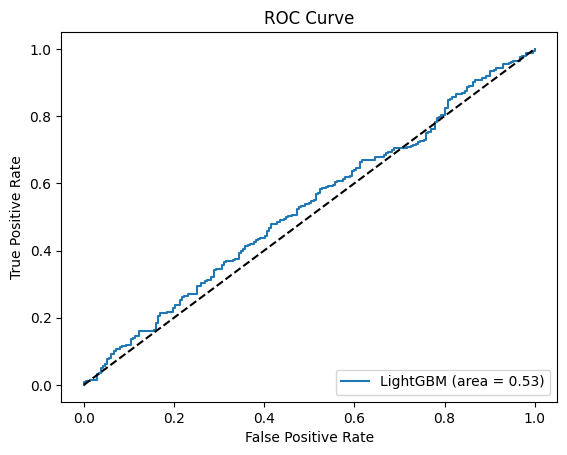

In [11]:
import lightgbm as lgb
from sklearn.metrics import classification_report, roc_auc_score, roc_curve

# Initialize and train the LightGBM model
lgb_model = lgb.LGBMClassifier(random_state=42)
lgb_model.fit(X_train, y_train)

# Predict on the test set
y_pred_lgb = lgb_model.predict(X_test)
y_pred_prob_lgb = lgb_model.predict_proba(X_test)[:, 1]

# Evaluate the model
print("LightGBM - Classification Report:")
print(classification_report(y_test, y_pred_lgb))

print("LightGBM - ROC AUC Score:", roc_auc_score(y_test, y_pred_prob_lgb))

# Plot ROC curve
fpr_lgb, tpr_lgb, _ = roc_curve(y_test, y_pred_prob_lgb)
plt.plot(fpr_lgb, tpr_lgb, label='LightGBM (area = %0.2f)' % roc_auc_score(y_test, y_pred_prob_lgb))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

SVM - Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       212
           1       0.60      1.00      0.75       314

    accuracy                           0.60       526
   macro avg       0.30      0.50      0.37       526
weighted avg       0.36      0.60      0.45       526

SVM - ROC AUC Score: 0.4640067299603413


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


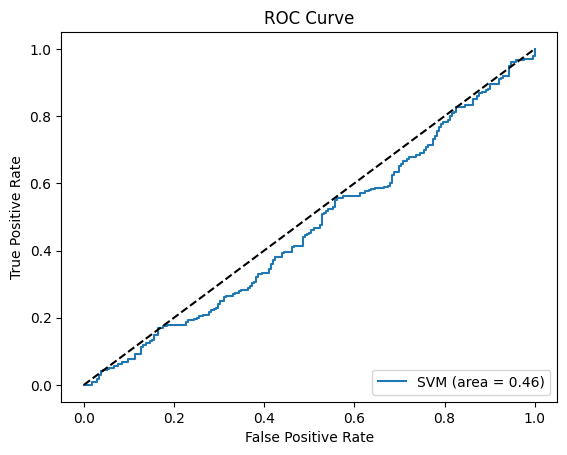

In [12]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, roc_auc_score, roc_curve

# Initialize and train the SVM model
svm_model = SVC(probability=True, random_state=42)
svm_model.fit(X_train, y_train)

# Predict on the test set
y_pred_svm = svm_model.predict(X_test)
y_pred_prob_svm = svm_model.predict_proba(X_test)[:, 1]

# Evaluate the model
print("SVM - Classification Report:")
print(classification_report(y_test, y_pred_svm))

print("SVM - ROC AUC Score:", roc_auc_score(y_test, y_pred_prob_svm))

# Plot ROC curve
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_pred_prob_svm)
plt.plot(fpr_svm, tpr_svm, label='SVM (area = %0.2f)' % roc_auc_score(y_test, y_pred_prob_svm))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

2024-08-29 17:58:19.883891: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-29 17:58:19.884045: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-29 17:58:20.021658: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Epoch 1/20


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5061 - loss: 1.7885 - val_accuracy: 0.5152 - val_loss: 0.7010
Epoch 2/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4953 - loss: 0.7058 - val_accuracy: 0.5970 - val_loss: 0.6911
Epoch 3/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5509 - loss: 0.6991 - val_accuracy: 0.5798 - val_loss: 0.6815
Epoch 4/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5526 - loss: 0.6962 - val_accuracy: 0.5989 - val_loss: 0.6765
Epoch 5/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5024 - loss: 0.7035 - val_accuracy: 0.6008 - val_loss: 0.6756
Epoch 6/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5813 - loss: 0.6879 - val_accuracy: 0.6008 - val_loss: 0.6800
Epoch 7/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5152 - loss: 0.7039 - val_accuracy: 0.4981 - val_loss: 0.6936
Epoch 8/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5479 - loss: 0.6943 - val_accuracy: 0.6046 - val_loss: 0.6730
Epo

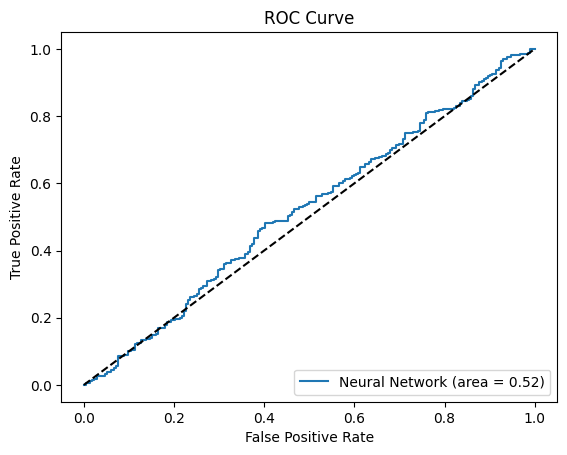

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import classification_report, roc_auc_score, roc_curve

# Initialize the neural network model
nn_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
nn_model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Predict on the test set
y_pred_prob_nn = nn_model.predict(X_test).ravel()
y_pred_nn = (y_pred_prob_nn > 0.5).astype(int)

# Evaluate the model
print("Neural Network - Classification Report:")
print(classification_report(y_test, y_pred_nn))

print("Neural Network - ROC AUC Score:", roc_auc_score(y_test, y_pred_prob_nn))

# Plot ROC curve
fpr_nn, tpr_nn, _ = roc_curve(y_test, y_pred_prob_nn)
plt.plot(fpr_nn, tpr_nn, label='Neural Network (area = %0.2f)' % roc_auc_score(y_test, y_pred_prob_nn))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

CatBoost - Classification Report:
              precision    recall  f1-score   support

           0       0.42      0.28      0.34       212
           1       0.60      0.75      0.67       314

    accuracy                           0.56       526
   macro avg       0.51      0.51      0.50       526
weighted avg       0.53      0.56      0.53       526

CatBoost - ROC AUC Score: 0.5191984136522053


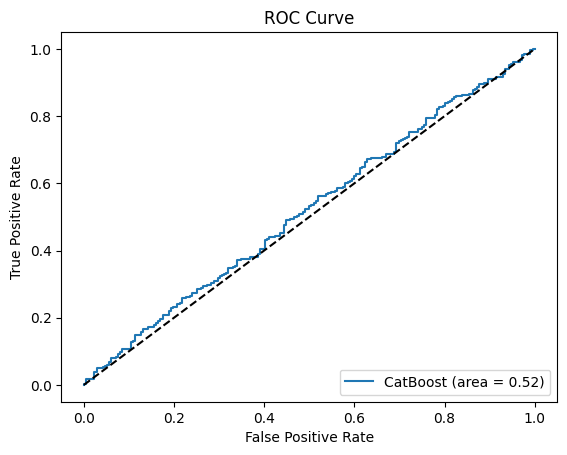

In [16]:
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report, roc_auc_score, roc_curve

# Initialize and train the CatBoost model
cat_model = CatBoostClassifier(verbose=0, random_state=42)
cat_model.fit(X_train, y_train)

# Predict on the test set
y_pred_cat = cat_model.predict(X_test)
y_pred_prob_cat = cat_model.predict_proba(X_test)[:, 1]

# Evaluate the model
print("CatBoost - Classification Report:")
print(classification_report(y_test, y_pred_cat))

print("CatBoost - ROC AUC Score:", roc_auc_score(y_test, y_pred_prob_cat))

# Plot ROC curve
fpr_cat, tpr_cat, _ = roc_curve(y_test, y_pred_prob_cat)
plt.plot(fpr_cat, tpr_cat, label='CatBoost (area = %0.2f)' % roc_auc_score(y_test, y_pred_prob_cat))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [19]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Assuming you have already trained these models:
# nn_model, svm_model, lightgbm_model, xgboost_model, rf_model
# Ensure these variables correspond to the trained models in your notebook

# Example of generating fpr and tpr values for each model
fpr_nn, tpr_nn, _ = roc_curve(y_test, nn_model.predict_proba(X_test)[:,1])
fpr_svm, tpr_svm, _ = roc_curve(y_test, svm_model.decision_function(X_test))
fpr_lightgbm, tpr_lightgbm, _ = roc_curve(y_test, lightgbm_model.predict_proba(X_test)[:,1])
fpr_xgboost, tpr_xgboost, _ = roc_curve(y_test, xgboost_model.predict_proba(X_test)[:,1])
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_model.predict_proba(X_test)[:,1])

# Calculate the AUC scores
roc_auc_nn = auc(fpr_nn, tpr_nn)
roc_auc_svm = auc(fpr_svm, tpr_svm)
roc_auc_lightgbm = auc(fpr_lightgbm, tpr_lightgbm)
roc_auc_xgboost = auc(fpr_xgboost, tpr_xgboost)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Plotting
plt.figure(figsize=(10, 8))

plt.plot(fpr_nn, tpr_nn, label=f'Neural Network (area = {roc_auc_nn:.2f})')
plt.plot(fpr_svm, tpr_svm, label=f'SVM (area = {roc_auc_svm:.2f})')
plt.plot(fpr_lightgbm, tpr_lightgbm, label=f'LightGBM (area = {roc_auc_lightgbm:.2f})')
plt.plot(fpr_xgboost, tpr_xgboost, label=f'XGBoost (area = {roc_auc_xgboost:.2f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (area = {roc_auc_rf:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)  # Diagonal line for random classifier

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves for Different Models')
plt.legend(loc='lower right')
plt.grid()

plt.show()

AttributeError: 'Sequential' object has no attribute 'predict_proba'

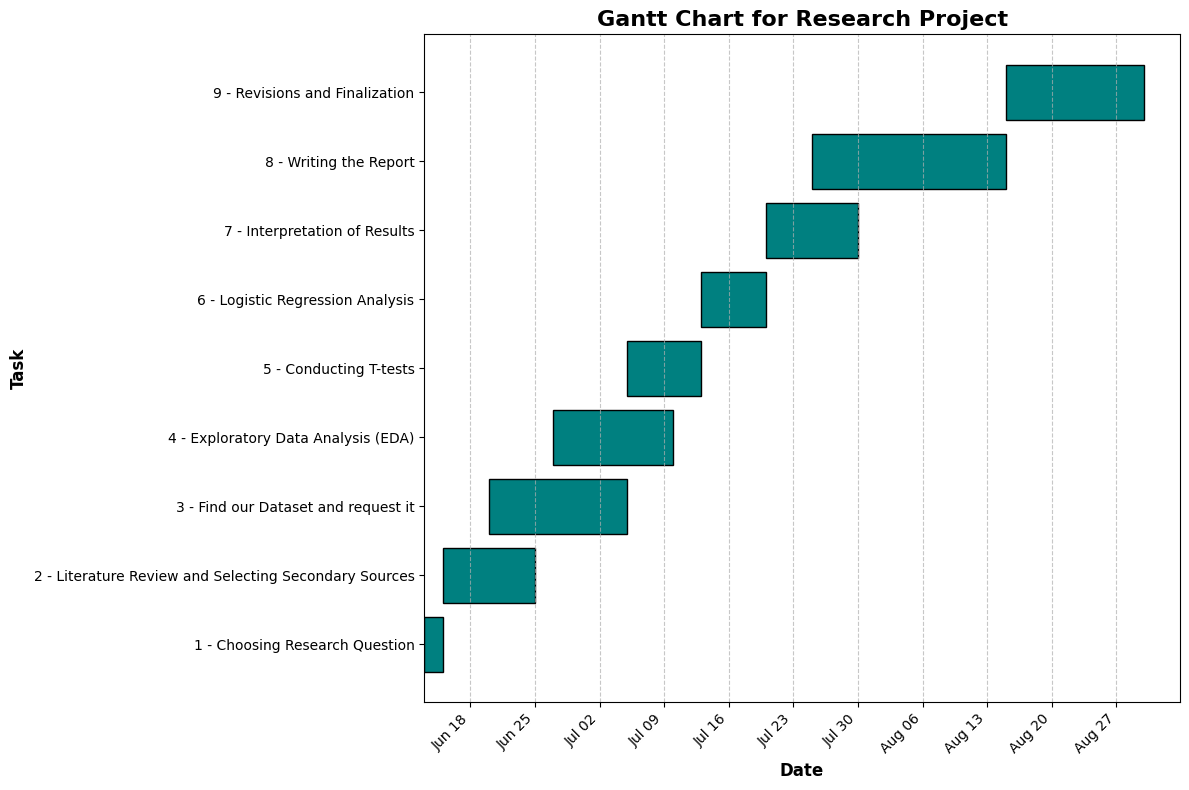

In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.dates as mdates

# Data setup
data = {
    'Task': [
        '1 - Choosing Research Question', 
        '2 - Literature Review and Selecting Secondary Sources', 
        '3 - Find our Dataset and request it', 
        '4 - Exploratory Data Analysis (EDA)', 
        '5 - Conducting T-tests', 
        '6 - Logistic Regression Analysis', 
        '7 - Interpretation of Results', 
        '8 - Writing the Report', 
        '9 - Revisions and Finalization'
    ],
    'Start': [
        '2024-06-13', 
        '2024-06-15', 
        '2024-06-20', 
        '2024-06-27', 
        '2024-07-05', 
        '2024-07-13', 
        '2024-07-20', 
        '2024-07-25', 
        '2024-08-15'
    ],
    'End': [
        '2024-06-15', 
        '2024-06-25', 
        '2024-07-05', 
        '2024-07-10', 
        '2024-07-13', 
        '2024-07-20', 
        '2024-07-30', 
        '2024-08-15', 
        '2024-08-30'
    ]
}

df = pd.DataFrame(data)
df['Start'] = pd.to_datetime(df['Start'])
df['End'] = pd.to_datetime(df['End'])

# Plotting
plt.figure(figsize=(12, 8))
plt.barh(df['Task'], df['End'] - df['Start'], left=df['Start'], color='teal', edgecolor='black')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))
plt.xticks(rotation=45, ha='right')
plt.title('Gantt Chart for Research Project', fontsize=16, weight='bold')
plt.xlabel('Date', fontsize=12, weight='bold')
plt.ylabel('Task', fontsize=12, weight='bold')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()